In [1]:
!pip install magenta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 75.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

Necessário instalar 2 vezes esta versão do matplot parta não dar erro

In [3]:
!pip install matplotlib==3.1.1
#esta versão está incompatível
#!pip install matplotlib==3.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Passar o tensorflow para versão anterior para compatibilizar com o projeto original

In [8]:
import tensorflow as tf

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.logging.set_verbosity(tf.logging.INFO)

In [10]:
tf.print(tf.__version__)

<tf.Operation 'PrintV2_1' type=PrintV2>

In [7]:
import magenta

/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.8/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Função Replace

In [11]:
from tensorflow.python.training import py_checkpoint_reader
def replace(checkpoint_dir, changes,dry_run=False):
    checkpoint = tf.train.get_checkpoint_state(checkpoint_dir)
    with tf.Session() as sess:
        reader = py_checkpoint_reader.NewCheckpointReader(checkpoint_dir)
        for var_name in reader.get_variable_to_shape_map():
            # Load the variable
            var = tf.train.load_variable(checkpoint_dir, var_name)
            # Set the new name
            new_name = var_name
            if var_name in changes:
               new_name = changes[var_name]
            print('%-50s ==> %-50s' % (var_name, new_name))
            # Rename the variable
            var = tf.Variable(var, name=new_name)
        if not dry_run:
            # Save the variables
            saver = tf.train.Saver()
            sess.run(tf.global_variables_initializer())
            saver.save(sess, './note_rnn_renamed/note_rnn.ckpt')

In [12]:
import urllib
urllib.request.urlretrieve(
            'http://download.magenta.tensorflow.org/models/'
            'rl_tuner_note_rnn.ckpt', 'note_rnn.ckpt')
rnn_type = 'default'
ckpt='note_rnn.ckpt'
changes = {
       'rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/B':'rnn_model/rnn/multi_rnn_cell/cell_0/lstm_cell/bias',
       'rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/W_0':'rnn_model/rnn/multi_rnn_cell/cell_0/lstm_cell/kernel',
}
replace('./'+ckpt,changes) 

INFO:tensorflow:./note_rnn_renamed/note_rnn.ckpt.data-00000-of-00001
INFO:tensorflow:500
INFO:tensorflow:./note_rnn_renamed/note_rnn.ckpt.index
INFO:tensorflow:500
INFO:tensorflow:./note_rnn_renamed/note_rnn.ckpt.meta
INFO:tensorflow:1000


rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/B        ==> rnn_model/rnn/multi_rnn_cell/cell_0/lstm_cell/bias
rnn_model/global_step                              ==> rnn_model/global_step                             
rnn_model/rnn_model/fully_connected/bias/Adagrad   ==> rnn_model/rnn_model/fully_connected/bias/Adagrad  
rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/W_0      ==> rnn_model/rnn/multi_rnn_cell/cell_0/lstm_cell/kernel
rnn_model/fully_connected/bias                     ==> rnn_model/fully_connected/bias                    
rnn_model/fully_connected/weights                  ==> rnn_model/fully_connected/weights                 
rnn_model/rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/B/Adagrad ==> rnn_model/rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/B/Adagrad
rnn_model/rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/W_0/Adagrad ==> rnn_model/rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/W_0/Adagrad
rnn_model/rnn_model/fully_connected/weights/Adagrad ==> rnn_model/rnn_model/fully_connected/weights/Ad

In [13]:
from tensorflow.python.training import py_checkpoint_reader

reader = py_checkpoint_reader.NewCheckpointReader('./'+ckpt)
var_to_shape_map = reader.get_variable_to_shape_map()
var_to_dtype_map = reader.get_variable_to_dtype_map()
for key, value in sorted(var_to_shape_map.items()):
  print("tensor: %s (%s) %s" % (key, var_to_dtype_map[key].name, value))

tensor: rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/B (float32) [400]
tensor: rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/W_0 (float32) [138, 400]
tensor: rnn_model/fully_connected/bias (float32) [38]
tensor: rnn_model/fully_connected/weights (float32) [100, 38]
tensor: rnn_model/global_step (int32) []
tensor: rnn_model/rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/B/Adagrad (float32) [400]
tensor: rnn_model/rnn_model/RNN/MultiRNNCell/Cell0/LSTMCell/W_0/Adagrad (float32) [138, 400]
tensor: rnn_model/rnn_model/fully_connected/bias/Adagrad (float32) [38]
tensor: rnn_model/rnn_model/fully_connected/weights/Adagrad (float32) [100, 38]


# Drive e Model parameter settings do construtor

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
from magenta.models.rl_tuner import rl_tuner_ops
from magenta.contrib import training as contrib_training
from magenta.models.rl_tuner import rl_tuner_ops

# diretorio em que será salvo o checkpoint treinado do RLtunner
output_dir = './rl_tuner'

# diretorio com o modelo do NoteRNN (atualmente só funciona com o modelo no formato do treinado originalmente)
note_rnn_checkpoint_dir = './note_rnn_renamed'
note_rnn_checkpoint_name = 'note_rnn.ckpt'
note_rnn_type = rnn_type

# caminho pro arquivo de priming
# midi_primer = '/content/drive/MyDrive/a_TCC/Colab_final/exp_origen.mid'
#midi_primer = '/content/primer_c_minor.mid'
midi_primer = '/content/exp_origen.mid'
priming_mode = 'single_midi'
#priming_mode = 'random_note'
reward_mode = 'music_theory_basic'
# metodo de exploração do aprendizado por reforço
exploration_mode= 'boltzmann'

# algortimo de aprendizagem por reforço
algorithm = 'q'


# salvar um checkpoint a cada n passos
output_every_nth= 2000

# qtd de notas na melodia a ser criada
num_notes_in_melody = 64

# escala de desconto da reward 
reward_scaler = 1.0

# lista de caminhos para os arquivos TFRecords usados para treinar um novo NoteRNN 
training_data_path = None
training_file_list = ["drive/MyDrive/notesequeces.tfrecord"]

#parametros do modelo
if note_rnn_type == 'basic_rnn':
    hparams = rl_tuner_ops.basic_rnn_hparams()
else:
    hparams = rl_tuner_ops.default_hparams()

dqn_hparams = contrib_training.HParams(
      random_action_probability=0.1,
      store_every_nth=1,
      train_every_nth=5,
      minibatch_size=32,
      discount_rate=0.5,
      max_experience=100000,
      target_network_update_rate=0.01,
      )


In [16]:
from magenta.models.rl_tuner.rl_tuner import RLTuner
import os
output_ckpt_dir = os.path.join(output_dir, algorithm)
output_ckpt = algorithm + '.ckpt'
backup_checkpoint_file = os.path.join(note_rnn_checkpoint_dir,note_rnn_checkpoint_name)

# Reprodução do original teste natasha

# Inicializa rlt

com esse modelo rodei o original usei um single midi que eu fiz ficou bom blz vou mandar o arquivo em anexo


In [ ]:
rlt = RLTuner(output_ckpt_dir,
                         midi_primer='/content/drive/MyDrive/a_TCC/Colab_final/exp_origen.mid',
                         priming_mode= 'single_midi',
                         dqn_hparams=dqn_hparams,
                         reward_scaler=reward_scaler,
                         save_name=output_ckpt,
                         output_every_nth=output_every_nth,
                         note_rnn_checkpoint_dir=note_rnn_checkpoint_dir,
                         note_rnn_checkpoint_file=backup_checkpoint_file,
                         note_rnn_type=note_rnn_type,
                         note_rnn_hparams=hparams,
                         num_notes_in_melody=num_notes_in_melody,
                         exploration_mode=exploration_mode,
                         algorithm=algorithm,
                         training_file_list = training_file_list)


INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:[<tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:[<tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'target_q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing 


Successfully initialized internal nets from checkpoint!


In [ ]:

print(rlt.reward_mode)

print(rl_tuner_ops.DEFAULT_QPM)


music_theory_all
music_theory_all
80.0


Treinamento com poucas iterações apenas para teste

In [ ]:
training_steps =  50000
exploration_steps= 25000

rlt.train(num_steps=training_steps,
            exploration_period=exploration_steps)

In [ ]:
print(reward_mode)

key_and_tonic


In [ ]:
rlt.generate_music_sequence(visualize_probs=True, title='pre_rl_key_and_tonic', length=64)

In [ ]:
rlt.plot_rewards()

In [ ]:
stat_dict = rlt.evaluate_music_theory_metrics(num_compositions=100)
stat_dict

# 07- Implementação do modelo original em Am com isolamento da função que penaliza notas fora da tonalidade,Tonic  500mil e reward_amount=-4.0  scale 2 , key trocar para A_MINOR_TONIC

In [ ]:
from magenta.models.rl_tuner import rl_tuner_eval_metrics

class KeyAmRLTuner(magenta.models.rl_tuner.rl_tuner.RLTuner): 
  def reward_tonic(self, action, tonic_note=rl_tuner_ops.A_MINOR_TONIC,
                    reward_amount=4.0):
      NOTE_OFF = 0
      NO_EVENT = 1
      action_note = np.argmax(action)
      first_note_of_final_bar = self.num_notes_in_melody - 4

      if self.beat == 0 or self.beat == first_note_of_final_bar:
        if action_note == tonic_note:
          return reward_amount
      elif self.beat == first_note_of_final_bar + 1:
        if action_note == NO_EVENT:
          return reward_amount
      elif self.beat > first_note_of_final_bar + 1:
        if action_note in (NO_EVENT, NOTE_OFF):
          return reward_amount
      return 0.0

  def reward_key(self, action, penalty_amount=-2.0, key=None):

    if key is None:
      key = rl_tuner_ops.A_MINOR_TONIC

    reward = 0

    action_note = np.argmax(action)
    if action_note not in key:
      reward = penalty_amount

    return reward
    
  def evaluate_music_theory_metrics(self, num_compositions=10000, key=None,
                                    tonic_note=rl_tuner_ops.A_MINOR_TONIC):

    stat_dict = rl_tuner_eval_metrics.compute_composition_stats(
        self,
        num_compositions=num_compositions,
        composition_length=self.num_notes_in_melody,
        key=key,
        tonic_note=tonic_note)

    return stat_dict

# Experimento 07.1 ficou bom equilibrado e bonito mas ainda em D maior.Devido a se usar posições 0 e 1 do vetor para pausa e continuidade de somn, temos um deslocamentoi de 2 posições (semi tons)na escala, onde deveria ser C ṕassa a ser D
é o mesmo que o anterior modificando algumas coisas\
1- aumentar penalidade da key amount para -3.0\
2- forcei tonic note =23 no key e amount para 5.0 passei tonic note para 23\
3- scale passar par 1.5 pra diminuir influência no decorrer do tempo

In [ ]:
from magenta.models.rl_tuner import rl_tuner_eval_metrics

class KeyAmRLTuner(magenta.models.rl_tuner.rl_tuner.RLTuner): 
  def reward_tonic(self, action, tonic_note=rl_tuner_ops.A_MINOR_TONIC,
                    reward_amount=5.0):
      NOTE_OFF = 0
      NO_EVENT = 1
      action_note = np.argmax(action)
      first_note_of_final_bar = self.num_notes_in_melody - 4
      tonic_note = 23
      if self.beat == 0 or self.beat == first_note_of_final_bar:
        if action_note == tonic_note:
          return reward_amount
      elif self.beat == first_note_of_final_bar + 1:
        if action_note == NO_EVENT:
          return reward_amount
      elif self.beat > first_note_of_final_bar + 1:
        if action_note in (NO_EVENT, NOTE_OFF):
          return reward_amount
      return 0.0

  def reward_key(self, action, penalty_amount=-3.0, key=None):

    if key is None:
      # key = rl_tuner_ops.A_MINOR_TONIC
      Key = 23

    reward = 0

    action_note = np.argmax(action)
    if action_note not in key:
      reward = penalty_amount

    return reward
    
  def evaluate_music_theory_metrics(self, num_compositions=10000, key=None,
                                    tonic_note=rl_tuner_ops.A_MINOR_TONIC):

    stat_dict = rl_tuner_eval_metrics.compute_composition_stats(
        self,
        num_compositions=num_compositions,
        composition_length=self.num_notes_in_melody,
        key=key,
        tonic_note=23)

    return stat_dict

# Testes
# experimento 7.4 forçar um dó menor
tudo igual a 7.1 acrescentando o D force
voltamos aos rewards originais sómente troque menor para maior sem mudar o nome\
coloquei os hiperparametros dentro da classe

In [ ]:
from magenta.models.rl_tuner import rl_tuner_eval_metrics
import numpy as np
from magenta.models.rl_tuner import rl_tuner_ops
rl_tuner_ops.C_MAJOR_SCALE = [2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26]
rl_tuner_ops.C_MAJOR_KEY = [0, 1, 2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26, 28,29,
          29, 31, 33, 34, 36]
rl_tuner_ops.THIRD = 3
rl_tuner_ops.SEVENTH = 10
rl_tuner_ops.SIXTH = 8
rl_tuner_ops.DEFAULT_QPM = 65.0  
class KeyAmRLTuner(magenta.models.rl_tuner.rl_tuner.RLTuner): 
  rl_tuner_ops.C_MAJOR_SCALE = [2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26]
  rl_tuner_ops.C_MAJOR_KEY = [0, 1, 2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26, 28,29,
            29, 31, 33, 34, 36]
  rl_tuner_ops.THIRD = 3
  rl_tuner_ops.SEVENTH = 10
  rl_tuner_ops.SIXTH = 8
  rl_tuner_ops.DEFAULT_QPM = 65.0  
  def reward_tonic(self, action, tonic_note=rl_tuner_ops.C_MAJOR_TONIC,
                   reward_amount=3.0):
      NOTE_OFF = 0
      NO_EVENT = 1
      action_note = np.argmax(action)
      first_note_of_final_bar = self.num_notes_in_melody - 4
      
      if self.beat == 0 or self.beat == first_note_of_final_bar:
        if action_note == tonic_note:
          return reward_amount
      elif self.beat == first_note_of_final_bar + 1:
        if action_note == NO_EVENT:
          return reward_amount
      elif self.beat > first_note_of_final_bar + 1:
        if action_note in (NO_EVENT, NOTE_OFF):
          return reward_amount
      return 0.0

  def reward_key(self, action, penalty_amount=-3.0, key=None):

    if key is None:
      # key = rl_tuner_ops.C_MAJOR_TONIC
      Key = key = rl_tuner_ops.C_MAJOR_KEY

    reward = 0

    action_note = np.argmax(action)
    if action_note not in key:
      reward = penalty_amount

    return reward
    
  def evaluate_music_theory_metrics(self, num_compositions=10000, key=None,
                                    tonic_note=rl_tuner_ops.C_MAJOR_TONIC):

    stat_dict = rl_tuner_eval_metrics.compute_composition_stats(
        self,
        num_compositions=num_compositions,
        composition_length=self.num_notes_in_melody,
        key=key,
        tonic_note=23)

    return stat_dict

In [ ]:
rlt = RLTuner(output_ckpt_dir,
                         midi_primer='/content/drive/MyDrive/a_TCC/Edio_Tcc_RlTuner/primer_A_minor.mid',
                         priming_mode= 'single_midi',
                         reward_mode= 'music_theory_all',
                         dqn_hparams=dqn_hparams,
                         reward_scaler=1.5,
                         save_name=output_ckpt,
                         output_every_nth=output_every_nth,
                         note_rnn_checkpoint_dir=note_rnn_checkpoint_dir,
                         note_rnn_checkpoint_file=backup_checkpoint_file,
                         note_rnn_type=note_rnn_type,
                         note_rnn_hparams=hparams,
                         num_notes_in_melody=num_notes_in_melody,
                         exploration_mode=exploration_mode,
                         algorithm=algorithm,
                         training_file_list = training_file_list)

INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
/usr/local/lib/python3.7/dist-packages/magenta/models/rl_tuner/rl_tuner_ops.py:310: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.nn.rnn_cell.LSTMCell(num_units, state_is_tuple=state_is_tuple)
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, 


Successfully initialized internal nets from checkpoint!


INFO:tensorflow:Evaluating initial model...
/usr/local/lib/python3.7/dist-packages/magenta/models/rl_tuner/rl_tuner_ops.py:138: RuntimeWarning: invalid value encountered in double_scalars
  return (x[lag:] * x[:n - lag]).sum() / float(n) / c0
INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-0.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-0.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-0.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 2000
INFO:tensorflow:	Reward for last 2000 steps: -14384.75618039233
INFO:tensorflow:		Music theory reward: -7747.062156425564
INFO:tensorflow:		Note RNN reward: -6637.694023966789


Training iteration 2000
	Reward for last 2000 steps: -14384.75618039233
		Music theory reward: -7747.062156425564
		Note RNN reward: -6637.694023966789


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-2000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-2000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-2000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 4000
INFO:tensorflow:	Reward for last 2000 steps: -6369.419422621175
INFO:tensorflow:		Music theory reward: -1137.7375481075524
INFO:tensorflow:		Note RNN reward: -5231.681874513626


Training iteration 4000
	Reward for last 2000 steps: -6369.419422621175
		Music theory reward: -1137.7375481075524
		Note RNN reward: -5231.681874513626


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-4000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-4000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-4000.meta
INFO:tensorflow:1900
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 6000
INFO:tensorflow:	Reward for last 2000 steps: -6570.597982775589
INFO:tensorflow:		Music theory reward: 402.14666186629074
INFO:tensorflow:		Note RNN reward: -6972.744644641876


Training iteration 6000
	Reward for last 2000 steps: -6570.597982775589
		Music theory reward: 402.14666186629074
		Note RNN reward: -6972.744644641876


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-6000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-6000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-6000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 8000
INFO:tensorflow:	Reward for last 2000 steps: -7022.432011156008
INFO:tensorflow:		Music theory reward: 1573.0445881796686
INFO:tensorflow:		Note RNN reward: -8595.47659933567


Training iteration 8000
	Reward for last 2000 steps: -7022.432011156008
		Music theory reward: 1573.0445881796686
		Note RNN reward: -8595.47659933567


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-8000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 10000
INFO:tensorflow:	Reward for last 2000 steps: -6246.10513946978
INFO:tensorflow:		Music theory reward: 1126.8972344640183
INFO:tensorflow:		Note RNN reward: -7373.002373933792


Training iteration 10000
	Reward for last 2000 steps: -6246.10513946978
		Music theory reward: 1126.8972344640183
		Note RNN reward: -7373.002373933792


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-10000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 12000
INFO:tensorflow:	Reward for last 2000 steps: -6192.583379741715
INFO:tensorflow:		Music theory reward: 819.7828853168018
INFO:tensorflow:		Note RNN reward: -7012.3662650585175


Training iteration 12000
	Reward for last 2000 steps: -6192.583379741715
		Music theory reward: 819.7828853168018
		Note RNN reward: -7012.3662650585175


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-12000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-12000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-12000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 14000
INFO:tensorflow:	Reward for last 2000 steps: -5127.795190137215
INFO:tensorflow:		Music theory reward: 1885.8106343333106
INFO:tensorflow:		Note RNN reward: -7013.60582447052


Training iteration 14000
	Reward for last 2000 steps: -5127.795190137215
		Music theory reward: 1885.8106343333106
		Note RNN reward: -7013.60582447052


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-14000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-14000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-14000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 16000
INFO:tensorflow:	Reward for last 2000 steps: -6534.763782741993
INFO:tensorflow:		Music theory reward: -981.4674658798912
INFO:tensorflow:		Note RNN reward: -5553.296316862106


Training iteration 16000
	Reward for last 2000 steps: -6534.763782741993
		Music theory reward: -981.4674658798912
		Note RNN reward: -5553.296316862106


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-16000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-16000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-16000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 18000
INFO:tensorflow:	Reward for last 2000 steps: -4286.303649813506
INFO:tensorflow:		Music theory reward: 1158.8059980565617
INFO:tensorflow:		Note RNN reward: -5445.109647870064


Training iteration 18000
	Reward for last 2000 steps: -4286.303649813506
		Music theory reward: 1158.8059980565617
		Note RNN reward: -5445.109647870064


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-18000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-18000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-18000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 20000
INFO:tensorflow:	Reward for last 2000 steps: -4226.116957802087
INFO:tensorflow:		Music theory reward: 1634.2941565329822
INFO:tensorflow:		Note RNN reward: -5860.41111433506


Training iteration 20000
	Reward for last 2000 steps: -4226.116957802087
		Music theory reward: 1634.2941565329822
		Note RNN reward: -5860.41111433506


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-20000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-20000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-20000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 22000
INFO:tensorflow:	Reward for last 2000 steps: -10881.115646428669
INFO:tensorflow:		Music theory reward: -5048.582899636853
INFO:tensorflow:		Note RNN reward: -5832.53274679184


Training iteration 22000
	Reward for last 2000 steps: -10881.115646428669
		Music theory reward: -5048.582899636853
		Note RNN reward: -5832.53274679184


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-22000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-22000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-22000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 24000
INFO:tensorflow:	Reward for last 2000 steps: -7340.332695340864
INFO:tensorflow:		Music theory reward: -1321.3291452882365
INFO:tensorflow:		Note RNN reward: -6019.003550052643


Training iteration 24000
	Reward for last 2000 steps: -7340.332695340864
		Music theory reward: -1321.3291452882365
		Note RNN reward: -6019.003550052643


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-24000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-24000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-24000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 26000
INFO:tensorflow:	Reward for last 2000 steps: -5571.203211665855
INFO:tensorflow:		Music theory reward: -129.18075871536504
INFO:tensorflow:		Note RNN reward: -5442.022452950478


Training iteration 26000
	Reward for last 2000 steps: -5571.203211665855
		Music theory reward: -129.18075871536504
		Note RNN reward: -5442.022452950478


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-26000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-26000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-26000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 28000
INFO:tensorflow:	Reward for last 2000 steps: -8330.402391251355
INFO:tensorflow:		Music theory reward: -2936.507040675923
INFO:tensorflow:		Note RNN reward: -5393.895350575447


Training iteration 28000
	Reward for last 2000 steps: -8330.402391251355
		Music theory reward: -2936.507040675923
		Note RNN reward: -5393.895350575447


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-28000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-28000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-28000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 30000
INFO:tensorflow:	Reward for last 2000 steps: -3699.4555140236307
INFO:tensorflow:		Music theory reward: 1832.4408065578061
INFO:tensorflow:		Note RNN reward: -5531.896320581436


Training iteration 30000
	Reward for last 2000 steps: -3699.4555140236307
		Music theory reward: 1832.4408065578061
		Note RNN reward: -5531.896320581436


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-30000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-30000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-30000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 32000
INFO:tensorflow:	Reward for last 2000 steps: -6528.082908019803
INFO:tensorflow:		Music theory reward: -1172.7810462568002
INFO:tensorflow:		Note RNN reward: -5355.3018617630005


Training iteration 32000
	Reward for last 2000 steps: -6528.082908019803
		Music theory reward: -1172.7810462568002
		Note RNN reward: -5355.3018617630005


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-32000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-32000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-32000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 34000
INFO:tensorflow:	Reward for last 2000 steps: -4004.5676978958068
INFO:tensorflow:		Music theory reward: 1201.7626778947956
INFO:tensorflow:		Note RNN reward: -5206.330375790596


Training iteration 34000
	Reward for last 2000 steps: -4004.5676978958068
		Music theory reward: 1201.7626778947956
		Note RNN reward: -5206.330375790596


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-34000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 36000
INFO:tensorflow:	Reward for last 2000 steps: -5139.969119751634
INFO:tensorflow:		Music theory reward: 77.3246996758769
INFO:tensorflow:		Note RNN reward: -5217.29381942749


Training iteration 36000
	Reward for last 2000 steps: -5139.969119751634
		Music theory reward: 77.3246996758769
		Note RNN reward: -5217.29381942749


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-36000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-36000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-36000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 38000
INFO:tensorflow:	Reward for last 2000 steps: -11353.165012929794
INFO:tensorflow:		Music theory reward: -6343.871600363608
INFO:tensorflow:		Note RNN reward: -5009.293412566185


Training iteration 38000
	Reward for last 2000 steps: -11353.165012929794
		Music theory reward: -6343.871600363608
		Note RNN reward: -5009.293412566185


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-38000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-38000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-38000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 40000
INFO:tensorflow:	Reward for last 2000 steps: -6454.355073321714
INFO:tensorflow:		Music theory reward: -1509.249617565528
INFO:tensorflow:		Note RNN reward: -4945.105455756187


Training iteration 40000
	Reward for last 2000 steps: -6454.355073321714
		Music theory reward: -1509.249617565528
		Note RNN reward: -4945.105455756187


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-40000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-40000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-40000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 42000
INFO:tensorflow:	Reward for last 2000 steps: -7483.320202743808
INFO:tensorflow:		Music theory reward: -2620.475587284372
INFO:tensorflow:		Note RNN reward: -4862.844615459442


Training iteration 42000
	Reward for last 2000 steps: -7483.320202743808
		Music theory reward: -2620.475587284372
		Note RNN reward: -4862.844615459442


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-42000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-42000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-42000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 44000
INFO:tensorflow:	Reward for last 2000 steps: -8340.772758938398
INFO:tensorflow:		Music theory reward: -3368.5560962930836
INFO:tensorflow:		Note RNN reward: -4972.21666264534


Training iteration 44000
	Reward for last 2000 steps: -8340.772758938398
		Music theory reward: -3368.5560962930836
		Note RNN reward: -4972.21666264534


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-44000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-44000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-44000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 46000
INFO:tensorflow:	Reward for last 2000 steps: -5731.30690671479
INFO:tensorflow:		Music theory reward: -585.4415264276249
INFO:tensorflow:		Note RNN reward: -5145.86538028717


Training iteration 46000
	Reward for last 2000 steps: -5731.30690671479
		Music theory reward: -585.4415264276249
		Note RNN reward: -5145.86538028717


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-46000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-46000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-46000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 48000
INFO:tensorflow:	Reward for last 2000 steps: -4842.084918470019
INFO:tensorflow:		Music theory reward: 278.4621162704339
INFO:tensorflow:		Note RNN reward: -5120.547034740448


Training iteration 48000
	Reward for last 2000 steps: -4842.084918470019
		Music theory reward: 278.4621162704339
		Note RNN reward: -5120.547034740448


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-48000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-48000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-48000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 2000 steps: -5882.873842902844
INFO:tensorflow:		Music theory reward: -503.9153254706256
INFO:tensorflow:		Note RNN reward: -5378.958517432213


Training iteration 50000
	Reward for last 2000 steps: -5882.873842902844
		Music theory reward: -503.9153254706256
		Note RNN reward: -5378.958517432213


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-50000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-50000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-50000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 52000
INFO:tensorflow:	Reward for last 2000 steps: -7078.316506828759
INFO:tensorflow:		Music theory reward: -1534.5664068121662
INFO:tensorflow:		Note RNN reward: -5543.750100016594


Training iteration 52000
	Reward for last 2000 steps: -7078.316506828759
		Music theory reward: -1534.5664068121662
		Note RNN reward: -5543.750100016594


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-52000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-52000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-52000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 54000
INFO:tensorflow:	Reward for last 2000 steps: -4297.224280650044
INFO:tensorflow:		Music theory reward: 1522.1094240599577
INFO:tensorflow:		Note RNN reward: -5819.333704710007


Training iteration 54000
	Reward for last 2000 steps: -4297.224280650044
		Music theory reward: 1522.1094240599577
		Note RNN reward: -5819.333704710007


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-54000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-54000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-54000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 56000
INFO:tensorflow:	Reward for last 2000 steps: -4563.706566069892
INFO:tensorflow:		Music theory reward: 1256.3555088297837
INFO:tensorflow:		Note RNN reward: -5820.0620748996735


Training iteration 56000
	Reward for last 2000 steps: -4563.706566069892
		Music theory reward: 1256.3555088297837
		Note RNN reward: -5820.0620748996735


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-56000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-56000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-56000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 58000
INFO:tensorflow:	Reward for last 2000 steps: -4983.072925884435
INFO:tensorflow:		Music theory reward: 422.8879909923535
INFO:tensorflow:		Note RNN reward: -5405.960916876793


Training iteration 58000
	Reward for last 2000 steps: -4983.072925884435
		Music theory reward: 422.8879909923535
		Note RNN reward: -5405.960916876793


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-58000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-58000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-58000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 60000
INFO:tensorflow:	Reward for last 2000 steps: -7528.638134798081
INFO:tensorflow:		Music theory reward: -2435.083417495765
INFO:tensorflow:		Note RNN reward: -5093.554717302322


Training iteration 60000
	Reward for last 2000 steps: -7528.638134798081
		Music theory reward: -2435.083417495765
		Note RNN reward: -5093.554717302322


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-60000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-60000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-60000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 62000
INFO:tensorflow:	Reward for last 2000 steps: -5688.196378304795
INFO:tensorflow:		Music theory reward: -440.0013038657476
INFO:tensorflow:		Note RNN reward: -5248.195074439049


Training iteration 62000
	Reward for last 2000 steps: -5688.196378304795
		Music theory reward: -440.0013038657476
		Note RNN reward: -5248.195074439049


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-62000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-62000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-62000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 64000
INFO:tensorflow:	Reward for last 2000 steps: -6094.241091476297
INFO:tensorflow:		Music theory reward: -933.479383574342
INFO:tensorflow:		Note RNN reward: -5160.761707901955


Training iteration 64000
	Reward for last 2000 steps: -6094.241091476297
		Music theory reward: -933.479383574342
		Note RNN reward: -5160.761707901955


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-64000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-64000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-64000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 66000
INFO:tensorflow:	Reward for last 2000 steps: -3382.6015118421046
INFO:tensorflow:		Music theory reward: 1413.9117388664736
INFO:tensorflow:		Note RNN reward: -4796.51325070858


Training iteration 66000
	Reward for last 2000 steps: -3382.6015118421046
		Music theory reward: 1413.9117388664736
		Note RNN reward: -4796.51325070858


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-66000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-66000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-66000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 68000
INFO:tensorflow:	Reward for last 2000 steps: -4346.4326025070395
INFO:tensorflow:		Music theory reward: 728.9772734819247
INFO:tensorflow:		Note RNN reward: -5075.40987598896


Training iteration 68000
	Reward for last 2000 steps: -4346.4326025070395
		Music theory reward: 728.9772734819247
		Note RNN reward: -5075.40987598896


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-68000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-68000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-68000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 70000
INFO:tensorflow:	Reward for last 2000 steps: -5454.4619301539815
INFO:tensorflow:		Music theory reward: -416.83675217451605
INFO:tensorflow:		Note RNN reward: -5037.625177979469


Training iteration 70000
	Reward for last 2000 steps: -5454.4619301539815
		Music theory reward: -416.83675217451605
		Note RNN reward: -5037.625177979469


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-70000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-70000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-70000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 72000
INFO:tensorflow:	Reward for last 2000 steps: -4697.77580745275
INFO:tensorflow:		Music theory reward: 535.9230489010076
INFO:tensorflow:		Note RNN reward: -5233.69885635376


Training iteration 72000
	Reward for last 2000 steps: -4697.77580745275
		Music theory reward: 535.9230489010076
		Note RNN reward: -5233.69885635376


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-72000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-72000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-72000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 74000
INFO:tensorflow:	Reward for last 2000 steps: -3689.9195726792996
INFO:tensorflow:		Music theory reward: 1520.890249045599
INFO:tensorflow:		Note RNN reward: -5210.809821724892


Training iteration 74000
	Reward for last 2000 steps: -3689.9195726792996
		Music theory reward: 1520.890249045599
		Note RNN reward: -5210.809821724892


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-74000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-74000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-74000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 76000
INFO:tensorflow:	Reward for last 2000 steps: -3148.261951159985
INFO:tensorflow:		Music theory reward: 2163.794606495338
INFO:tensorflow:		Note RNN reward: -5312.0565576553345


Training iteration 76000
	Reward for last 2000 steps: -3148.261951159985
		Music theory reward: 2163.794606495338
		Note RNN reward: -5312.0565576553345


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-76000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-76000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-76000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 78000
INFO:tensorflow:	Reward for last 2000 steps: -3722.5746623544037
INFO:tensorflow:		Music theory reward: 1710.1455794306523
INFO:tensorflow:		Note RNN reward: -5432.720241785049


Training iteration 78000
	Reward for last 2000 steps: -3722.5746623544037
		Music theory reward: 1710.1455794306523
		Note RNN reward: -5432.720241785049


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-78000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-78000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-78000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 80000
INFO:tensorflow:	Reward for last 2000 steps: -4502.916874773696
INFO:tensorflow:		Music theory reward: 1054.6156434939332
INFO:tensorflow:		Note RNN reward: -5557.5325182676315


Training iteration 80000
	Reward for last 2000 steps: -4502.916874773696
		Music theory reward: 1054.6156434939332
		Note RNN reward: -5557.5325182676315


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-80000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-80000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-80000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 82000
INFO:tensorflow:	Reward for last 2000 steps: -3018.301465541977
INFO:tensorflow:		Music theory reward: 2198.915849655008
INFO:tensorflow:		Note RNN reward: -5217.217315196991


Training iteration 82000
	Reward for last 2000 steps: -3018.301465541977
		Music theory reward: 2198.915849655008
		Note RNN reward: -5217.217315196991


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-82000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-82000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-82000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 84000
INFO:tensorflow:	Reward for last 2000 steps: -2464.4315675982534
INFO:tensorflow:		Music theory reward: 2865.053494881721
INFO:tensorflow:		Note RNN reward: -5329.485062479973


Training iteration 84000
	Reward for last 2000 steps: -2464.4315675982534
		Music theory reward: 2865.053494881721
		Note RNN reward: -5329.485062479973


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-84000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-84000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-84000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 86000
INFO:tensorflow:	Reward for last 2000 steps: -2653.9460812032203
INFO:tensorflow:		Music theory reward: 2398.8807919800315
INFO:tensorflow:		Note RNN reward: -5052.82687318325


Training iteration 86000
	Reward for last 2000 steps: -2653.9460812032203
		Music theory reward: 2398.8807919800315
		Note RNN reward: -5052.82687318325


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-86000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-86000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-86000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 88000
INFO:tensorflow:	Reward for last 2000 steps: -2437.2635461837936
INFO:tensorflow:		Music theory reward: 2715.6653565614524
INFO:tensorflow:		Note RNN reward: -5152.928902745247


Training iteration 88000
	Reward for last 2000 steps: -2437.2635461837936
		Music theory reward: 2715.6653565614524
		Note RNN reward: -5152.928902745247


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-88000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-88000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-88000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 90000
INFO:tensorflow:	Reward for last 2000 steps: -3677.834418665225
INFO:tensorflow:		Music theory reward: 1449.7409005057293
INFO:tensorflow:		Note RNN reward: -5127.575319170952


Training iteration 90000
	Reward for last 2000 steps: -3677.834418665225
		Music theory reward: 1449.7409005057293
		Note RNN reward: -5127.575319170952


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-90000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-90000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-90000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 92000
INFO:tensorflow:	Reward for last 2000 steps: -2950.6739585741293
INFO:tensorflow:		Music theory reward: 2271.255341138049
INFO:tensorflow:		Note RNN reward: -5221.929299712181


Training iteration 92000
	Reward for last 2000 steps: -2950.6739585741293
		Music theory reward: 2271.255341138049
		Note RNN reward: -5221.929299712181


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-92000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-92000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-92000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 94000
INFO:tensorflow:	Reward for last 2000 steps: -1265.448929737072
INFO:tensorflow:		Music theory reward: 4268.523840477002
INFO:tensorflow:		Note RNN reward: -5533.972770214081


Training iteration 94000
	Reward for last 2000 steps: -1265.448929737072
		Music theory reward: 4268.523840477002
		Note RNN reward: -5533.972770214081


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-94000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-94000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-94000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 96000
INFO:tensorflow:	Reward for last 2000 steps: -2920.536520553303
INFO:tensorflow:		Music theory reward: 2435.8282552235646
INFO:tensorflow:		Note RNN reward: -5356.364775776863


Training iteration 96000
	Reward for last 2000 steps: -2920.536520553303
		Music theory reward: 2435.8282552235646
		Note RNN reward: -5356.364775776863


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-96000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-96000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-96000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 98000
INFO:tensorflow:	Reward for last 2000 steps: -1956.2037690638326
INFO:tensorflow:		Music theory reward: 3422.486529851074
INFO:tensorflow:		Note RNN reward: -5378.690298914909


Training iteration 98000
	Reward for last 2000 steps: -1956.2037690638326
		Music theory reward: 3422.486529851074
		Note RNN reward: -5378.690298914909


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-98000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-98000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-98000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-100000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-100000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-100000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 2000 steps: -1637.9648183909487
INFO:tensorflow:		Music theory reward: 3566.511678663139
INFO:tensorflow:		Note RNN reward: -5204.4764970541


Training iteration 100000
	Reward for last 2000 steps: -1637.9648183909487
		Music theory reward: 3566.511678663139
		Note RNN reward: -5204.4764970541


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-100000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-100000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-100000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-102000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-102000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-102000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 102000
INFO:tensorflow:	Reward for last 2000 steps: -2314.8428454738155
INFO:tensorflow:		Music theory reward: 2643.73854931779
INFO:tensorflow:		Note RNN reward: -4958.581394791603


Training iteration 102000
	Reward for last 2000 steps: -2314.8428454738155
		Music theory reward: 2643.73854931779
		Note RNN reward: -4958.581394791603


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-102000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-102000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-102000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-104000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-104000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-104000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 104000
INFO:tensorflow:	Reward for last 2000 steps: -2195.4511062129327
INFO:tensorflow:		Music theory reward: 2838.268598176639
INFO:tensorflow:		Note RNN reward: -5033.719704389572


Training iteration 104000
	Reward for last 2000 steps: -2195.4511062129327
		Music theory reward: 2838.268598176639
		Note RNN reward: -5033.719704389572


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-104000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-104000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-104000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-106000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-106000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-106000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 106000
INFO:tensorflow:	Reward for last 2000 steps: -571.1826508272088
INFO:tensorflow:		Music theory reward: 4516.004433728424
INFO:tensorflow:		Note RNN reward: -5087.187084555626


Training iteration 106000
	Reward for last 2000 steps: -571.1826508272088
		Music theory reward: 4516.004433728424
		Note RNN reward: -5087.187084555626


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-106000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-106000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-106000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-108000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-108000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-108000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 108000
INFO:tensorflow:	Reward for last 2000 steps: -1632.1433871267704
INFO:tensorflow:		Music theory reward: 3538.9139803172657
INFO:tensorflow:		Note RNN reward: -5171.057367444038


Training iteration 108000
	Reward for last 2000 steps: -1632.1433871267704
		Music theory reward: 3538.9139803172657
		Note RNN reward: -5171.057367444038


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-108000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-108000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-108000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-110000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-110000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-110000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 110000
INFO:tensorflow:	Reward for last 2000 steps: -2686.1555547671646
INFO:tensorflow:		Music theory reward: 2744.6877167267457
INFO:tensorflow:		Note RNN reward: -5430.843271493912


Training iteration 110000
	Reward for last 2000 steps: -2686.1555547671646
		Music theory reward: 2744.6877167267457
		Note RNN reward: -5430.843271493912


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-110000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-110000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-110000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-112000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-112000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-112000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 112000
INFO:tensorflow:	Reward for last 2000 steps: -3499.97791094064
INFO:tensorflow:		Music theory reward: 1665.1063477349278
INFO:tensorflow:		Note RNN reward: -5165.084258675575


Training iteration 112000
	Reward for last 2000 steps: -3499.97791094064
		Music theory reward: 1665.1063477349278
		Note RNN reward: -5165.084258675575


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-112000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-112000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-112000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-114000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-114000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-114000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 114000
INFO:tensorflow:	Reward for last 2000 steps: -1858.306376204789
INFO:tensorflow:		Music theory reward: 3545.3130009314473
INFO:tensorflow:		Note RNN reward: -5403.6193771362305


Training iteration 114000
	Reward for last 2000 steps: -1858.306376204789
		Music theory reward: 3545.3130009314473
		Note RNN reward: -5403.6193771362305


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-114000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-114000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-114000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-116000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-116000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-116000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 116000
INFO:tensorflow:	Reward for last 2000 steps: -3077.727605561792
INFO:tensorflow:		Music theory reward: 2466.853181381635
INFO:tensorflow:		Note RNN reward: -5544.580786943436


Training iteration 116000
	Reward for last 2000 steps: -3077.727605561792
		Music theory reward: 2466.853181381635
		Note RNN reward: -5544.580786943436


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-116000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-116000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-116000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-118000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-118000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-118000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 118000
INFO:tensorflow:	Reward for last 2000 steps: -4848.50229551358
INFO:tensorflow:		Music theory reward: 610.0765648885372
INFO:tensorflow:		Note RNN reward: -5458.578860402107


Training iteration 118000
	Reward for last 2000 steps: -4848.50229551358
		Music theory reward: 610.0765648885372
		Note RNN reward: -5458.578860402107


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-118000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-118000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-118000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-120000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-120000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-120000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 120000
INFO:tensorflow:	Reward for last 2000 steps: -4007.7606504039177
INFO:tensorflow:		Music theory reward: 1360.9447107239387
INFO:tensorflow:		Note RNN reward: -5368.705361127853


Training iteration 120000
	Reward for last 2000 steps: -4007.7606504039177
		Music theory reward: 1360.9447107239387
		Note RNN reward: -5368.705361127853


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-120000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-120000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-120000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-122000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-122000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-122000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 122000
INFO:tensorflow:	Reward for last 2000 steps: -8357.348253679153
INFO:tensorflow:		Music theory reward: -3346.199864935744
INFO:tensorflow:		Note RNN reward: -5011.148388743401


Training iteration 122000
	Reward for last 2000 steps: -8357.348253679153
		Music theory reward: -3346.199864935744
		Note RNN reward: -5011.148388743401


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-122000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-122000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-122000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-124000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-124000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-124000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 124000
INFO:tensorflow:	Reward for last 2000 steps: -4573.8386495429995
INFO:tensorflow:		Music theory reward: 705.3878020923527
INFO:tensorflow:		Note RNN reward: -5279.226451635361


Training iteration 124000
	Reward for last 2000 steps: -4573.8386495429995
		Music theory reward: 705.3878020923527
		Note RNN reward: -5279.226451635361


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-124000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-124000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-124000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-126000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-126000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-126000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 126000
INFO:tensorflow:	Reward for last 2000 steps: -3136.932002755246
INFO:tensorflow:		Music theory reward: 1998.5944395341073
INFO:tensorflow:		Note RNN reward: -5135.526442289352


Training iteration 126000
	Reward for last 2000 steps: -3136.932002755246
		Music theory reward: 1998.5944395341073
		Note RNN reward: -5135.526442289352


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-126000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-126000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-126000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-128000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-128000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-128000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 128000
INFO:tensorflow:	Reward for last 2000 steps: -3875.168655867406
INFO:tensorflow:		Music theory reward: 962.7381347467168
INFO:tensorflow:		Note RNN reward: -4837.906790614128


Training iteration 128000
	Reward for last 2000 steps: -3875.168655867406
		Music theory reward: 962.7381347467168
		Note RNN reward: -4837.906790614128


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-128000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-128000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-128000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-130000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-130000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-130000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 130000
INFO:tensorflow:	Reward for last 2000 steps: -3538.003210534732
INFO:tensorflow:		Music theory reward: 1651.03567482027
INFO:tensorflow:		Note RNN reward: -5189.038885354996


Training iteration 130000
	Reward for last 2000 steps: -3538.003210534732
		Music theory reward: 1651.03567482027
		Note RNN reward: -5189.038885354996


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-130000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-130000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-130000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-132000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-132000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-132000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 132000
INFO:tensorflow:	Reward for last 2000 steps: -3064.772449714978
INFO:tensorflow:		Music theory reward: 2273.8392527271903
INFO:tensorflow:		Note RNN reward: -5338.611702442169


Training iteration 132000
	Reward for last 2000 steps: -3064.772449714978
		Music theory reward: 2273.8392527271903
		Note RNN reward: -5338.611702442169


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-132000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-132000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-132000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-134000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-134000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-134000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 134000
INFO:tensorflow:	Reward for last 2000 steps: -1070.2344007364675
INFO:tensorflow:		Music theory reward: 3994.3238176234822
INFO:tensorflow:		Note RNN reward: -5064.558218359947


Training iteration 134000
	Reward for last 2000 steps: -1070.2344007364675
		Music theory reward: 3994.3238176234822
		Note RNN reward: -5064.558218359947


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-134000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-134000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-134000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-136000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-136000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-136000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 136000
INFO:tensorflow:	Reward for last 2000 steps: -933.4157573619283
INFO:tensorflow:		Music theory reward: 4257.956571753936
INFO:tensorflow:		Note RNN reward: -5191.372329115868


Training iteration 136000
	Reward for last 2000 steps: -933.4157573619283
		Music theory reward: 4257.956571753936
		Note RNN reward: -5191.372329115868


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-136000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-136000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-136000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-138000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-138000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-138000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 138000
INFO:tensorflow:	Reward for last 2000 steps: -364.1625348266299
INFO:tensorflow:		Music theory reward: 4901.946170693999
INFO:tensorflow:		Note RNN reward: -5266.10870552063


Training iteration 138000
	Reward for last 2000 steps: -364.1625348266299
		Music theory reward: 4901.946170693999
		Note RNN reward: -5266.10870552063


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-138000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-138000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-138000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-140000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-140000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-140000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 140000
INFO:tensorflow:	Reward for last 2000 steps: -587.1424263818712
INFO:tensorflow:		Music theory reward: 4606.12815987034
INFO:tensorflow:		Note RNN reward: -5193.2705862522125


Training iteration 140000
	Reward for last 2000 steps: -587.1424263818712
		Music theory reward: 4606.12815987034
		Note RNN reward: -5193.2705862522125


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-140000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-140000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-140000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-142000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-142000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-142000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 142000
INFO:tensorflow:	Reward for last 2000 steps: -2152.092541977858
INFO:tensorflow:		Music theory reward: 2998.2886493950245
INFO:tensorflow:		Note RNN reward: -5150.381191372871


Training iteration 142000
	Reward for last 2000 steps: -2152.092541977858
		Music theory reward: 2998.2886493950245
		Note RNN reward: -5150.381191372871


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-142000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-142000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-142000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-144000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-144000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-144000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 144000
INFO:tensorflow:	Reward for last 2000 steps: -3935.737187422375
INFO:tensorflow:		Music theory reward: 1256.0366768468803
INFO:tensorflow:		Note RNN reward: -5191.773864269257


Training iteration 144000
	Reward for last 2000 steps: -3935.737187422375
		Music theory reward: 1256.0366768468803
		Note RNN reward: -5191.773864269257


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-144000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-144000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-144000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-146000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-146000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-146000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 146000
INFO:tensorflow:	Reward for last 2000 steps: -4719.348527106004
INFO:tensorflow:		Music theory reward: 692.0019342577783
INFO:tensorflow:		Note RNN reward: -5411.350461363792


Training iteration 146000
	Reward for last 2000 steps: -4719.348527106004
		Music theory reward: 692.0019342577783
		Note RNN reward: -5411.350461363792


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-146000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-146000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-146000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-148000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-148000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-148000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 148000
INFO:tensorflow:	Reward for last 2000 steps: -4058.8429960352178
INFO:tensorflow:		Music theory reward: 1326.3125977176473
INFO:tensorflow:		Note RNN reward: -5385.155593752861


Training iteration 148000
	Reward for last 2000 steps: -4058.8429960352178
		Music theory reward: 1326.3125977176473
		Note RNN reward: -5385.155593752861


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-148000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-148000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-148000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-150000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-150000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-150000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 150000
INFO:tensorflow:	Reward for last 2000 steps: -5528.147764389453
INFO:tensorflow:		Music theory reward: -534.772078697618
INFO:tensorflow:		Note RNN reward: -4993.3756856918335


Training iteration 150000
	Reward for last 2000 steps: -5528.147764389453
		Music theory reward: -534.772078697618
		Note RNN reward: -4993.3756856918335


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-150000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-150000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-150000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-152000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-152000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-152000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 152000
INFO:tensorflow:	Reward for last 2000 steps: -4901.665500402044
INFO:tensorflow:		Music theory reward: 121.36741292517712
INFO:tensorflow:		Note RNN reward: -5023.032913327217


Training iteration 152000
	Reward for last 2000 steps: -4901.665500402044
		Music theory reward: 121.36741292517712
		Note RNN reward: -5023.032913327217


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-152000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-152000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-152000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-154000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-154000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-154000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 154000
INFO:tensorflow:	Reward for last 2000 steps: -7511.112121787477
INFO:tensorflow:		Music theory reward: -2614.283047047058
INFO:tensorflow:		Note RNN reward: -4896.82907474041


Training iteration 154000
	Reward for last 2000 steps: -7511.112121787477
		Music theory reward: -2614.283047047058
		Note RNN reward: -4896.82907474041


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-154000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-154000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-154000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-156000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-156000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-156000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 156000
INFO:tensorflow:	Reward for last 2000 steps: -4176.31464863114
INFO:tensorflow:		Music theory reward: 829.4889589519133
INFO:tensorflow:		Note RNN reward: -5005.803607583046


Training iteration 156000
	Reward for last 2000 steps: -4176.31464863114
		Music theory reward: 829.4889589519133
		Note RNN reward: -5005.803607583046


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-156000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-156000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-156000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-158000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-158000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-158000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 158000
INFO:tensorflow:	Reward for last 2000 steps: -4317.680766296414
INFO:tensorflow:		Music theory reward: 751.5243967055958
INFO:tensorflow:		Note RNN reward: -5069.205163002014


Training iteration 158000
	Reward for last 2000 steps: -4317.680766296414
		Music theory reward: 751.5243967055958
		Note RNN reward: -5069.205163002014


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-158000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-158000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-158000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-160000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-160000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-160000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 160000
INFO:tensorflow:	Reward for last 2000 steps: -8653.401439315823
INFO:tensorflow:		Music theory reward: -3700.9468563862024
INFO:tensorflow:		Note RNN reward: -4952.454582929611


Training iteration 160000
	Reward for last 2000 steps: -8653.401439315823
		Music theory reward: -3700.9468563862024
		Note RNN reward: -4952.454582929611


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-160000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-160000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-160000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-162000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-162000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-162000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 162000
INFO:tensorflow:	Reward for last 2000 steps: -3768.2838050900878
INFO:tensorflow:		Music theory reward: 1300.9846393288237
INFO:tensorflow:		Note RNN reward: -5069.268444418907


Training iteration 162000
	Reward for last 2000 steps: -3768.2838050900878
		Music theory reward: 1300.9846393288237
		Note RNN reward: -5069.268444418907


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-162000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-162000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-162000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-164000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-164000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-164000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 164000
INFO:tensorflow:	Reward for last 2000 steps: -7247.601273698777
INFO:tensorflow:		Music theory reward: -2360.6209202241594
INFO:tensorflow:		Note RNN reward: -4886.980353474617


Training iteration 164000
	Reward for last 2000 steps: -7247.601273698777
		Music theory reward: -2360.6209202241594
		Note RNN reward: -4886.980353474617


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-164000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-164000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-164000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-166000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-166000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-166000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 166000
INFO:tensorflow:	Reward for last 2000 steps: -2798.1295907805697
INFO:tensorflow:		Music theory reward: 2368.0623980452337
INFO:tensorflow:		Note RNN reward: -5166.191988825798


Training iteration 166000
	Reward for last 2000 steps: -2798.1295907805697
		Music theory reward: 2368.0623980452337
		Note RNN reward: -5166.191988825798


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-166000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-166000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-166000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-168000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-168000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-168000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 168000
INFO:tensorflow:	Reward for last 2000 steps: -1708.2307319634876
INFO:tensorflow:		Music theory reward: 3404.434733629843
INFO:tensorflow:		Note RNN reward: -5112.665465593338


Training iteration 168000
	Reward for last 2000 steps: -1708.2307319634876
		Music theory reward: 3404.434733629843
		Note RNN reward: -5112.665465593338


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-168000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-168000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-168000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-170000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-170000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-170000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 170000
INFO:tensorflow:	Reward for last 2000 steps: -3162.0579328773583
INFO:tensorflow:		Music theory reward: 1884.2371177436696
INFO:tensorflow:		Note RNN reward: -5046.295050621033


Training iteration 170000
	Reward for last 2000 steps: -3162.0579328773583
		Music theory reward: 1884.2371177436696
		Note RNN reward: -5046.295050621033


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-170000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-170000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-170000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-172000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-172000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-172000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 172000
INFO:tensorflow:	Reward for last 2000 steps: -3052.100143351496
INFO:tensorflow:		Music theory reward: 1999.4705847120933
INFO:tensorflow:		Note RNN reward: -5051.570728063583


Training iteration 172000
	Reward for last 2000 steps: -3052.100143351496
		Music theory reward: 1999.4705847120933
		Note RNN reward: -5051.570728063583


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-172000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-172000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-172000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-174000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-174000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-174000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 174000
INFO:tensorflow:	Reward for last 2000 steps: -8461.747382930418
INFO:tensorflow:		Music theory reward: -4199.795203856115
INFO:tensorflow:		Note RNN reward: -4261.952179074287


Training iteration 174000
	Reward for last 2000 steps: -8461.747382930418
		Music theory reward: -4199.795203856115
		Note RNN reward: -4261.952179074287


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-174000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-174000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-174000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-176000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-176000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-176000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 176000
INFO:tensorflow:	Reward for last 2000 steps: -7272.798979252239
INFO:tensorflow:		Music theory reward: -2778.075377314952
INFO:tensorflow:		Note RNN reward: -4494.723601937294


Training iteration 176000
	Reward for last 2000 steps: -7272.798979252239
		Music theory reward: -2778.075377314952
		Note RNN reward: -4494.723601937294


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-176000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-176000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-176000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-178000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-178000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-178000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 178000
INFO:tensorflow:	Reward for last 2000 steps: -3959.0037449023866
INFO:tensorflow:		Music theory reward: 1264.6406270839998
INFO:tensorflow:		Note RNN reward: -5223.644371986389


Training iteration 178000
	Reward for last 2000 steps: -3959.0037449023866
		Music theory reward: 1264.6406270839998
		Note RNN reward: -5223.644371986389


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-178000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-178000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-178000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-180000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-180000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-180000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 180000
INFO:tensorflow:	Reward for last 2000 steps: -1414.8323183420828
INFO:tensorflow:		Music theory reward: 3919.7622924681928
INFO:tensorflow:		Note RNN reward: -5334.59461081028


Training iteration 180000
	Reward for last 2000 steps: -1414.8323183420828
		Music theory reward: 3919.7622924681928
		Note RNN reward: -5334.59461081028


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-180000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-180000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-180000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-182000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-182000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-182000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 182000
INFO:tensorflow:	Reward for last 2000 steps: -6247.017792793677
INFO:tensorflow:		Music theory reward: -985.6776792730528
INFO:tensorflow:		Note RNN reward: -5261.340113520622


Training iteration 182000
	Reward for last 2000 steps: -6247.017792793677
		Music theory reward: -985.6776792730528
		Note RNN reward: -5261.340113520622


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-182000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-182000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-182000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-184000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-184000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-184000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 184000
INFO:tensorflow:	Reward for last 2000 steps: -1381.8753278487661
INFO:tensorflow:		Music theory reward: 4136.072116113325
INFO:tensorflow:		Note RNN reward: -5517.947443962097


Training iteration 184000
	Reward for last 2000 steps: -1381.8753278487661
		Music theory reward: 4136.072116113325
		Note RNN reward: -5517.947443962097


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-184000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-184000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-184000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-186000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-186000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-186000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 186000
INFO:tensorflow:	Reward for last 2000 steps: -3671.599391907155
INFO:tensorflow:		Music theory reward: 1605.9150524440429
INFO:tensorflow:		Note RNN reward: -5277.514444351196


Training iteration 186000
	Reward for last 2000 steps: -3671.599391907155
		Music theory reward: 1605.9150524440429
		Note RNN reward: -5277.514444351196


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-186000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-186000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-186000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-188000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-188000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-188000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 188000
INFO:tensorflow:	Reward for last 2000 steps: -5992.868825770282
INFO:tensorflow:		Music theory reward: -813.8807340630442
INFO:tensorflow:		Note RNN reward: -5178.98809170723


Training iteration 188000
	Reward for last 2000 steps: -5992.868825770282
		Music theory reward: -813.8807340630442
		Note RNN reward: -5178.98809170723


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-188000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-188000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-188000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-190000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-190000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-190000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 190000
INFO:tensorflow:	Reward for last 2000 steps: -4440.162293049234
INFO:tensorflow:		Music theory reward: 900.2544647728004
INFO:tensorflow:		Note RNN reward: -5340.416757822037


Training iteration 190000
	Reward for last 2000 steps: -4440.162293049234
		Music theory reward: 900.2544647728004
		Note RNN reward: -5340.416757822037


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-190000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-190000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-190000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-192000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-192000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-192000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 192000
INFO:tensorflow:	Reward for last 2000 steps: -4930.936429164271
INFO:tensorflow:		Music theory reward: 217.50344226612737
INFO:tensorflow:		Note RNN reward: -5148.439871430397


Training iteration 192000
	Reward for last 2000 steps: -4930.936429164271
		Music theory reward: 217.50344226612737
		Note RNN reward: -5148.439871430397


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-192000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-192000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-192000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-194000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-194000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-194000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 194000
INFO:tensorflow:	Reward for last 2000 steps: -9090.777928126874
INFO:tensorflow:		Music theory reward: -3992.603618753966
INFO:tensorflow:		Note RNN reward: -5098.174309372902


Training iteration 194000
	Reward for last 2000 steps: -9090.777928126874
		Music theory reward: -3992.603618753966
		Note RNN reward: -5098.174309372902


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-194000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-194000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-194000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-196000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-196000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-196000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 196000
INFO:tensorflow:	Reward for last 2000 steps: -2923.112474551328
INFO:tensorflow:		Music theory reward: 2401.236032972213
INFO:tensorflow:		Note RNN reward: -5324.348507523537


Training iteration 196000
	Reward for last 2000 steps: -2923.112474551328
		Music theory reward: 2401.236032972213
		Note RNN reward: -5324.348507523537


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-196000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-196000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-196000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-198000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-198000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-198000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 198000
INFO:tensorflow:	Reward for last 2000 steps: -1196.0390607498612
INFO:tensorflow:		Music theory reward: 4160.978849849845
INFO:tensorflow:		Note RNN reward: -5357.017910599709


Training iteration 198000
	Reward for last 2000 steps: -1196.0390607498612
		Music theory reward: 4160.978849849845
		Note RNN reward: -5357.017910599709


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-198000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-198000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-198000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-200000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-200000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-200000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 200000
INFO:tensorflow:	Reward for last 2000 steps: -1072.1852308983994
INFO:tensorflow:		Music theory reward: 4212.005079102966
INFO:tensorflow:		Note RNN reward: -5284.190310001373


Training iteration 200000
	Reward for last 2000 steps: -1072.1852308983994
		Music theory reward: 4212.005079102966
		Note RNN reward: -5284.190310001373


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-200000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-200000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-200000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-202000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-202000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-202000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 202000
INFO:tensorflow:	Reward for last 2000 steps: -972.139715325193
INFO:tensorflow:		Music theory reward: 4649.03235529725
INFO:tensorflow:		Note RNN reward: -5621.172070622444


Training iteration 202000
	Reward for last 2000 steps: -972.139715325193
		Music theory reward: 4649.03235529725
		Note RNN reward: -5621.172070622444


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-202000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-202000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-202000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-204000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-204000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-204000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 204000
INFO:tensorflow:	Reward for last 2000 steps: -1508.2524085619473
INFO:tensorflow:		Music theory reward: 4237.6384530684845
INFO:tensorflow:		Note RNN reward: -5745.89086163044


Training iteration 204000
	Reward for last 2000 steps: -1508.2524085619473
		Music theory reward: 4237.6384530684845
		Note RNN reward: -5745.89086163044


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-204000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-204000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-204000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-206000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-206000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-206000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 206000
INFO:tensorflow:	Reward for last 2000 steps: -3336.2825700976914
INFO:tensorflow:		Music theory reward: 2320.2647034189695
INFO:tensorflow:		Note RNN reward: -5656.547273516655


Training iteration 206000
	Reward for last 2000 steps: -3336.2825700976914
		Music theory reward: 2320.2647034189695
		Note RNN reward: -5656.547273516655


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-206000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-206000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-206000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-208000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-208000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-208000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 208000
INFO:tensorflow:	Reward for last 2000 steps: -445.5453577784739
INFO:tensorflow:		Music theory reward: 5118.3546429129265
INFO:tensorflow:		Note RNN reward: -5563.900000691414


Training iteration 208000
	Reward for last 2000 steps: -445.5453577784739
		Music theory reward: 5118.3546429129265
		Note RNN reward: -5563.900000691414


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-208000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-208000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-208000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-210000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-210000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-210000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 210000
INFO:tensorflow:	Reward for last 2000 steps: -361.13093880125524
INFO:tensorflow:		Music theory reward: 5416.16740616848
INFO:tensorflow:		Note RNN reward: -5777.298344969749


Training iteration 210000
	Reward for last 2000 steps: -361.13093880125524
		Music theory reward: 5416.16740616848
		Note RNN reward: -5777.298344969749


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-210000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-210000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-210000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-212000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-212000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-212000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 212000
INFO:tensorflow:	Reward for last 2000 steps: -951.4783959235958
INFO:tensorflow:		Music theory reward: 4663.311192885409
INFO:tensorflow:		Note RNN reward: -5614.789588809013


Training iteration 212000
	Reward for last 2000 steps: -951.4783959235958
		Music theory reward: 4663.311192885409
		Note RNN reward: -5614.789588809013


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-212000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-212000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-212000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-214000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-214000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-214000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 214000
INFO:tensorflow:	Reward for last 2000 steps: -2083.1081958184645
INFO:tensorflow:		Music theory reward: 3785.596803747617
INFO:tensorflow:		Note RNN reward: -5868.704999566078


Training iteration 214000
	Reward for last 2000 steps: -2083.1081958184645
		Music theory reward: 3785.596803747617
		Note RNN reward: -5868.704999566078


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-214000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-214000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-214000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-216000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-216000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-216000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 216000
INFO:tensorflow:	Reward for last 2000 steps: -2880.580335386323
INFO:tensorflow:		Music theory reward: 2691.521426670032
INFO:tensorflow:		Note RNN reward: -5572.101762056351


Training iteration 216000
	Reward for last 2000 steps: -2880.580335386323
		Music theory reward: 2691.521426670032
		Note RNN reward: -5572.101762056351


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-216000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-216000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-216000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-218000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-218000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-218000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 218000
INFO:tensorflow:	Reward for last 2000 steps: -2270.3193390622346
INFO:tensorflow:		Music theory reward: 3363.3321959719387
INFO:tensorflow:		Note RNN reward: -5633.65153503418


Training iteration 218000
	Reward for last 2000 steps: -2270.3193390622346
		Music theory reward: 3363.3321959719387
		Note RNN reward: -5633.65153503418


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-218000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-218000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-218000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-220000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-220000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-220000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 220000
INFO:tensorflow:	Reward for last 2000 steps: -1689.2088623895374
INFO:tensorflow:		Music theory reward: 4005.363732849149
INFO:tensorflow:		Note RNN reward: -5694.572595238686


Training iteration 220000
	Reward for last 2000 steps: -1689.2088623895374
		Music theory reward: 4005.363732849149
		Note RNN reward: -5694.572595238686


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-220000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-220000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-220000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-222000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-222000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-222000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 222000
INFO:tensorflow:	Reward for last 2000 steps: -2728.2822100459575
INFO:tensorflow:		Music theory reward: 3157.682586616374
INFO:tensorflow:		Note RNN reward: -5885.964796662331


Training iteration 222000
	Reward for last 2000 steps: -2728.2822100459575
		Music theory reward: 3157.682586616374
		Note RNN reward: -5885.964796662331


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-222000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-222000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-222000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-224000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-224000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-224000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 224000
INFO:tensorflow:	Reward for last 2000 steps: -5098.289300850187
INFO:tensorflow:		Music theory reward: 305.35532076045007
INFO:tensorflow:		Note RNN reward: -5403.6446216106415


Training iteration 224000
	Reward for last 2000 steps: -5098.289300850187
		Music theory reward: 305.35532076045007
		Note RNN reward: -5403.6446216106415


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-224000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-224000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-224000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-226000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-226000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-226000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 226000
INFO:tensorflow:	Reward for last 2000 steps: -6295.783931883708
INFO:tensorflow:		Music theory reward: -1364.5617742861796
INFO:tensorflow:		Note RNN reward: -4931.222157597542


Training iteration 226000
	Reward for last 2000 steps: -6295.783931883708
		Music theory reward: -1364.5617742861796
		Note RNN reward: -4931.222157597542


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-226000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-226000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-226000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-228000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-228000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-228000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 228000
INFO:tensorflow:	Reward for last 2000 steps: -5383.769266315147
INFO:tensorflow:		Music theory reward: -139.5694581944259
INFO:tensorflow:		Note RNN reward: -5244.1998081207275


Training iteration 228000
	Reward for last 2000 steps: -5383.769266315147
		Music theory reward: -139.5694581944259
		Note RNN reward: -5244.1998081207275


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-228000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-228000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-228000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-230000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-230000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-230000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 230000
INFO:tensorflow:	Reward for last 2000 steps: -6749.027305350856
INFO:tensorflow:		Music theory reward: -1960.2634687286136
INFO:tensorflow:		Note RNN reward: -4788.763836622238


Training iteration 230000
	Reward for last 2000 steps: -6749.027305350856
		Music theory reward: -1960.2634687286136
		Note RNN reward: -4788.763836622238


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-230000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-230000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-230000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-232000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-232000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-232000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 232000
INFO:tensorflow:	Reward for last 2000 steps: -11102.651058034
INFO:tensorflow:		Music theory reward: -6329.118630961456
INFO:tensorflow:		Note RNN reward: -4773.532427072525


Training iteration 232000
	Reward for last 2000 steps: -11102.651058034
		Music theory reward: -6329.118630961456
		Note RNN reward: -4773.532427072525


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-232000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-232000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-232000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-234000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-234000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-234000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 234000
INFO:tensorflow:	Reward for last 2000 steps: -10175.769945441774
INFO:tensorflow:		Music theory reward: -5432.267965971515
INFO:tensorflow:		Note RNN reward: -4743.501979470253


Training iteration 234000
	Reward for last 2000 steps: -10175.769945441774
		Music theory reward: -5432.267965971515
		Note RNN reward: -4743.501979470253


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-234000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-234000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-234000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-236000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-236000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-236000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 236000
INFO:tensorflow:	Reward for last 2000 steps: -5399.14260508993
INFO:tensorflow:		Music theory reward: -119.34239854791235
INFO:tensorflow:		Note RNN reward: -5279.800206542015


Training iteration 236000
	Reward for last 2000 steps: -5399.14260508993
		Music theory reward: -119.34239854791235
		Note RNN reward: -5279.800206542015


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-236000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-236000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-236000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-238000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-238000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-238000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 238000
INFO:tensorflow:	Reward for last 2000 steps: -3977.184595841384
INFO:tensorflow:		Music theory reward: 1498.8314126548985
INFO:tensorflow:		Note RNN reward: -5476.0160084962845


Training iteration 238000
	Reward for last 2000 steps: -3977.184595841384
		Music theory reward: 1498.8314126548985
		Note RNN reward: -5476.0160084962845


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-238000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-238000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-238000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-240000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-240000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-240000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 240000
INFO:tensorflow:	Reward for last 2000 steps: -3934.2644056622353
INFO:tensorflow:		Music theory reward: 1448.2451668437086
INFO:tensorflow:		Note RNN reward: -5382.509572505951


Training iteration 240000
	Reward for last 2000 steps: -3934.2644056622353
		Music theory reward: 1448.2451668437086
		Note RNN reward: -5382.509572505951


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-240000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-240000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-240000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-242000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-242000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-242000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 242000
INFO:tensorflow:	Reward for last 2000 steps: -3499.6570295029346
INFO:tensorflow:		Music theory reward: 2080.6633545226423
INFO:tensorflow:		Note RNN reward: -5580.320384025574


Training iteration 242000
	Reward for last 2000 steps: -3499.6570295029346
		Music theory reward: 2080.6633545226423
		Note RNN reward: -5580.320384025574


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-242000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-242000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-242000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-244000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-244000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-244000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 244000
INFO:tensorflow:	Reward for last 2000 steps: -3788.5963085694116
INFO:tensorflow:		Music theory reward: 2021.334554572603
INFO:tensorflow:		Note RNN reward: -5809.930863142014


Training iteration 244000
	Reward for last 2000 steps: -3788.5963085694116
		Music theory reward: 2021.334554572603
		Note RNN reward: -5809.930863142014


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-244000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-244000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-244000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-246000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-246000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-246000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 246000
INFO:tensorflow:	Reward for last 2000 steps: -5497.5088496254475
INFO:tensorflow:		Music theory reward: 335.10043346419553
INFO:tensorflow:		Note RNN reward: -5832.609283089638


Training iteration 246000
	Reward for last 2000 steps: -5497.5088496254475
		Music theory reward: 335.10043346419553
		Note RNN reward: -5832.609283089638


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-246000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-246000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-246000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-248000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-248000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-248000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 248000
INFO:tensorflow:	Reward for last 2000 steps: -5040.886506185477
INFO:tensorflow:		Music theory reward: 1084.3051699543666
INFO:tensorflow:		Note RNN reward: -6125.1916761398315


Training iteration 248000
	Reward for last 2000 steps: -5040.886506185477
		Music theory reward: 1084.3051699543666
		Note RNN reward: -6125.1916761398315


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-248000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-248000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-248000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-250000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-250000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-250000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 250000
INFO:tensorflow:	Reward for last 2000 steps: -5935.744605402489
INFO:tensorflow:		Music theory reward: 362.3052308754843
INFO:tensorflow:		Note RNN reward: -6298.049836277962


Training iteration 250000
	Reward for last 2000 steps: -5935.744605402489
		Music theory reward: 362.3052308754843
		Note RNN reward: -6298.049836277962


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-250000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-250000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-250000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-252000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-252000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-252000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 252000
INFO:tensorflow:	Reward for last 2000 steps: -8108.545633285076
INFO:tensorflow:		Music theory reward: -1711.528193442826
INFO:tensorflow:		Note RNN reward: -6397.017439842224


Training iteration 252000
	Reward for last 2000 steps: -8108.545633285076
		Music theory reward: -1711.528193442826
		Note RNN reward: -6397.017439842224


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-252000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-252000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-252000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-254000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-254000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-254000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 254000
INFO:tensorflow:	Reward for last 2000 steps: -5568.5172354310625
INFO:tensorflow:		Music theory reward: 873.1930780083111
INFO:tensorflow:		Note RNN reward: -6441.710313439369


Training iteration 254000
	Reward for last 2000 steps: -5568.5172354310625
		Music theory reward: 873.1930780083111
		Note RNN reward: -6441.710313439369


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-254000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-254000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-254000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-256000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-256000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-256000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 256000
INFO:tensorflow:	Reward for last 2000 steps: -4869.790619515064
INFO:tensorflow:		Music theory reward: 1478.2239125741858
INFO:tensorflow:		Note RNN reward: -6348.014532089233


Training iteration 256000
	Reward for last 2000 steps: -4869.790619515064
		Music theory reward: 1478.2239125741858
		Note RNN reward: -6348.014532089233


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-256000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-256000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-256000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-258000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-258000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-258000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 258000
INFO:tensorflow:	Reward for last 2000 steps: -5196.972018966441
INFO:tensorflow:		Music theory reward: 1191.8920383360453
INFO:tensorflow:		Note RNN reward: -6388.864057302475


Training iteration 258000
	Reward for last 2000 steps: -5196.972018966441
		Music theory reward: 1191.8920383360453
		Note RNN reward: -6388.864057302475


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-258000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-258000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-258000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-260000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-260000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-260000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 260000
INFO:tensorflow:	Reward for last 2000 steps: -5301.04137891737
INFO:tensorflow:		Music theory reward: 1492.6278794387315
INFO:tensorflow:		Note RNN reward: -6793.669258356094


Training iteration 260000
	Reward for last 2000 steps: -5301.04137891737
		Music theory reward: 1492.6278794387315
		Note RNN reward: -6793.669258356094


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-260000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-260000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-260000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-262000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-262000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-262000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 262000
INFO:tensorflow:	Reward for last 2000 steps: -3301.138424434601
INFO:tensorflow:		Music theory reward: 3230.1477017021834
INFO:tensorflow:		Note RNN reward: -6531.28612613678


Training iteration 262000
	Reward for last 2000 steps: -3301.138424434601
		Music theory reward: 3230.1477017021834
		Note RNN reward: -6531.28612613678


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-262000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-262000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-262000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-264000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-264000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-264000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 264000
INFO:tensorflow:	Reward for last 2000 steps: -2989.5921759323774
INFO:tensorflow:		Music theory reward: 3314.8834811730662
INFO:tensorflow:		Note RNN reward: -6304.475657105446


Training iteration 264000
	Reward for last 2000 steps: -2989.5921759323774
		Music theory reward: 3314.8834811730662
		Note RNN reward: -6304.475657105446


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-264000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-264000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-264000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-266000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-266000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-266000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 266000
INFO:tensorflow:	Reward for last 2000 steps: -3550.0992843504782
INFO:tensorflow:		Music theory reward: 2612.330519736212
INFO:tensorflow:		Note RNN reward: -6162.429804086685


Training iteration 266000
	Reward for last 2000 steps: -3550.0992843504782
		Music theory reward: 2612.330519736212
		Note RNN reward: -6162.429804086685


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-266000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-266000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-266000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-268000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-268000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-268000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 268000
INFO:tensorflow:	Reward for last 2000 steps: -2595.3489117129375
INFO:tensorflow:		Music theory reward: 3643.012227226919
INFO:tensorflow:		Note RNN reward: -6238.3611389398575


Training iteration 268000
	Reward for last 2000 steps: -2595.3489117129375
		Music theory reward: 3643.012227226919
		Note RNN reward: -6238.3611389398575


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-268000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-268000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-268000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-270000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-270000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-270000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 270000
INFO:tensorflow:	Reward for last 2000 steps: -2478.7798642107014
INFO:tensorflow:		Music theory reward: 3568.958484273336
INFO:tensorflow:		Note RNN reward: -6047.738348484039


Training iteration 270000
	Reward for last 2000 steps: -2478.7798642107014
		Music theory reward: 3568.958484273336
		Note RNN reward: -6047.738348484039


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-270000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-270000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-270000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-272000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-272000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-272000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 272000
INFO:tensorflow:	Reward for last 2000 steps: -1542.1382543878879
INFO:tensorflow:		Music theory reward: 4165.3972758216505
INFO:tensorflow:		Note RNN reward: -5707.535530209541


Training iteration 272000
	Reward for last 2000 steps: -1542.1382543878879
		Music theory reward: 4165.3972758216505
		Note RNN reward: -5707.535530209541


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-272000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-272000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-272000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-274000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-274000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-274000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 274000
INFO:tensorflow:	Reward for last 2000 steps: -2594.0640695879033
INFO:tensorflow:		Music theory reward: 3237.4795267990044
INFO:tensorflow:		Note RNN reward: -5831.5435963869095


Training iteration 274000
	Reward for last 2000 steps: -2594.0640695879033
		Music theory reward: 3237.4795267990044
		Note RNN reward: -5831.5435963869095


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-274000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-274000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-274000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-276000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-276000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-276000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 276000
INFO:tensorflow:	Reward for last 2000 steps: -3120.938725065182
INFO:tensorflow:		Music theory reward: 2373.9135313520933
INFO:tensorflow:		Note RNN reward: -5494.8522564172745


Training iteration 276000
	Reward for last 2000 steps: -3120.938725065182
		Music theory reward: 2373.9135313520933
		Note RNN reward: -5494.8522564172745


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-276000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-276000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-276000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-278000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-278000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-278000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 278000
INFO:tensorflow:	Reward for last 2000 steps: -3881.191007708018
INFO:tensorflow:		Music theory reward: 1784.4322523131916
INFO:tensorflow:		Note RNN reward: -5665.62326002121


Training iteration 278000
	Reward for last 2000 steps: -3881.191007708018
		Music theory reward: 1784.4322523131916
		Note RNN reward: -5665.62326002121


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-278000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-278000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-278000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-280000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-280000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-280000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 280000
INFO:tensorflow:	Reward for last 2000 steps: -2681.900429452763
INFO:tensorflow:		Music theory reward: 3194.3740846263295
INFO:tensorflow:		Note RNN reward: -5876.274514079094


Training iteration 280000
	Reward for last 2000 steps: -2681.900429452763
		Music theory reward: 3194.3740846263295
		Note RNN reward: -5876.274514079094


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-280000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-280000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-280000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-282000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-282000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-282000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 282000
INFO:tensorflow:	Reward for last 2000 steps: -2064.888554648397
INFO:tensorflow:		Music theory reward: 3554.4245551071112
INFO:tensorflow:		Note RNN reward: -5619.313109755516


Training iteration 282000
	Reward for last 2000 steps: -2064.888554648397
		Music theory reward: 3554.4245551071112
		Note RNN reward: -5619.313109755516


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-282000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-282000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-282000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-284000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-284000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-284000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 284000
INFO:tensorflow:	Reward for last 2000 steps: -2006.0631067986155
INFO:tensorflow:		Music theory reward: 3772.481286860029
INFO:tensorflow:		Note RNN reward: -5778.544393658638


Training iteration 284000
	Reward for last 2000 steps: -2006.0631067986155
		Music theory reward: 3772.481286860029
		Note RNN reward: -5778.544393658638


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-284000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-284000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-284000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-286000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-286000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-286000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 286000
INFO:tensorflow:	Reward for last 2000 steps: -1694.0698643115402
INFO:tensorflow:		Music theory reward: 3842.1338009449437
INFO:tensorflow:		Note RNN reward: -5536.2036652565


Training iteration 286000
	Reward for last 2000 steps: -1694.0698643115402
		Music theory reward: 3842.1338009449437
		Note RNN reward: -5536.2036652565


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-286000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-286000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-286000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-288000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-288000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-288000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 288000
INFO:tensorflow:	Reward for last 2000 steps: -1202.8896873391934
INFO:tensorflow:		Music theory reward: 4363.556172093028
INFO:tensorflow:		Note RNN reward: -5566.4458594322205


Training iteration 288000
	Reward for last 2000 steps: -1202.8896873391934
		Music theory reward: 4363.556172093028
		Note RNN reward: -5566.4458594322205


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-288000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-288000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-288000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-290000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-290000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-290000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 290000
INFO:tensorflow:	Reward for last 2000 steps: -2115.786861635462
INFO:tensorflow:		Music theory reward: 3637.805148504964
INFO:tensorflow:		Note RNN reward: -5753.592010140419


Training iteration 290000
	Reward for last 2000 steps: -2115.786861635462
		Music theory reward: 3637.805148504964
		Note RNN reward: -5753.592010140419


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-290000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-290000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-290000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-292000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-292000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-292000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 292000
INFO:tensorflow:	Reward for last 2000 steps: -2361.235221887494
INFO:tensorflow:		Music theory reward: 3460.8344197026217
INFO:tensorflow:		Note RNN reward: -5822.069641590118


Training iteration 292000
	Reward for last 2000 steps: -2361.235221887494
		Music theory reward: 3460.8344197026217
		Note RNN reward: -5822.069641590118


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-292000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-292000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-292000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-294000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-294000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-294000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 294000
INFO:tensorflow:	Reward for last 2000 steps: -1876.3854541372266
INFO:tensorflow:		Music theory reward: 3938.93332950363
INFO:tensorflow:		Note RNN reward: -5815.3187836408615


Training iteration 294000
	Reward for last 2000 steps: -1876.3854541372266
		Music theory reward: 3938.93332950363
		Note RNN reward: -5815.3187836408615


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-294000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-294000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-294000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-296000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-296000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-296000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 296000
INFO:tensorflow:	Reward for last 2000 steps: -1831.6337550435067
INFO:tensorflow:		Music theory reward: 4056.520148560041
INFO:tensorflow:		Note RNN reward: -5888.153903603554


Training iteration 296000
	Reward for last 2000 steps: -1831.6337550435067
		Music theory reward: 4056.520148560041
		Note RNN reward: -5888.153903603554


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-296000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-296000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-296000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-298000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-298000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-298000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 298000
INFO:tensorflow:	Reward for last 2000 steps: -2109.534873314098
INFO:tensorflow:		Music theory reward: 3537.4321599529244
INFO:tensorflow:		Note RNN reward: -5646.967033267021


Training iteration 298000
	Reward for last 2000 steps: -2109.534873314098
		Music theory reward: 3537.4321599529244
		Note RNN reward: -5646.967033267021


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-298000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-298000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-298000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-300000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-300000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-300000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 300000
INFO:tensorflow:	Reward for last 2000 steps: -3333.255224355008
INFO:tensorflow:		Music theory reward: 2519.6216030041937
INFO:tensorflow:		Note RNN reward: -5852.8768273591995


Training iteration 300000
	Reward for last 2000 steps: -3333.255224355008
		Music theory reward: 2519.6216030041937
		Note RNN reward: -5852.8768273591995


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-300000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-300000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-300000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-302000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-302000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-302000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 302000
INFO:tensorflow:	Reward for last 2000 steps: -2112.277824275096
INFO:tensorflow:		Music theory reward: 3668.9361709431855
INFO:tensorflow:		Note RNN reward: -5781.213995218277


Training iteration 302000
	Reward for last 2000 steps: -2112.277824275096
		Music theory reward: 3668.9361709431855
		Note RNN reward: -5781.213995218277


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-302000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-302000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-302000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-304000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-304000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-304000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 304000
INFO:tensorflow:	Reward for last 2000 steps: -2765.111125841618
INFO:tensorflow:		Music theory reward: 3008.2051730008156
INFO:tensorflow:		Note RNN reward: -5773.31629884243


Training iteration 304000
	Reward for last 2000 steps: -2765.111125841618
		Music theory reward: 3008.2051730008156
		Note RNN reward: -5773.31629884243


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-304000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-304000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-304000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-306000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-306000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-306000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 306000
INFO:tensorflow:	Reward for last 2000 steps: -1614.9838422904327
INFO:tensorflow:		Music theory reward: 4083.776514612641
INFO:tensorflow:		Note RNN reward: -5698.760356903076


Training iteration 306000
	Reward for last 2000 steps: -1614.9838422904327
		Music theory reward: 4083.776514612641
		Note RNN reward: -5698.760356903076


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-306000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-306000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-306000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-308000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-308000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-308000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 308000
INFO:tensorflow:	Reward for last 2000 steps: -1095.360473121312
INFO:tensorflow:		Music theory reward: 4717.040026341751
INFO:tensorflow:		Note RNN reward: -5812.400499463081


Training iteration 308000
	Reward for last 2000 steps: -1095.360473121312
		Music theory reward: 4717.040026341751
		Note RNN reward: -5812.400499463081


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-308000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-308000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-308000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-310000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-310000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-310000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 310000
INFO:tensorflow:	Reward for last 2000 steps: -2884.0075299385835
INFO:tensorflow:		Music theory reward: 2932.282060896986
INFO:tensorflow:		Note RNN reward: -5816.289590835571


Training iteration 310000
	Reward for last 2000 steps: -2884.0075299385835
		Music theory reward: 2932.282060896986
		Note RNN reward: -5816.289590835571


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-310000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-310000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-310000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-312000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-312000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-312000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 312000
INFO:tensorflow:	Reward for last 2000 steps: -2612.0213893600603
INFO:tensorflow:		Music theory reward: 3148.881411557567
INFO:tensorflow:		Note RNN reward: -5760.902800917625


Training iteration 312000
	Reward for last 2000 steps: -2612.0213893600603
		Music theory reward: 3148.881411557567
		Note RNN reward: -5760.902800917625


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-312000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-312000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-312000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-314000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-314000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-314000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 314000
INFO:tensorflow:	Reward for last 2000 steps: -2351.506669770495
INFO:tensorflow:		Music theory reward: 3315.196919192064
INFO:tensorflow:		Note RNN reward: -5666.703588962555


Training iteration 314000
	Reward for last 2000 steps: -2351.506669770495
		Music theory reward: 3315.196919192064
		Note RNN reward: -5666.703588962555


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-314000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-314000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-314000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-316000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-316000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-316000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 316000
INFO:tensorflow:	Reward for last 2000 steps: -2253.474823902631
INFO:tensorflow:		Music theory reward: 3598.806971479869
INFO:tensorflow:		Note RNN reward: -5852.2817953825


Training iteration 316000
	Reward for last 2000 steps: -2253.474823902631
		Music theory reward: 3598.806971479869
		Note RNN reward: -5852.2817953825


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-316000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-316000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-316000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-318000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-318000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-318000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 318000
INFO:tensorflow:	Reward for last 2000 steps: -1518.8211661613861
INFO:tensorflow:		Music theory reward: 4290.672559138438
INFO:tensorflow:		Note RNN reward: -5809.493725299835


Training iteration 318000
	Reward for last 2000 steps: -1518.8211661613861
		Music theory reward: 4290.672559138438
		Note RNN reward: -5809.493725299835


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-318000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-318000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-318000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-320000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-320000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-320000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 320000
INFO:tensorflow:	Reward for last 2000 steps: -2530.9042601440638
INFO:tensorflow:		Music theory reward: 3182.027774706058
INFO:tensorflow:		Note RNN reward: -5712.9320348501205


Training iteration 320000
	Reward for last 2000 steps: -2530.9042601440638
		Music theory reward: 3182.027774706058
		Note RNN reward: -5712.9320348501205


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-320000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-320000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-320000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-322000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-322000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-322000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 322000
INFO:tensorflow:	Reward for last 2000 steps: -2756.271393187044
INFO:tensorflow:		Music theory reward: 2909.572298758026
INFO:tensorflow:		Note RNN reward: -5665.843691945076


Training iteration 322000
	Reward for last 2000 steps: -2756.271393187044
		Music theory reward: 2909.572298758026
		Note RNN reward: -5665.843691945076


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-322000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-322000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-322000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-324000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-324000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-324000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 324000
INFO:tensorflow:	Reward for last 2000 steps: -2780.6160627063637
INFO:tensorflow:		Music theory reward: 3087.7286868635283
INFO:tensorflow:		Note RNN reward: -5868.344749569893


Training iteration 324000
	Reward for last 2000 steps: -2780.6160627063637
		Music theory reward: 3087.7286868635283
		Note RNN reward: -5868.344749569893


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-324000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-324000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-324000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-326000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-326000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-326000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 326000
INFO:tensorflow:	Reward for last 2000 steps: -5154.4856762813915
INFO:tensorflow:		Music theory reward: 774.690588243076
INFO:tensorflow:		Note RNN reward: -5929.17626452446


Training iteration 326000
	Reward for last 2000 steps: -5154.4856762813915
		Music theory reward: 774.690588243076
		Note RNN reward: -5929.17626452446


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-326000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-326000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-326000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-328000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-328000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-328000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 328000
INFO:tensorflow:	Reward for last 2000 steps: -3760.241683494542
INFO:tensorflow:		Music theory reward: 2302.008556712187
INFO:tensorflow:		Note RNN reward: -6062.250240206718


Training iteration 328000
	Reward for last 2000 steps: -3760.241683494542
		Music theory reward: 2302.008556712187
		Note RNN reward: -6062.250240206718


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-328000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-328000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-328000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-330000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-330000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-330000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 330000
INFO:tensorflow:	Reward for last 2000 steps: -6379.60581455382
INFO:tensorflow:		Music theory reward: -594.4657234922314
INFO:tensorflow:		Note RNN reward: -5785.140091061592


Training iteration 330000
	Reward for last 2000 steps: -6379.60581455382
		Music theory reward: -594.4657234922314
		Note RNN reward: -5785.140091061592


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-330000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-330000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-330000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-332000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-332000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-332000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 332000
INFO:tensorflow:	Reward for last 2000 steps: -6987.735451237581
INFO:tensorflow:		Music theory reward: -1172.108341471566
INFO:tensorflow:		Note RNN reward: -5815.6271097660065


Training iteration 332000
	Reward for last 2000 steps: -6987.735451237581
		Music theory reward: -1172.108341471566
		Note RNN reward: -5815.6271097660065


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-332000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-332000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-332000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-334000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-334000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-334000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 334000
INFO:tensorflow:	Reward for last 2000 steps: -6285.196695035017
INFO:tensorflow:		Music theory reward: -273.02824980548036
INFO:tensorflow:		Note RNN reward: -6012.16844522953


Training iteration 334000
	Reward for last 2000 steps: -6285.196695035017
		Music theory reward: -273.02824980548036
		Note RNN reward: -6012.16844522953


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-334000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-334000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-334000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-336000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-336000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-336000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 336000
INFO:tensorflow:	Reward for last 2000 steps: -3976.019347523414
INFO:tensorflow:		Music theory reward: 2034.7572827589877
INFO:tensorflow:		Note RNN reward: -6010.776630282402


Training iteration 336000
	Reward for last 2000 steps: -3976.019347523414
		Music theory reward: 2034.7572827589877
		Note RNN reward: -6010.776630282402


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-336000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-336000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-336000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-338000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-338000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-338000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 338000
INFO:tensorflow:	Reward for last 2000 steps: -5204.96472717985
INFO:tensorflow:		Music theory reward: 602.6696573330482
INFO:tensorflow:		Note RNN reward: -5807.634384512901


Training iteration 338000
	Reward for last 2000 steps: -5204.96472717985
		Music theory reward: 602.6696573330482
		Note RNN reward: -5807.634384512901


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-338000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-338000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-338000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-340000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-340000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-340000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 340000
INFO:tensorflow:	Reward for last 2000 steps: -3151.767642098001
INFO:tensorflow:		Music theory reward: 2446.856227917145
INFO:tensorflow:		Note RNN reward: -5598.623870015144


Training iteration 340000
	Reward for last 2000 steps: -3151.767642098001
		Music theory reward: 2446.856227917145
		Note RNN reward: -5598.623870015144


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-340000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-340000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-340000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-342000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-342000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-342000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 342000
INFO:tensorflow:	Reward for last 2000 steps: -2332.9475126541233
INFO:tensorflow:		Music theory reward: 3369.0271532260776
INFO:tensorflow:		Note RNN reward: -5701.974665880203


Training iteration 342000
	Reward for last 2000 steps: -2332.9475126541233
		Music theory reward: 3369.0271532260776
		Note RNN reward: -5701.974665880203


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-342000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-342000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-342000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-344000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-344000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-344000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 344000
INFO:tensorflow:	Reward for last 2000 steps: -1324.4597795780867
INFO:tensorflow:		Music theory reward: 4451.130217594261
INFO:tensorflow:		Note RNN reward: -5775.589997172356


Training iteration 344000
	Reward for last 2000 steps: -1324.4597795780867
		Music theory reward: 4451.130217594261
		Note RNN reward: -5775.589997172356


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-344000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-344000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-344000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-346000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-346000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-346000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 346000
INFO:tensorflow:	Reward for last 2000 steps: -2745.793446985024
INFO:tensorflow:		Music theory reward: 3149.3732611267374
INFO:tensorflow:		Note RNN reward: -5895.166708111763


Training iteration 346000
	Reward for last 2000 steps: -2745.793446985024
		Music theory reward: 3149.3732611267374
		Note RNN reward: -5895.166708111763


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-346000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-346000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-346000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-348000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-348000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-348000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 348000
INFO:tensorflow:	Reward for last 2000 steps: -1492.3998240406033
INFO:tensorflow:		Music theory reward: 4419.704955918118
INFO:tensorflow:		Note RNN reward: -5912.104779958725


Training iteration 348000
	Reward for last 2000 steps: -1492.3998240406033
		Music theory reward: 4419.704955918118
		Note RNN reward: -5912.104779958725


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-348000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-348000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-348000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-350000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-350000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-350000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 350000
INFO:tensorflow:	Reward for last 2000 steps: -2774.8865914878743
INFO:tensorflow:		Music theory reward: 2907.674419230469
INFO:tensorflow:		Note RNN reward: -5682.561010718346


Training iteration 350000
	Reward for last 2000 steps: -2774.8865914878743
		Music theory reward: 2907.674419230469
		Note RNN reward: -5682.561010718346


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-350000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-350000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-350000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-352000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-352000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-352000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 352000
INFO:tensorflow:	Reward for last 2000 steps: -3115.552563396658
INFO:tensorflow:		Music theory reward: 2535.56138625983
INFO:tensorflow:		Note RNN reward: -5651.1139496564865


Training iteration 352000
	Reward for last 2000 steps: -3115.552563396658
		Music theory reward: 2535.56138625983
		Note RNN reward: -5651.1139496564865


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-352000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-352000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-352000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-354000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-354000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-354000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 354000
INFO:tensorflow:	Reward for last 2000 steps: -3684.6501442622052
INFO:tensorflow:		Music theory reward: 1858.3128202725625
INFO:tensorflow:		Note RNN reward: -5542.9629645347595


Training iteration 354000
	Reward for last 2000 steps: -3684.6501442622052
		Music theory reward: 1858.3128202725625
		Note RNN reward: -5542.9629645347595


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-354000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-354000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-354000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-356000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-356000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-356000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 356000
INFO:tensorflow:	Reward for last 2000 steps: -4068.3261470617517
INFO:tensorflow:		Music theory reward: 1498.6430123029436
INFO:tensorflow:		Note RNN reward: -5566.9691593647


Training iteration 356000
	Reward for last 2000 steps: -4068.3261470617517
		Music theory reward: 1498.6430123029436
		Note RNN reward: -5566.9691593647


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-356000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-356000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-356000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-358000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-358000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-358000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 358000
INFO:tensorflow:	Reward for last 2000 steps: -3087.553542572401
INFO:tensorflow:		Music theory reward: 2430.7659873186153
INFO:tensorflow:		Note RNN reward: -5518.319529891014


Training iteration 358000
	Reward for last 2000 steps: -3087.553542572401
		Music theory reward: 2430.7659873186153
		Note RNN reward: -5518.319529891014


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-358000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-358000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-358000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-360000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-360000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-360000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 360000
INFO:tensorflow:	Reward for last 2000 steps: -3596.8639691843023
INFO:tensorflow:		Music theory reward: 1790.227953218082
INFO:tensorflow:		Note RNN reward: -5387.091922402382


Training iteration 360000
	Reward for last 2000 steps: -3596.8639691843023
		Music theory reward: 1790.227953218082
		Note RNN reward: -5387.091922402382


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-360000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-360000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-360000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-362000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-362000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-362000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 362000
INFO:tensorflow:	Reward for last 2000 steps: -2550.446924503296
INFO:tensorflow:		Music theory reward: 2792.2257670803374
INFO:tensorflow:		Note RNN reward: -5342.672691583633


Training iteration 362000
	Reward for last 2000 steps: -2550.446924503296
		Music theory reward: 2792.2257670803374
		Note RNN reward: -5342.672691583633


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-362000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-362000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-362000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-364000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-364000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-364000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 364000
INFO:tensorflow:	Reward for last 2000 steps: -1877.4423721941896
INFO:tensorflow:		Music theory reward: 3509.0541399804047
INFO:tensorflow:		Note RNN reward: -5386.496512174606


Training iteration 364000
	Reward for last 2000 steps: -1877.4423721941896
		Music theory reward: 3509.0541399804047
		Note RNN reward: -5386.496512174606


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-364000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-364000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-364000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-366000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-366000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-366000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 366000
INFO:tensorflow:	Reward for last 2000 steps: -2364.192725771534
INFO:tensorflow:		Music theory reward: 3164.228773599986
INFO:tensorflow:		Note RNN reward: -5528.421499371529


Training iteration 366000
	Reward for last 2000 steps: -2364.192725771534
		Music theory reward: 3164.228773599986
		Note RNN reward: -5528.421499371529


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-366000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-366000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-366000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-368000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-368000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-368000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 368000
INFO:tensorflow:	Reward for last 2000 steps: -939.3156444740414
INFO:tensorflow:		Music theory reward: 4633.427942662228
INFO:tensorflow:		Note RNN reward: -5572.743587136269


Training iteration 368000
	Reward for last 2000 steps: -939.3156444740414
		Music theory reward: 4633.427942662228
		Note RNN reward: -5572.743587136269


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-368000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-368000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-368000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-370000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-370000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-370000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 370000
INFO:tensorflow:	Reward for last 2000 steps: -665.8427094065852
INFO:tensorflow:		Music theory reward: 4737.568602100633
INFO:tensorflow:		Note RNN reward: -5403.411311507225


Training iteration 370000
	Reward for last 2000 steps: -665.8427094065852
		Music theory reward: 4737.568602100633
		Note RNN reward: -5403.411311507225


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-370000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-370000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-370000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-372000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-372000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-372000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 372000
INFO:tensorflow:	Reward for last 2000 steps: -1909.5099624911509
INFO:tensorflow:		Music theory reward: 3332.3500431259854
INFO:tensorflow:		Note RNN reward: -5241.860005617142


Training iteration 372000
	Reward for last 2000 steps: -1909.5099624911509
		Music theory reward: 3332.3500431259854
		Note RNN reward: -5241.860005617142


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-372000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-372000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-372000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-374000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-374000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-374000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 374000
INFO:tensorflow:	Reward for last 2000 steps: -1725.0667213564577
INFO:tensorflow:		Music theory reward: 3633.6883531445783
INFO:tensorflow:		Note RNN reward: -5358.755074501038


Training iteration 374000
	Reward for last 2000 steps: -1725.0667213564577
		Music theory reward: 3633.6883531445783
		Note RNN reward: -5358.755074501038


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-374000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-374000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-374000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-376000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-376000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-376000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 376000
INFO:tensorflow:	Reward for last 2000 steps: -1510.5324041509682
INFO:tensorflow:		Music theory reward: 3949.362758908261
INFO:tensorflow:		Note RNN reward: -5459.895163059235


Training iteration 376000
	Reward for last 2000 steps: -1510.5324041509682
		Music theory reward: 3949.362758908261
		Note RNN reward: -5459.895163059235


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-376000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-376000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-376000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-378000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-378000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-378000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 378000
INFO:tensorflow:	Reward for last 2000 steps: -2089.419639146044
INFO:tensorflow:		Music theory reward: 3274.0550682189973
INFO:tensorflow:		Note RNN reward: -5363.474707365036


Training iteration 378000
	Reward for last 2000 steps: -2089.419639146044
		Music theory reward: 3274.0550682189973
		Note RNN reward: -5363.474707365036


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-378000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-378000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-378000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-380000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-380000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-380000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 380000
INFO:tensorflow:	Reward for last 2000 steps: -1957.1012773876419
INFO:tensorflow:		Music theory reward: 3181.8821446532957
INFO:tensorflow:		Note RNN reward: -5138.983422040939


Training iteration 380000
	Reward for last 2000 steps: -1957.1012773876419
		Music theory reward: 3181.8821446532957
		Note RNN reward: -5138.983422040939


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-380000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-380000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-380000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-382000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-382000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-382000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 382000
INFO:tensorflow:	Reward for last 2000 steps: -872.4379566806977
INFO:tensorflow:		Music theory reward: 4311.19968939836
INFO:tensorflow:		Note RNN reward: -5183.637646079063


Training iteration 382000
	Reward for last 2000 steps: -872.4379566806977
		Music theory reward: 4311.19968939836
		Note RNN reward: -5183.637646079063


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-382000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-382000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-382000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-384000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-384000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-384000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 384000
INFO:tensorflow:	Reward for last 2000 steps: -318.2941600112793
INFO:tensorflow:		Music theory reward: 5132.648253795634
INFO:tensorflow:		Note RNN reward: -5450.942413806915


Training iteration 384000
	Reward for last 2000 steps: -318.2941600112793
		Music theory reward: 5132.648253795634
		Note RNN reward: -5450.942413806915


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-384000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-384000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-384000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-386000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-386000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-386000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 386000
INFO:tensorflow:	Reward for last 2000 steps: -624.5797685279864
INFO:tensorflow:		Music theory reward: 4797.431075583453
INFO:tensorflow:		Note RNN reward: -5422.010844111443


Training iteration 386000
	Reward for last 2000 steps: -624.5797685279864
		Music theory reward: 4797.431075583453
		Note RNN reward: -5422.010844111443


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-386000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-386000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-386000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-388000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-388000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-388000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 388000
INFO:tensorflow:	Reward for last 2000 steps: -1074.0139139463843
INFO:tensorflow:		Music theory reward: 4368.676864070657
INFO:tensorflow:		Note RNN reward: -5442.690778017044


Training iteration 388000
	Reward for last 2000 steps: -1074.0139139463843
		Music theory reward: 4368.676864070657
		Note RNN reward: -5442.690778017044


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-388000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-388000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-388000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-390000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-390000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-390000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 390000
INFO:tensorflow:	Reward for last 2000 steps: -2462.6649347447683
INFO:tensorflow:		Music theory reward: 3151.953488359513
INFO:tensorflow:		Note RNN reward: -5614.618423104286


Training iteration 390000
	Reward for last 2000 steps: -2462.6649347447683
		Music theory reward: 3151.953488359513
		Note RNN reward: -5614.618423104286


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-390000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-390000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-390000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-392000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-392000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-392000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 392000
INFO:tensorflow:	Reward for last 2000 steps: -1410.9420571773796
INFO:tensorflow:		Music theory reward: 4154.007427051711
INFO:tensorflow:		Note RNN reward: -5564.949484229088


Training iteration 392000
	Reward for last 2000 steps: -1410.9420571773796
		Music theory reward: 4154.007427051711
		Note RNN reward: -5564.949484229088


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-392000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-392000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-392000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-394000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-394000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-394000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 394000
INFO:tensorflow:	Reward for last 2000 steps: -1144.3183418550154
INFO:tensorflow:		Music theory reward: 4146.486581679372
INFO:tensorflow:		Note RNN reward: -5290.804923534393


Training iteration 394000
	Reward for last 2000 steps: -1144.3183418550154
		Music theory reward: 4146.486581679372
		Note RNN reward: -5290.804923534393


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-394000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-394000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-394000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-396000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-396000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-396000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 396000
INFO:tensorflow:	Reward for last 2000 steps: -1620.7496029939516
INFO:tensorflow:		Music theory reward: 3714.3998809251784
INFO:tensorflow:		Note RNN reward: -5335.149483919144


Training iteration 396000
	Reward for last 2000 steps: -1620.7496029939516
		Music theory reward: 3714.3998809251784
		Note RNN reward: -5335.149483919144


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-396000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-396000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-396000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-398000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-398000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-398000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 398000
INFO:tensorflow:	Reward for last 2000 steps: -681.3206282320416
INFO:tensorflow:		Music theory reward: 4670.876781993815
INFO:tensorflow:		Note RNN reward: -5352.197410225868


Training iteration 398000
	Reward for last 2000 steps: -681.3206282320416
		Music theory reward: 4670.876781993815
		Note RNN reward: -5352.197410225868


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-398000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-398000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-398000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-400000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-400000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-400000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 400000
INFO:tensorflow:	Reward for last 2000 steps: -708.2294204074769
INFO:tensorflow:		Music theory reward: 4650.91243268662
INFO:tensorflow:		Note RNN reward: -5359.141853094101


Training iteration 400000
	Reward for last 2000 steps: -708.2294204074769
		Music theory reward: 4650.91243268662
		Note RNN reward: -5359.141853094101


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-400000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-400000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-400000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-402000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-402000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-402000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 402000
INFO:tensorflow:	Reward for last 2000 steps: -380.3495021168432
INFO:tensorflow:		Music theory reward: 4973.470174759214
INFO:tensorflow:		Note RNN reward: -5353.819676876068


Training iteration 402000
	Reward for last 2000 steps: -380.3495021168432
		Music theory reward: 4973.470174759214
		Note RNN reward: -5353.819676876068


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-402000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-402000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-402000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-404000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-404000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-404000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 404000
INFO:tensorflow:	Reward for last 2000 steps: -101.9209291679603
INFO:tensorflow:		Music theory reward: 5410.0264442222215
INFO:tensorflow:		Note RNN reward: -5511.947373390198


Training iteration 404000
	Reward for last 2000 steps: -101.9209291679603
		Music theory reward: 5410.0264442222215
		Note RNN reward: -5511.947373390198


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-404000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-404000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-404000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-406000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-406000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-406000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 406000
INFO:tensorflow:	Reward for last 2000 steps: -1569.475157993108
INFO:tensorflow:		Music theory reward: 3801.653959257335
INFO:tensorflow:		Note RNN reward: -5371.1291172504425


Training iteration 406000
	Reward for last 2000 steps: -1569.475157993108
		Music theory reward: 3801.653959257335
		Note RNN reward: -5371.1291172504425


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-406000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-406000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-406000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-408000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-408000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-408000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 408000
INFO:tensorflow:	Reward for last 2000 steps: -1057.4044899230585
INFO:tensorflow:		Music theory reward: 4264.6292612070465
INFO:tensorflow:		Note RNN reward: -5322.033751130104


Training iteration 408000
	Reward for last 2000 steps: -1057.4044899230585
		Music theory reward: 4264.6292612070465
		Note RNN reward: -5322.033751130104


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-408000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-408000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-408000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-410000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-410000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-410000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 410000
INFO:tensorflow:	Reward for last 2000 steps: -477.62362138896754
INFO:tensorflow:		Music theory reward: 4903.792638615077
INFO:tensorflow:		Note RNN reward: -5381.416260004044


Training iteration 410000
	Reward for last 2000 steps: -477.62362138896754
		Music theory reward: 4903.792638615077
		Note RNN reward: -5381.416260004044


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-410000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-410000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-410000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-412000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-412000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-412000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 412000
INFO:tensorflow:	Reward for last 2000 steps: -634.9150494569046
INFO:tensorflow:		Music theory reward: 4839.265376187011
INFO:tensorflow:		Note RNN reward: -5474.180425643921


Training iteration 412000
	Reward for last 2000 steps: -634.9150494569046
		Music theory reward: 4839.265376187011
		Note RNN reward: -5474.180425643921


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-412000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-412000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-412000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-414000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-414000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-414000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 414000
INFO:tensorflow:	Reward for last 2000 steps: -469.8193662264358
INFO:tensorflow:		Music theory reward: 4761.696448435546
INFO:tensorflow:		Note RNN reward: -5231.51581466198


Training iteration 414000
	Reward for last 2000 steps: -469.8193662264358
		Music theory reward: 4761.696448435546
		Note RNN reward: -5231.51581466198


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-414000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-414000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-414000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-416000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-416000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-416000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 416000
INFO:tensorflow:	Reward for last 2000 steps: 47.37417001737919
INFO:tensorflow:		Music theory reward: 5381.744661879675
INFO:tensorflow:		Note RNN reward: -5334.370491862297


Training iteration 416000
	Reward for last 2000 steps: 47.37417001737919
		Music theory reward: 5381.744661879675
		Note RNN reward: -5334.370491862297


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-416000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-416000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-416000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-418000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-418000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-418000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 418000
INFO:tensorflow:	Reward for last 2000 steps: -1386.1878641907722
INFO:tensorflow:		Music theory reward: 3830.4919426377232
INFO:tensorflow:		Note RNN reward: -5216.679806828499


Training iteration 418000
	Reward for last 2000 steps: -1386.1878641907722
		Music theory reward: 3830.4919426377232
		Note RNN reward: -5216.679806828499


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-418000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-418000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-418000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-420000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-420000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-420000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 420000
INFO:tensorflow:	Reward for last 2000 steps: -971.60940933182
INFO:tensorflow:		Music theory reward: 4200.089549899551
INFO:tensorflow:		Note RNN reward: -5171.698959231377


Training iteration 420000
	Reward for last 2000 steps: -971.60940933182
		Music theory reward: 4200.089549899551
		Note RNN reward: -5171.698959231377


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-420000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-420000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-420000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-422000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-422000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-422000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 422000
INFO:tensorflow:	Reward for last 2000 steps: -567.7764706155373
INFO:tensorflow:		Music theory reward: 4687.906757161938
INFO:tensorflow:		Note RNN reward: -5255.683227777481


Training iteration 422000
	Reward for last 2000 steps: -567.7764706155373
		Music theory reward: 4687.906757161938
		Note RNN reward: -5255.683227777481


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-422000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-422000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-422000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-424000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-424000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-424000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 424000
INFO:tensorflow:	Reward for last 2000 steps: -197.0698273278742
INFO:tensorflow:		Music theory reward: 4876.899981250611
INFO:tensorflow:		Note RNN reward: -5073.969808578491


Training iteration 424000
	Reward for last 2000 steps: -197.0698273278742
		Music theory reward: 4876.899981250611
		Note RNN reward: -5073.969808578491


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-424000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-424000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-424000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-426000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-426000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-426000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 426000
INFO:tensorflow:	Reward for last 2000 steps: -1122.097743837483
INFO:tensorflow:		Music theory reward: 4143.333428891052
INFO:tensorflow:		Note RNN reward: -5265.4311727285385


Training iteration 426000
	Reward for last 2000 steps: -1122.097743837483
		Music theory reward: 4143.333428891052
		Note RNN reward: -5265.4311727285385


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-426000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-426000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-426000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-428000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-428000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-428000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 428000
INFO:tensorflow:	Reward for last 2000 steps: -156.52832341782758
INFO:tensorflow:		Music theory reward: 5099.802284473263
INFO:tensorflow:		Note RNN reward: -5256.330607891083


Training iteration 428000
	Reward for last 2000 steps: -156.52832341782758
		Music theory reward: 5099.802284473263
		Note RNN reward: -5256.330607891083


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-428000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-428000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-428000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-430000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-430000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-430000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 430000
INFO:tensorflow:	Reward for last 2000 steps: 197.9039118622182
INFO:tensorflow:		Music theory reward: 5414.654635462607
INFO:tensorflow:		Note RNN reward: -5216.750723600388


Training iteration 430000
	Reward for last 2000 steps: 197.9039118622182
		Music theory reward: 5414.654635462607
		Note RNN reward: -5216.750723600388


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-430000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-430000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-430000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-432000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-432000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-432000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 432000
INFO:tensorflow:	Reward for last 2000 steps: 174.09271205427157
INFO:tensorflow:		Music theory reward: 5269.8691328859495
INFO:tensorflow:		Note RNN reward: -5095.77642083168


Training iteration 432000
	Reward for last 2000 steps: 174.09271205427157
		Music theory reward: 5269.8691328859495
		Note RNN reward: -5095.77642083168


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-432000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-432000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-432000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-434000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-434000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-434000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 434000
INFO:tensorflow:	Reward for last 2000 steps: -683.1190990529042
INFO:tensorflow:		Music theory reward: 4544.839412776472
INFO:tensorflow:		Note RNN reward: -5227.958511829376


Training iteration 434000
	Reward for last 2000 steps: -683.1190990529042
		Music theory reward: 4544.839412776472
		Note RNN reward: -5227.958511829376


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-434000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-434000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-434000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-436000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-436000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-436000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 436000
INFO:tensorflow:	Reward for last 2000 steps: -164.33699445127954
INFO:tensorflow:		Music theory reward: 5018.0290249168975
INFO:tensorflow:		Note RNN reward: -5182.366019368172


Training iteration 436000
	Reward for last 2000 steps: -164.33699445127954
		Music theory reward: 5018.0290249168975
		Note RNN reward: -5182.366019368172


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-436000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-436000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-436000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-438000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-438000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-438000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 438000
INFO:tensorflow:	Reward for last 2000 steps: 298.3408264899578
INFO:tensorflow:		Music theory reward: 5443.398780562918
INFO:tensorflow:		Note RNN reward: -5145.057954072952


Training iteration 438000
	Reward for last 2000 steps: 298.3408264899578
		Music theory reward: 5443.398780562918
		Note RNN reward: -5145.057954072952


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-438000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-438000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-438000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-440000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-440000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-440000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 440000
INFO:tensorflow:	Reward for last 2000 steps: -301.8484702327167
INFO:tensorflow:		Music theory reward: 4894.213119008308
INFO:tensorflow:		Note RNN reward: -5196.061589241028


Training iteration 440000
	Reward for last 2000 steps: -301.8484702327167
		Music theory reward: 4894.213119008308
		Note RNN reward: -5196.061589241028


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-440000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-440000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-440000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-442000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-442000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-442000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 442000
INFO:tensorflow:	Reward for last 2000 steps: -879.1057393759737
INFO:tensorflow:		Music theory reward: 4383.378063896267
INFO:tensorflow:		Note RNN reward: -5262.483803272247


Training iteration 442000
	Reward for last 2000 steps: -879.1057393759737
		Music theory reward: 4383.378063896267
		Note RNN reward: -5262.483803272247


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-442000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-442000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-442000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-444000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-444000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-444000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 444000
INFO:tensorflow:	Reward for last 2000 steps: 590.1532832430115
INFO:tensorflow:		Music theory reward: 5883.683998470139
INFO:tensorflow:		Note RNN reward: -5293.530715227127


Training iteration 444000
	Reward for last 2000 steps: 590.1532832430115
		Music theory reward: 5883.683998470139
		Note RNN reward: -5293.530715227127


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-444000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-444000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-444000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-446000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-446000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-446000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 446000
INFO:tensorflow:	Reward for last 2000 steps: 576.9788036507458
INFO:tensorflow:		Music theory reward: 5824.799441830519
INFO:tensorflow:		Note RNN reward: -5247.820638179779


Training iteration 446000
	Reward for last 2000 steps: 576.9788036507458
		Music theory reward: 5824.799441830519
		Note RNN reward: -5247.820638179779


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-446000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-446000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-446000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-448000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-448000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-448000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 448000
INFO:tensorflow:	Reward for last 2000 steps: 862.8070981112427
INFO:tensorflow:		Music theory reward: 6124.196659168312
INFO:tensorflow:		Note RNN reward: -5261.389561057091


Training iteration 448000
	Reward for last 2000 steps: 862.8070981112427
		Music theory reward: 6124.196659168312
		Note RNN reward: -5261.389561057091


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-448000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-448000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-448000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-450000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-450000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-450000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 450000
INFO:tensorflow:	Reward for last 2000 steps: -106.97785797497399
INFO:tensorflow:		Music theory reward: 5140.246543379818
INFO:tensorflow:		Note RNN reward: -5247.22440135479


Training iteration 450000
	Reward for last 2000 steps: -106.97785797497399
		Music theory reward: 5140.246543379818
		Note RNN reward: -5247.22440135479


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-450000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-450000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-450000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-452000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-452000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-452000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 452000
INFO:tensorflow:	Reward for last 2000 steps: 39.712669325486615
INFO:tensorflow:		Music theory reward: 5353.5834322696965
INFO:tensorflow:		Note RNN reward: -5313.8707629442215


Training iteration 452000
	Reward for last 2000 steps: 39.712669325486615
		Music theory reward: 5353.5834322696965
		Note RNN reward: -5313.8707629442215


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-452000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-452000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-452000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-454000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-454000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-454000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 454000
INFO:tensorflow:	Reward for last 2000 steps: 93.95432906511964
INFO:tensorflow:		Music theory reward: 5505.687992743276
INFO:tensorflow:		Note RNN reward: -5411.733663678169


Training iteration 454000
	Reward for last 2000 steps: 93.95432906511964
		Music theory reward: 5505.687992743276
		Note RNN reward: -5411.733663678169


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-454000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-454000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-454000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-456000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-456000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-456000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 456000
INFO:tensorflow:	Reward for last 2000 steps: -308.60641064150497
INFO:tensorflow:		Music theory reward: 4983.839998583965
INFO:tensorflow:		Note RNN reward: -5292.446409225464


Training iteration 456000
	Reward for last 2000 steps: -308.60641064150497
		Music theory reward: 4983.839998583965
		Note RNN reward: -5292.446409225464


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-456000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-456000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-456000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-458000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-458000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-458000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 458000
INFO:tensorflow:	Reward for last 2000 steps: 206.52921727704637
INFO:tensorflow:		Music theory reward: 5609.349651370521
INFO:tensorflow:		Note RNN reward: -5402.820434093475


Training iteration 458000
	Reward for last 2000 steps: 206.52921727704637
		Music theory reward: 5609.349651370521
		Note RNN reward: -5402.820434093475


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-458000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-458000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-458000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-460000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-460000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-460000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 460000
INFO:tensorflow:	Reward for last 2000 steps: 106.3467078156032
INFO:tensorflow:		Music theory reward: 5396.602981085258
INFO:tensorflow:		Note RNN reward: -5290.256273269653


Training iteration 460000
	Reward for last 2000 steps: 106.3467078156032
		Music theory reward: 5396.602981085258
		Note RNN reward: -5290.256273269653


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-460000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-460000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-460000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-462000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-462000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-462000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 462000
INFO:tensorflow:	Reward for last 2000 steps: 60.99668915008172
INFO:tensorflow:		Music theory reward: 5296.046280095322
INFO:tensorflow:		Note RNN reward: -5235.049590945244


Training iteration 462000
	Reward for last 2000 steps: 60.99668915008172
		Music theory reward: 5296.046280095322
		Note RNN reward: -5235.049590945244


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-462000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-462000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-462000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-464000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-464000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-464000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 464000
INFO:tensorflow:	Reward for last 2000 steps: 675.2536168980018
INFO:tensorflow:		Music theory reward: 5943.386945812628
INFO:tensorflow:		Note RNN reward: -5268.133328914642


Training iteration 464000
	Reward for last 2000 steps: 675.2536168980018
		Music theory reward: 5943.386945812628
		Note RNN reward: -5268.133328914642


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-464000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-464000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-464000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-466000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-466000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-466000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 466000
INFO:tensorflow:	Reward for last 2000 steps: 1164.862248306648
INFO:tensorflow:		Music theory reward: 6404.311880951303
INFO:tensorflow:		Note RNN reward: -5239.449632644653


Training iteration 466000
	Reward for last 2000 steps: 1164.862248306648
		Music theory reward: 6404.311880951303
		Note RNN reward: -5239.449632644653


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-466000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-466000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-466000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-468000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-468000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-468000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 468000
INFO:tensorflow:	Reward for last 2000 steps: 419.1347031895822
INFO:tensorflow:		Music theory reward: 5603.9171716277215
INFO:tensorflow:		Note RNN reward: -5184.7824684381485


Training iteration 468000
	Reward for last 2000 steps: 419.1347031895822
		Music theory reward: 5603.9171716277215
		Note RNN reward: -5184.7824684381485


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-468000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-468000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-468000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-470000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-470000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-470000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 470000
INFO:tensorflow:	Reward for last 2000 steps: 351.6131090400045
INFO:tensorflow:		Music theory reward: 5611.89044861767
INFO:tensorflow:		Note RNN reward: -5260.277339577675


Training iteration 470000
	Reward for last 2000 steps: 351.6131090400045
		Music theory reward: 5611.89044861767
		Note RNN reward: -5260.277339577675


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-470000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-470000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-470000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-472000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-472000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-472000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 472000
INFO:tensorflow:	Reward for last 2000 steps: -235.03578734734262
INFO:tensorflow:		Music theory reward: 5105.054505225616
INFO:tensorflow:		Note RNN reward: -5340.090292572975


Training iteration 472000
	Reward for last 2000 steps: -235.03578734734262
		Music theory reward: 5105.054505225616
		Note RNN reward: -5340.090292572975


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-472000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-472000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-472000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-474000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-474000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-474000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 474000
INFO:tensorflow:	Reward for last 2000 steps: -114.4869426958354
INFO:tensorflow:		Music theory reward: 5344.644328189632
INFO:tensorflow:		Note RNN reward: -5459.1312708854675


Training iteration 474000
	Reward for last 2000 steps: -114.4869426958354
		Music theory reward: 5344.644328189632
		Note RNN reward: -5459.1312708854675


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-474000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-474000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-474000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-476000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-476000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-476000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 476000
INFO:tensorflow:	Reward for last 2000 steps: -334.9619135070414
INFO:tensorflow:		Music theory reward: 5168.858994443362
INFO:tensorflow:		Note RNN reward: -5503.820907950401


Training iteration 476000
	Reward for last 2000 steps: -334.9619135070414
		Music theory reward: 5168.858994443362
		Note RNN reward: -5503.820907950401


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-476000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-476000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-476000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-478000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-478000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-478000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 478000
INFO:tensorflow:	Reward for last 2000 steps: -72.37999469273285
INFO:tensorflow:		Music theory reward: 5361.609914836953
INFO:tensorflow:		Note RNN reward: -5433.989909529686


Training iteration 478000
	Reward for last 2000 steps: -72.37999469273285
		Music theory reward: 5361.609914836953
		Note RNN reward: -5433.989909529686


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-478000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-478000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-478000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-480000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-480000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-480000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 480000
INFO:tensorflow:	Reward for last 2000 steps: 615.149720015667
INFO:tensorflow:		Music theory reward: 5927.744535389065
INFO:tensorflow:		Note RNN reward: -5312.594815373421


Training iteration 480000
	Reward for last 2000 steps: 615.149720015667
		Music theory reward: 5927.744535389065
		Note RNN reward: -5312.594815373421


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-480000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-480000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-480000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-482000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-482000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-482000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 482000
INFO:tensorflow:	Reward for last 2000 steps: 577.4703754103826
INFO:tensorflow:		Music theory reward: 5977.739121309583
INFO:tensorflow:		Note RNN reward: -5400.2687458992


Training iteration 482000
	Reward for last 2000 steps: 577.4703754103826
		Music theory reward: 5977.739121309583
		Note RNN reward: -5400.2687458992


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-482000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-482000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-482000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-484000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-484000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-484000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 484000
INFO:tensorflow:	Reward for last 2000 steps: -29.256612971731897
INFO:tensorflow:		Music theory reward: 5378.877282544654
INFO:tensorflow:		Note RNN reward: -5408.133895516396


Training iteration 484000
	Reward for last 2000 steps: -29.256612971731897
		Music theory reward: 5378.877282544654
		Note RNN reward: -5408.133895516396


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-484000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-484000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-484000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-486000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-486000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-486000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 486000
INFO:tensorflow:	Reward for last 2000 steps: -984.5053263299126
INFO:tensorflow:		Music theory reward: 4336.777488649638
INFO:tensorflow:		Note RNN reward: -5321.282814979553


Training iteration 486000
	Reward for last 2000 steps: -984.5053263299126
		Music theory reward: 4336.777488649638
		Note RNN reward: -5321.282814979553


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-486000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-486000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-486000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-488000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-488000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-488000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 488000
INFO:tensorflow:	Reward for last 2000 steps: 17.098816553267845
INFO:tensorflow:		Music theory reward: 5577.9002077972045
INFO:tensorflow:		Note RNN reward: -5560.801391243935


Training iteration 488000
	Reward for last 2000 steps: 17.098816553267845
		Music theory reward: 5577.9002077972045
		Note RNN reward: -5560.801391243935


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-488000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-488000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-488000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-490000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-490000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-490000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 490000
INFO:tensorflow:	Reward for last 2000 steps: -681.575423328823
INFO:tensorflow:		Music theory reward: 4808.300824196399
INFO:tensorflow:		Note RNN reward: -5489.876247525215


Training iteration 490000
	Reward for last 2000 steps: -681.575423328823
		Music theory reward: 4808.300824196399
		Note RNN reward: -5489.876247525215


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-490000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-490000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-490000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-492000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-492000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-492000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 492000
INFO:tensorflow:	Reward for last 2000 steps: -441.3319830694228
INFO:tensorflow:		Music theory reward: 4735.129548092831
INFO:tensorflow:		Note RNN reward: -5176.461531162262


Training iteration 492000
	Reward for last 2000 steps: -441.3319830694228
		Music theory reward: 4735.129548092831
		Note RNN reward: -5176.461531162262


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-492000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-492000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-492000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-494000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-494000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-494000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 494000
INFO:tensorflow:	Reward for last 2000 steps: -714.5996987514625
INFO:tensorflow:		Music theory reward: 4695.996216327659
INFO:tensorflow:		Note RNN reward: -5410.595915079117


Training iteration 494000
	Reward for last 2000 steps: -714.5996987514625
		Music theory reward: 4695.996216327659
		Note RNN reward: -5410.595915079117


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-494000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-494000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-494000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-496000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-496000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-496000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 496000
INFO:tensorflow:	Reward for last 2000 steps: -160.02118798349937
INFO:tensorflow:		Music theory reward: 4970.633335746778
INFO:tensorflow:		Note RNN reward: -5130.654523730278


Training iteration 496000
	Reward for last 2000 steps: -160.02118798349937
		Music theory reward: 4970.633335746778
		Note RNN reward: -5130.654523730278


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-496000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-496000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-496000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-498000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-498000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-498000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 498000
INFO:tensorflow:	Reward for last 2000 steps: -719.4015870506632
INFO:tensorflow:		Music theory reward: 4652.911647159351
INFO:tensorflow:		Note RNN reward: -5372.313234210014


Training iteration 498000
	Reward for last 2000 steps: -719.4015870506632
		Music theory reward: 4652.911647159351
		Note RNN reward: -5372.313234210014


INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [0, 18, 21, 21, 21, 0, 18, 21, 23, 18, 21, 0, 26, 30, 33, 21, 1, 30, 33, 1, 0, 0, 21, 1, 18, 21, 16, 1, 18, 21, 26, 1, 26, 22, 25, 1, 21, 1, 26, 1, 0, 18, 28, 26, 1, 26, 26, 23, 21, 1, 26, 1, 16, 18, 18, 21, 25, 33, 1, 33, 1, 25, 26, 21]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 18, 21, 21, 21, 0, 18, 21, 23, 18, 21, 0, 26, 30, 33, 21, 1, 30, 33, 1, 0, 0, 21, 1, 18, 21, 16, 1, 18, 21, 26, 1, 26, 22, 25, 1, 21, 1, 26, 1, 0, 18, 28, 26, 1, 26, 26, 23, 21, 1, 26, 1, 16, 18, 18, 21, 25, 33, 1, 33, 1, 25, 26, 21]


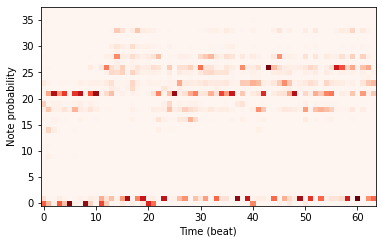

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [0, 21, 21, 0, 21, 21, 0, 21, 23, 30, 0, 25, 23, 23, 21, 1, 0, 21, 1, 26, 1, 33, 1, 23, 1, 21, 1, 19, 21, 21, 1, 18, 23, 28, 23, 18, 1, 28, 1, 16, 21, 1, 19, 21, 26, 23, 1, 18, 21, 26, 1, 26, 1, 26, 23, 21, 23, 25, 1, 21, 1, 18, 1, 21]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 21, 21, 0, 21, 21, 0, 21, 23, 30, 0, 25, 23, 23, 21, 1, 0, 21, 1, 26, 1, 33, 1, 23, 1, 21, 1, 19, 21, 21, 1, 18, 23, 28, 23, 18, 1, 28, 1, 16, 21, 1, 19, 21, 26, 23, 1, 18, 21, 26, 1, 26, 1, 26, 23, 21, 23, 25, 1, 21, 1, 18, 1, 21]


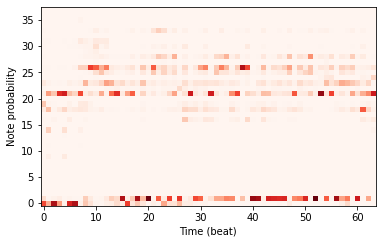

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [0, 14, 0, 21, 16, 21, 0, 11, 0, 14, 19, 26, 0, 0, 26, 1, 25, 23, 23, 21, 33, 1, 0, 1, 25, 25, 26, 1, 25, 26, 21, 1, 26, 28, 30, 25, 25, 25, 25, 30, 26, 1, 26, 23, 21, 26, 25, 33, 28, 1, 0, 33, 33, 1, 26, 21, 1, 18, 1, 21, 1, 26, 1, 28]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 14, 0, 21, 16, 21, 0, 11, 0, 14, 19, 26, 0, 0, 26, 1, 25, 23, 23, 21, 33, 1, 0, 1, 25, 25, 26, 1, 25, 26, 21, 1, 26, 28, 30, 25, 25, 25, 25, 30, 26, 1, 26, 23, 21, 26, 25, 33, 28, 1, 0, 33, 33, 1, 26, 21, 1, 18, 1, 21, 1, 26, 1, 28]


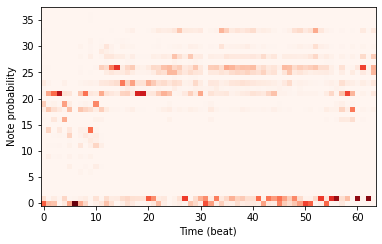

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [26, 0, 21, 1, 21, 0, 21, 0, 21, 0, 11, 13, 11, 0, 12, 21, 0, 0, 18, 10, 21, 26, 21, 1, 1, 1, 22, 1, 23, 26, 1, 26, 1, 18, 23, 23, 1, 21, 1, 25, 28, 1, 21, 1, 19, 26, 1, 21, 1, 26, 1, 30, 21, 1, 0, 26, 25, 26, 21, 21, 18, 1, 18, 23]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [26, 0, 21, 1, 21, 0, 21, 0, 21, 0, 11, 13, 11, 0, 12, 21, 0, 0, 18, 10, 21, 26, 21, 1, 1, 1, 22, 1, 23, 26, 1, 26, 1, 18, 23, 23, 1, 21, 1, 25, 28, 1, 21, 1, 19, 26, 1, 21, 1, 26, 1, 30, 21, 1, 0, 26, 25, 26, 21, 21, 18, 1, 18, 23]


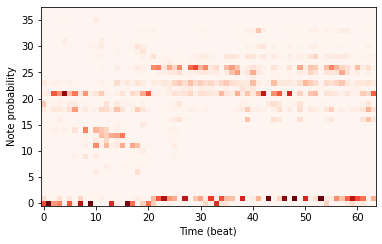

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [0, 18, 21, 0, 21, 21, 19, 23, 18, 21, 0, 23, 21, 28, 21, 1, 30, 28, 1, 26, 1, 25, 1, 30, 1, 24, 26, 1, 0, 0, 21, 19, 21, 26, 1, 23, 26, 1, 21, 23, 21, 1, 18, 21, 18, 23, 21, 1, 28, 26, 21, 1, 21, 26, 1, 23, 1, 23, 26, 1, 26, 21, 1, 21]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 18, 21, 0, 21, 21, 19, 23, 18, 21, 0, 23, 21, 28, 21, 1, 30, 28, 1, 26, 1, 25, 1, 30, 1, 24, 26, 1, 0, 0, 21, 19, 21, 26, 1, 23, 26, 1, 21, 23, 21, 1, 18, 21, 18, 23, 21, 1, 28, 26, 21, 1, 21, 26, 1, 23, 1, 23, 26, 1, 26, 21, 1, 21]


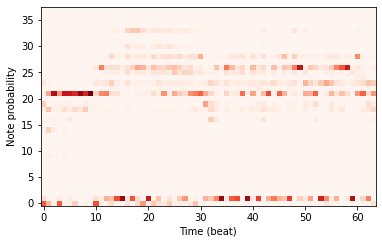

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [21, 0, 21, 21, 0, 21, 0, 21, 26, 26, 18, 23, 0, 23, 21, 0, 1, 33, 26, 1, 23, 1, 25, 33, 0, 22, 0, 25, 28, 21, 1, 26, 26, 1, 28, 1, 21, 1, 25, 33, 33, 1, 0, 28, 30, 33, 1, 21, 1, 18, 16, 14, 1, 25, 1, 21, 1, 28, 26, 1, 0, 19, 21, 1]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [21, 0, 21, 21, 0, 21, 0, 21, 26, 26, 18, 23, 0, 23, 21, 0, 1, 33, 26, 1, 23, 1, 25, 33, 0, 22, 0, 25, 28, 21, 1, 26, 26, 1, 28, 1, 21, 1, 25, 33, 33, 1, 0, 28, 30, 33, 1, 21, 1, 18, 16, 14, 1, 25, 1, 21, 1, 28, 26, 1, 0, 19, 21, 1]


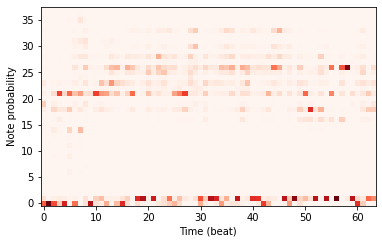

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [0, 0, 21, 0, 21, 0, 21, 19, 18, 21, 0, 0, 22, 21, 0, 26, 21, 0, 25, 0, 28, 26, 23, 22, 21, 1, 0, 26, 1, 28, 26, 1, 30, 26, 1, 28, 0, 1, 33, 1, 26, 1, 26, 21, 1, 18, 23, 23, 1, 28, 1, 26, 1, 25, 33, 26, 21, 0, 0, 1, 21, 0, 1, 26]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 21, 0, 21, 0, 21, 19, 18, 21, 0, 0, 22, 21, 0, 26, 21, 0, 25, 0, 28, 26, 23, 22, 21, 1, 0, 26, 1, 28, 26, 1, 30, 26, 1, 28, 0, 1, 33, 1, 26, 1, 26, 21, 1, 18, 23, 23, 1, 28, 1, 26, 1, 25, 33, 26, 21, 0, 0, 1, 21, 0, 1, 26]


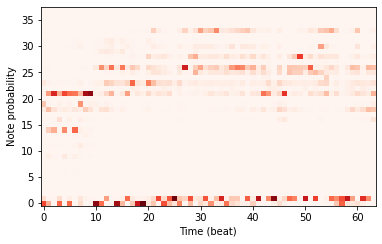

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [19, 18, 21, 0, 21, 21, 21, 0, 21, 1, 21, 1, 18, 1, 33, 1, 21, 1, 26, 22, 0, 21, 1, 18, 18, 1, 18, 21, 19, 21, 1, 28, 1, 26, 1, 21, 21, 26, 1, 21, 1, 21, 23, 26, 1, 25, 21, 1, 23, 21, 16, 18, 1, 18, 1, 26, 25, 28, 23, 21, 1, 21, 1, 18]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [19, 18, 21, 0, 21, 21, 21, 0, 21, 1, 21, 1, 18, 1, 33, 1, 21, 1, 26, 22, 0, 21, 1, 18, 18, 1, 18, 21, 19, 21, 1, 28, 1, 26, 1, 21, 21, 26, 1, 21, 1, 21, 23, 26, 1, 25, 21, 1, 23, 21, 16, 18, 1, 18, 1, 26, 25, 28, 23, 21, 1, 21, 1, 18]


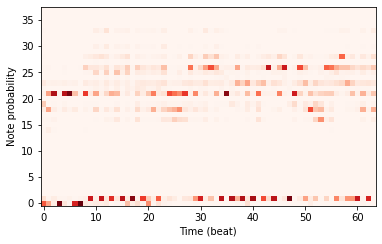

INFO:tensorflow:Priming with note 21
INFO:tensorflow:Generated sequence: [19, 18, 21, 0, 21, 21, 21, 0, 33, 25, 26, 1, 25, 1, 25, 33, 0, 21, 1, 25, 33, 0, 26, 1, 21, 21, 1, 1, 26, 1, 23, 21, 18, 18, 21, 1, 28, 26, 1, 28, 26, 1, 25, 1, 26, 1, 25, 25, 18, 1, 18, 21, 23, 26, 1, 28, 26, 1, 21, 1, 19, 21, 18, 23]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [19, 18, 21, 0, 21, 21, 21, 0, 33, 25, 26, 1, 25, 1, 25, 33, 0, 21, 1, 25, 33, 0, 26, 1, 21, 21, 1, 1, 26, 1, 23, 21, 18, 18, 21, 1, 28, 26, 1, 28, 26, 1, 25, 1, 26, 1, 25, 25, 18, 1, 18, 21, 23, 26, 1, 28, 26, 1, 21, 1, 19, 21, 18, 23]


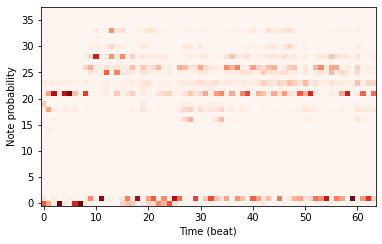

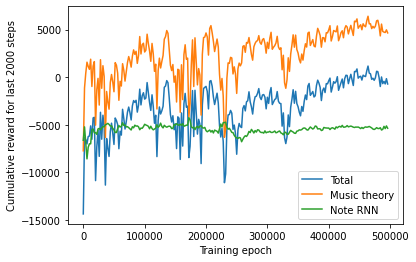

In [ ]:
training_steps = 500000
exploration_steps= 250000

rlt.train(num_steps=training_steps,
            exploration_period=exploration_steps)
for i in range (9):
  rlt.generate_music_sequence(visualize_probs=True, title='amMeuUltimo', length=64)
print('')
rlt.plot_rewards()

In [ ]:
print(rl_tuner_ops.C_MAJOR_SCALE)

[2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26]


INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [26, 0, 26, 23, 1, 21, 1, 19, 21, 23, 26, 1, 28, 26, 21, 1, 21, 1, 21, 21, 23, 26, 1, 26, 1, 0, 21, 1, 26, 1, 25, 21, 1, 25, 25, 25, 1, 26, 1, 25, 1, 28, 1, 21, 26, 1, 26, 1, 1, 1, 26, 1, 25, 21, 1, 23, 23, 26, 1, 21, 1, 23, 26, 1]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [26, 0, 26, 23, 1, 21, 1, 19, 21, 23, 26, 1, 28, 26, 21, 1, 21, 1, 21, 21, 23, 26, 1, 26, 1, 0, 21, 1, 26, 1, 25, 21, 1, 25, 25, 25, 1, 26, 1, 25, 1, 28, 1, 21, 26, 1, 26, 1, 1, 1, 26, 1, 25, 21, 1, 23, 23, 26, 1, 21, 1, 23, 26, 1]


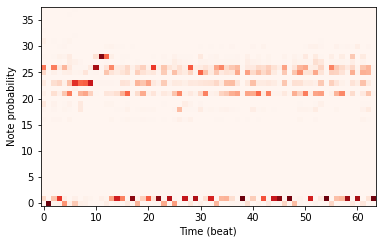

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [25, 0, 0, 21, 26, 26, 23, 23, 21, 26, 28, 26, 0, 23, 30, 1, 21, 1, 0, 26, 1, 27, 1, 25, 1, 26, 1, 0, 25, 18, 1, 26, 1, 23, 27, 28, 1, 0, 23, 21, 0, 26, 1, 26, 1, 28, 26, 1, 21, 1, 26, 1, 25, 25, 1, 21, 1, 21, 1, 21, 1, 26, 23, 26]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [25, 0, 0, 21, 26, 26, 23, 23, 21, 26, 28, 26, 0, 23, 30, 1, 21, 1, 0, 26, 1, 27, 1, 25, 1, 26, 1, 0, 25, 18, 1, 26, 1, 23, 27, 28, 1, 0, 23, 21, 0, 26, 1, 26, 1, 28, 26, 1, 21, 1, 26, 1, 25, 25, 1, 21, 1, 21, 1, 21, 1, 26, 23, 26]


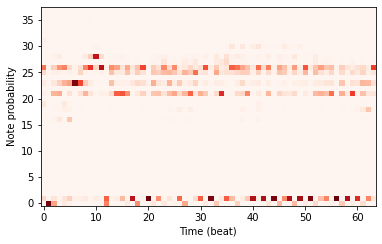

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [30, 0, 0, 16, 18, 0, 18, 0, 18, 28, 26, 28, 26, 25, 26, 1, 21, 1, 21, 26, 1, 21, 23, 26, 1, 26, 1, 27, 21, 1, 25, 26, 1, 0, 26, 1, 25, 1, 25, 25, 1, 25, 21, 1, 23, 21, 1, 26, 1, 21, 1, 19, 26, 1, 21, 1, 21, 26, 26, 1, 26, 1, 21, 23]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [30, 0, 0, 16, 18, 0, 18, 0, 18, 28, 26, 28, 26, 25, 26, 1, 21, 1, 21, 26, 1, 21, 23, 26, 1, 26, 1, 27, 21, 1, 25, 26, 1, 0, 26, 1, 25, 1, 25, 25, 1, 25, 21, 1, 23, 21, 1, 26, 1, 21, 1, 19, 26, 1, 21, 1, 21, 26, 26, 1, 26, 1, 21, 23]


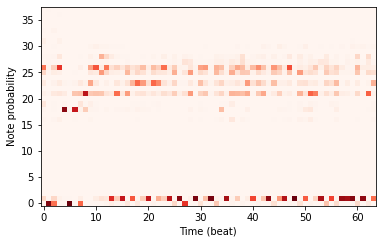

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [26, 0, 26, 1, 23, 21, 23, 23, 21, 23, 28, 1, 21, 1, 21, 26, 1, 26, 23, 26, 1, 26, 1, 27, 27, 1, 0, 25, 1, 26, 1, 27, 23, 21, 30, 25, 1, 23, 25, 21, 1, 26, 1, 23, 21, 1, 26, 1, 26, 1, 28, 1, 27, 1, 28, 25, 25, 26, 1, 0, 26, 1, 26, 1]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [26, 0, 26, 1, 23, 21, 23, 23, 21, 23, 28, 1, 21, 1, 21, 26, 1, 26, 23, 26, 1, 26, 1, 27, 27, 1, 0, 25, 1, 26, 1, 27, 23, 21, 30, 25, 1, 23, 25, 21, 1, 26, 1, 23, 21, 1, 26, 1, 26, 1, 28, 1, 27, 1, 28, 25, 25, 26, 1, 0, 26, 1, 26, 1]


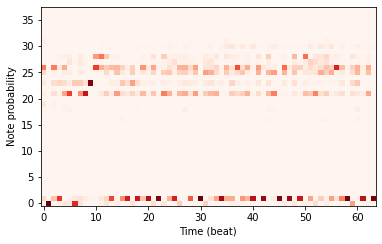

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [26, 0, 26, 23, 26, 1, 21, 23, 28, 26, 28, 26, 25, 26, 1, 21, 26, 1, 26, 23, 1, 21, 1, 25, 26, 1, 26, 1, 21, 21, 25, 1, 26, 1, 25, 26, 1, 1, 26, 1, 21, 1, 19, 25, 21, 1, 27, 1, 21, 25, 21, 21, 1, 23, 25, 25, 1, 21, 1, 23, 26, 1, 28, 1]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q


Generated sequence: [26, 0, 26, 23, 26, 1, 21, 23, 28, 26, 28, 26, 25, 26, 1, 21, 26, 1, 26, 23, 1, 21, 1, 25, 26, 1, 26, 1, 21, 21, 25, 1, 26, 1, 25, 26, 1, 1, 26, 1, 21, 1, 19, 25, 21, 1, 27, 1, 21, 25, 21, 21, 1, 23, 25, 25, 1, 21, 1, 23, 26, 1, 28, 1]


INFO:tensorflow:Visualizing note selection probabilities:


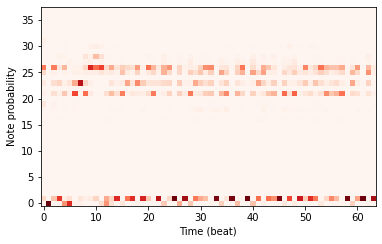

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [19, 0, 21, 23, 26, 1, 23, 23, 1, 21, 26, 28, 1, 0, 26, 25, 23, 21, 1, 23, 1, 26, 1, 21, 25, 26, 1, 26, 1, 0, 25, 1, 25, 26, 1, 0, 26, 1, 19, 23, 28, 26, 1, 0, 25, 1, 23, 25, 26, 1, 21, 1, 23, 1, 28, 26, 1, 21, 1, 25, 1, 21, 1, 25]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [19, 0, 21, 23, 26, 1, 23, 23, 1, 21, 26, 28, 1, 0, 26, 25, 23, 21, 1, 23, 1, 26, 1, 21, 25, 26, 1, 26, 1, 0, 25, 1, 25, 26, 1, 0, 26, 1, 19, 23, 28, 26, 1, 0, 25, 1, 23, 25, 26, 1, 21, 1, 23, 1, 28, 26, 1, 21, 1, 25, 1, 21, 1, 25]


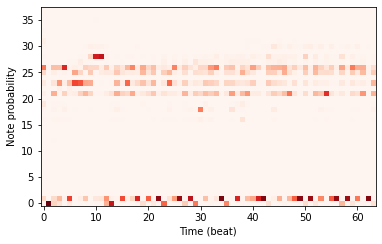

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [1, 0, 23, 23, 26, 1, 23, 23, 1, 21, 28, 1, 28, 26, 1, 21, 1, 23, 1, 25, 26, 1, 26, 25, 23, 21, 1, 25, 21, 1, 21, 1, 21, 27, 28, 27, 1, 26, 1, 25, 21, 1, 26, 1, 1, 26, 1, 25, 23, 26, 1, 26, 1, 25, 23, 21, 1, 26, 21, 28, 1, 26, 1, 28]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [1, 0, 23, 23, 26, 1, 23, 23, 1, 21, 28, 1, 28, 26, 1, 21, 1, 23, 1, 25, 26, 1, 26, 25, 23, 21, 1, 25, 21, 1, 21, 1, 21, 27, 28, 27, 1, 26, 1, 25, 21, 1, 26, 1, 1, 26, 1, 25, 23, 26, 1, 26, 1, 25, 23, 21, 1, 26, 21, 28, 1, 26, 1, 28]


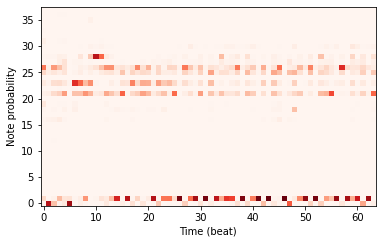

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [1, 0, 21, 0, 18, 21, 23, 26, 23, 23, 23, 23, 26, 1, 26, 1, 21, 1, 26, 1, 0, 21, 1, 23, 26, 1, 25, 1, 25, 26, 1, 23, 21, 1, 26, 1, 23, 21, 1, 26, 1, 28, 26, 1, 28, 1, 21, 1, 21, 1, 25, 26, 18, 23, 21, 1, 25, 1, 21, 1, 25, 26, 1, 28]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [1, 0, 21, 0, 18, 21, 23, 26, 23, 23, 23, 23, 26, 1, 26, 1, 21, 1, 26, 1, 0, 21, 1, 23, 26, 1, 25, 1, 25, 26, 1, 23, 21, 1, 26, 1, 23, 21, 1, 26, 1, 28, 26, 1, 28, 1, 21, 1, 21, 1, 25, 26, 18, 23, 21, 1, 25, 1, 21, 1, 25, 26, 1, 28]


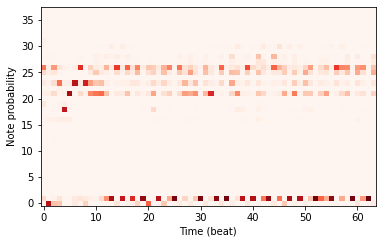

INFO:tensorflow:Priming with note 28
INFO:tensorflow:Generated sequence: [16, 0, 21, 23, 26, 1, 23, 21, 23, 26, 1, 0, 25, 23, 21, 1, 25, 26, 1, 26, 1, 25, 23, 18, 21, 1, 0, 23, 1, 21, 25, 23, 26, 1, 27, 1, 26, 1, 0, 18, 19, 21, 1, 26, 1, 28, 1, 0, 27, 28, 21, 1, 26, 1, 28, 30, 1, 21, 1, 26, 1, 26, 1, 21]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [16, 0, 21, 23, 26, 1, 23, 21, 23, 26, 1, 0, 25, 23, 21, 1, 25, 26, 1, 26, 1, 25, 23, 18, 21, 1, 0, 23, 1, 21, 25, 23, 26, 1, 27, 1, 26, 1, 0, 18, 19, 21, 1, 26, 1, 28, 1, 0, 27, 28, 21, 1, 26, 1, 28, 30, 1, 21, 1, 26, 1, 26, 1, 21]


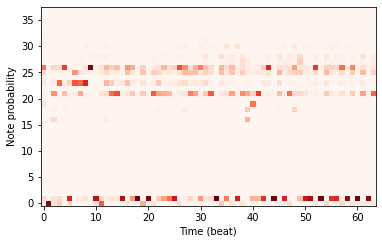

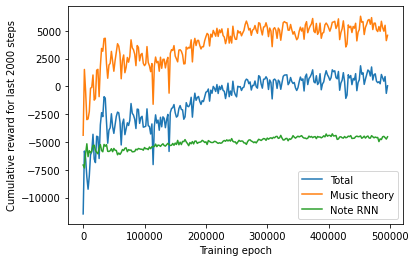

In [ ]:
for i in range (9):
  rlt.generate_music_sequence(visualize_probs=True, title='Amforçada', length=64)
print('')
rlt.plot_rewards()

In [ ]:
stat_dict = rlt.evaluate_music_theory_metrics(num_compositions=100)
stat_dict

INFO:tensorflow:Total compositions: 100.0
Total notes:6400.0
	Compositions starting with tonic: 0.0
	Compositions with unique highest note:34.0
	Compositions with unique lowest note:58.0
	Number of resolved leaps:119.0
	Number of double leaps:52.0
	Notes not in key:1266.0
	Notes in motif:5061.0
	Notes in repeated motif:0.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.0
	Percent compositions with unique highest note:0.34
	Percent compositions with unique lowest note:0.58
	Percent of leaps resolved:0.695906432748538
	Percent notes not in key:0.1978125
	Percent notes in motif:0.79078125
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.22030806395492322
	Average autocorrelation of lag2:0.056343327073961724
	Average autocorrelation of lag3:-0.08850531287784699

	Avg. num octave jumps per composition:0.34
	Avg. num sevenths per composition:0.53
	Avg. num fifths per composition:1.03
	Avg. num sixt

{'autocorrelation1': [-0.18509930706056804,
  -0.29577787555944324,
  -0.34943637709691294,
  -0.13162247641977995,
  -0.15016226564648313,
  -0.33655997522653214,
  -0.11729877611424508,
  -0.18002119488984847,
  -0.24060214677211275,
  -0.19595133102935874,
  -0.20618359922217105,
  -0.4006854413034208,
  -0.24421888205309075,
  -0.29712917037055603,
  -0.14459161545001284,
  -0.30517670199407354,
  -0.34503562590361325,
  -0.17987805887338118,
  -0.14333421919407785,
  -0.31806217479227267,
  -0.24075168782830073,
  -0.21065082828642678,
  -0.11353889016741432,
  -0.3662248650751367,
  -0.2282360599679738,
  -0.3539915343484399,
  -0.3029566780404582,
  0.041503713624080014,
  -0.18798098779062217,
  -0.20163170163170163,
  -0.0622624239810711,
  -0.3822890750736188,
  -0.0031999392361698816,
  -0.40610209045490403,
  0.005676452561579983,
  -0.15222840797244094,
  -0.22052189736529124,
  -0.29636475660522027,
  -0.046931520125258606,
  -0.3219392450340325,
  -0.2213840668426539,
  

# mucho loco
este teste levou a resultados imprevistos!!!

In [ ]:
from magenta.models.rl_tuner import rl_tuner_eval_metrics
from magenta.models.rl_tuner import rl_tuner_eval_metrics
import numpy as np
from magenta.models.rl_tuner import rl_tuner_ops
rl_tuner_ops.C_MAJOR_SCALE = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
rl_tuner_ops.C_MAJOR_KEY = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
reward_scaler=3
class KeyAmRLTuner(magenta.models.rl_tuner.rl_tuner.RLTuner): 
  def reward_tonic(self, action, tonic_note=rl_tuner_ops.A_MINOR_TONIC,
                    reward_amount=5.0):
    rl_tuner_ops.C_MAJOR_SCALE = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
    rl_tuner_ops.C_MAJOR_KEY = [5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
    NOTE_OFF = 0
    NO_EVENT = 1
    action_note = np.argmax(action)
    first_note_of_final_bar = self.num_notes_in_melody - 4
    tonic_note = 23
    if self.beat == 0 or self.beat == first_note_of_final_bar:
      if action_note == tonic_note:
        return reward_amount
    elif self.beat == first_note_of_final_bar + 1 & first_note_of_final_bar == tonic_note:
      if action_note == NO_EVENT:
        return reward_amount + 2    
    elif self.beat > first_note_of_final_bar + 1:
      if action_note in (NO_EVENT, NOTE_OFF):
        return reward_amount
    return 0.0

  def reward_key(self, action, penalty_amount=-3.0, key=None):

    if key is None:
      # key = rl_tuner_ops.A_MINOR_TONIC
      Key = 23

    reward = 0

    action_note = np.argmax(action)
    if action_note not in key:
      reward = penalty_amount

    return reward
    
  def evaluate_music_theory_metrics(self, num_compositions=10000, key=None,
                                    tonic_note=rl_tuner_ops.A_MINOR_TONIC):

    stat_dict = rl_tuner_eval_metrics.compute_composition_stats(
        self,
        num_compositions=num_compositions,
        composition_length=self.num_notes_in_melody,
        key=key,
        tonic_note=23)

    return stat_dict

In [ ]:
rlt = RLTuner(output_ckpt_dir,
                         midi_primer='/content/drive/MyDrive/a_TCC/Edio_Tcc_RlTuner/primer_A_minor.mid',
                         priming_mode= 'single_midi',
                         reward_mode= 'music_theory_all',
                         dqn_hparams=dqn_hparams,
                         reward_scaler=1.5,
                         save_name=output_ckpt,
                         output_every_nth=output_every_nth,
                         note_rnn_checkpoint_dir=note_rnn_checkpoint_dir,
                         note_rnn_checkpoint_file=backup_checkpoint_file,
                         note_rnn_type=note_rnn_type,
                         note_rnn_hparams=hparams,
                         num_notes_in_melody=num_notes_in_melody,
                         exploration_mode=exploration_mode,
                         algorithm=algorithm,
                         training_file_list = training_file_list)

INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:[<tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:[<tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'target_q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing 


Successfully initialized internal nets from checkpoint!


INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-0.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-0.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-0.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-0.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 2000
INFO:tensorflow:	Reward for last 2000 steps: -12525.59922732926
INFO:tensorflow:		Music theory reward: -4921.7116600475165
INFO:tensorflow:		Note RNN reward: -7603.887567281723


Training iteration 2000
	Reward for last 2000 steps: -12525.59922732926
		Music theory reward: -4921.7116600475165
		Note RNN reward: -7603.887567281723


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-2000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-200000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-2000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-2000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-2000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-20000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 4000
INFO:tensorflow:	Reward for last 2000 steps: -9895.590929163458
INFO:tensorflow:		Music theory reward: -993.6909716257966
INFO:tensorflow:		Note RNN reward: -8901.899957537651


Training iteration 4000
	Reward for last 2000 steps: -9895.590929163458
		Music theory reward: -993.6909716257966
		Note RNN reward: -8901.899957537651


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-40000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-400000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-4000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-4000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-4000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-4000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 6000
INFO:tensorflow:	Reward for last 2000 steps: -8867.794266956651
INFO:tensorflow:		Music theory reward: -2464.089510219887
INFO:tensorflow:		Note RNN reward: -6403.704756736755


Training iteration 6000
	Reward for last 2000 steps: -8867.794266956651
		Music theory reward: -2464.089510219887
		Note RNN reward: -6403.704756736755


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-6000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-6000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-60000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-6000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-6000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 8000
INFO:tensorflow:	Reward for last 2000 steps: -11208.794508909054
INFO:tensorflow:		Music theory reward: -5557.840653990572
INFO:tensorflow:		Note RNN reward: -5650.95385491848


Training iteration 8000
	Reward for last 2000 steps: -11208.794508909054
		Music theory reward: -5557.840653990572
		Note RNN reward: -5650.95385491848


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-80000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-8000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 10000
INFO:tensorflow:	Reward for last 2000 steps: -9373.535866067274
INFO:tensorflow:		Music theory reward: -3494.1837494824904
INFO:tensorflow:		Note RNN reward: -5879.352116584778


Training iteration 10000
	Reward for last 2000 steps: -9373.535866067274
		Music theory reward: -3494.1837494824904
		Note RNN reward: -5879.352116584778


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-10000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-100000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 12000
INFO:tensorflow:	Reward for last 2000 steps: -9698.636502948977
INFO:tensorflow:		Music theory reward: -3607.3637519752597
INFO:tensorflow:		Note RNN reward: -6091.2727509737015


Training iteration 12000
	Reward for last 2000 steps: -9698.636502948977
		Music theory reward: -3607.3637519752597
		Note RNN reward: -6091.2727509737015


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-12000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-12000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-120000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-12000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-12000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 14000
INFO:tensorflow:	Reward for last 2000 steps: -7569.57800239513
INFO:tensorflow:		Music theory reward: -1270.963745059444
INFO:tensorflow:		Note RNN reward: -6298.614257335663


Training iteration 14000
	Reward for last 2000 steps: -7569.57800239513
		Music theory reward: -1270.963745059444
		Note RNN reward: -6298.614257335663


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-14000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-140000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-14000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-14000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-14000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 16000
INFO:tensorflow:	Reward for last 2000 steps: -7739.496123996293
INFO:tensorflow:		Music theory reward: -868.4412853389016
INFO:tensorflow:		Note RNN reward: -6871.054838657379


Training iteration 16000
	Reward for last 2000 steps: -7739.496123996293
		Music theory reward: -868.4412853389016
		Note RNN reward: -6871.054838657379


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-16000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-16000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-16000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-16000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-160000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 18000
INFO:tensorflow:	Reward for last 2000 steps: -9210.085225389188
INFO:tensorflow:		Music theory reward: -3248.460491106673
INFO:tensorflow:		Note RNN reward: -5961.624734282494


Training iteration 18000
	Reward for last 2000 steps: -9210.085225389188
		Music theory reward: -3248.460491106673
		Note RNN reward: -5961.624734282494


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-18000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-180000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-18000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-18000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-18000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 20000
INFO:tensorflow:	Reward for last 2000 steps: -9540.186529848057
INFO:tensorflow:		Music theory reward: -3250.976404282524
INFO:tensorflow:		Note RNN reward: -6289.210125565529


Training iteration 20000
	Reward for last 2000 steps: -9540.186529848057
		Music theory reward: -3250.976404282524
		Note RNN reward: -6289.210125565529


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-20000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-200000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-20000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-20000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-20000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 22000
INFO:tensorflow:	Reward for last 2000 steps: -9684.317960353554
INFO:tensorflow:		Music theory reward: -3321.4652974326023
INFO:tensorflow:		Note RNN reward: -6362.852662920952


Training iteration 22000
	Reward for last 2000 steps: -9684.317960353554
		Music theory reward: -3321.4652974326023
		Note RNN reward: -6362.852662920952


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-22000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-220000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-22000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-22000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-22000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 24000
INFO:tensorflow:	Reward for last 2000 steps: -12105.978226871519
INFO:tensorflow:		Music theory reward: -5799.192843766246
INFO:tensorflow:		Note RNN reward: -6306.785383105278


Training iteration 24000
	Reward for last 2000 steps: -12105.978226871519
		Music theory reward: -5799.192843766246
		Note RNN reward: -6306.785383105278


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-24000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-24000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-240000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-24000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-24000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 26000
INFO:tensorflow:	Reward for last 2000 steps: -9888.999026167796
INFO:tensorflow:		Music theory reward: -3215.613365280996
INFO:tensorflow:		Note RNN reward: -6673.3856608867645


Training iteration 26000
	Reward for last 2000 steps: -9888.999026167796
		Music theory reward: -3215.613365280996
		Note RNN reward: -6673.3856608867645


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-26000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-26000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-260000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-26000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-26000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 28000
INFO:tensorflow:	Reward for last 2000 steps: -22495.59612038665
INFO:tensorflow:		Music theory reward: -17023.89272132458
INFO:tensorflow:		Note RNN reward: -5471.703399062157


Training iteration 28000
	Reward for last 2000 steps: -22495.59612038665
		Music theory reward: -17023.89272132458
		Note RNN reward: -5471.703399062157


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-28000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-28000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-28000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-280000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-28000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 30000
INFO:tensorflow:	Reward for last 2000 steps: -16858.73230349363
INFO:tensorflow:		Music theory reward: -12574.944056981218
INFO:tensorflow:		Note RNN reward: -4283.788246512413


Training iteration 30000
	Reward for last 2000 steps: -16858.73230349363
		Music theory reward: -12574.944056981218
		Note RNN reward: -4283.788246512413


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-30000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-300000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-30000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-30000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-30000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 32000
INFO:tensorflow:	Reward for last 2000 steps: -19458.992165850137
INFO:tensorflow:		Music theory reward: -14635.013241694907
INFO:tensorflow:		Note RNN reward: -4823.978924155235


Training iteration 32000
	Reward for last 2000 steps: -19458.992165850137
		Music theory reward: -14635.013241694907
		Note RNN reward: -4823.978924155235


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-32000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-32000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-32000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-320000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-32000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 34000
INFO:tensorflow:	Reward for last 2000 steps: -10445.245458754183
INFO:tensorflow:		Music theory reward: -5404.375254663125
INFO:tensorflow:		Note RNN reward: -5040.870204091072


Training iteration 34000
	Reward for last 2000 steps: -10445.245458754183
		Music theory reward: -5404.375254663125
		Note RNN reward: -5040.870204091072


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-34000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-340000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 36000
INFO:tensorflow:	Reward for last 2000 steps: -10164.594125532913
INFO:tensorflow:		Music theory reward: -4915.180553102324
INFO:tensorflow:		Note RNN reward: -5249.413572430611


Training iteration 36000
	Reward for last 2000 steps: -10164.594125532913
		Music theory reward: -4915.180553102324
		Note RNN reward: -5249.413572430611


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-36000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-36000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-360000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-36000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-36000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 38000
INFO:tensorflow:	Reward for last 2000 steps: -9939.227824333415
INFO:tensorflow:		Music theory reward: -4975.168486836642
INFO:tensorflow:		Note RNN reward: -4964.0593374967575


Training iteration 38000
	Reward for last 2000 steps: -9939.227824333415
		Music theory reward: -4975.168486836642
		Note RNN reward: -4964.0593374967575


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-380000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-38000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-38000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-38000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-38000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 40000
INFO:tensorflow:	Reward for last 2000 steps: -12412.043774642612
INFO:tensorflow:		Music theory reward: -7354.163917817738
INFO:tensorflow:		Note RNN reward: -5057.879856824875


Training iteration 40000
	Reward for last 2000 steps: -12412.043774642612
		Music theory reward: -7354.163917817738
		Note RNN reward: -5057.879856824875


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-40000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-40000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-40000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-400000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-40000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 42000
INFO:tensorflow:	Reward for last 2000 steps: -12688.727579992805
INFO:tensorflow:		Music theory reward: -7850.611002486718
INFO:tensorflow:		Note RNN reward: -4838.116577506065


Training iteration 42000
	Reward for last 2000 steps: -12688.727579992805
		Music theory reward: -7850.611002486718
		Note RNN reward: -4838.116577506065


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-42000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-42000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-42000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-42000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-420000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 44000
INFO:tensorflow:	Reward for last 2000 steps: -10131.64822175625
INFO:tensorflow:		Music theory reward: -5260.521363760238
INFO:tensorflow:		Note RNN reward: -4871.126857995987


Training iteration 44000
	Reward for last 2000 steps: -10131.64822175625
		Music theory reward: -5260.521363760238
		Note RNN reward: -4871.126857995987


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-44000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-44000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-44000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-44000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-440000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 46000
INFO:tensorflow:	Reward for last 2000 steps: -14879.06271162005
INFO:tensorflow:		Music theory reward: -9353.442160033901
INFO:tensorflow:		Note RNN reward: -5525.620551586151


Training iteration 46000
	Reward for last 2000 steps: -14879.06271162005
		Music theory reward: -9353.442160033901
		Note RNN reward: -5525.620551586151


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-46000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-46000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-460000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-46000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-46000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 48000
INFO:tensorflow:	Reward for last 2000 steps: -9185.876292280875
INFO:tensorflow:		Music theory reward: -3450.51522844287
INFO:tensorflow:		Note RNN reward: -5735.361063838005


Training iteration 48000
	Reward for last 2000 steps: -9185.876292280875
		Music theory reward: -3450.51522844287
		Note RNN reward: -5735.361063838005


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-480000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-48000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-48000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-48000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-48000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 2000 steps: -11458.168972324625
INFO:tensorflow:		Music theory reward: -6358.0816410296175
INFO:tensorflow:		Note RNN reward: -5100.087331295013


Training iteration 50000
	Reward for last 2000 steps: -11458.168972324625
		Music theory reward: -6358.0816410296175
		Note RNN reward: -5100.087331295013


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-50000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-50000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-50000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-50000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 52000
INFO:tensorflow:	Reward for last 2000 steps: -7970.430731490734
INFO:tensorflow:		Music theory reward: -2698.5782084022803
INFO:tensorflow:		Note RNN reward: -5271.852523088455


Training iteration 52000
	Reward for last 2000 steps: -7970.430731490734
		Music theory reward: -2698.5782084022803
		Note RNN reward: -5271.852523088455


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-52000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-52000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-52000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-52000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 54000
INFO:tensorflow:	Reward for last 2000 steps: -7681.991111704876
INFO:tensorflow:		Music theory reward: -2480.1305400820106
INFO:tensorflow:		Note RNN reward: -5201.8605716228485


Training iteration 54000
	Reward for last 2000 steps: -7681.991111704876
		Music theory reward: -2480.1305400820106
		Note RNN reward: -5201.8605716228485


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-54000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-54000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-54000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-54000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 56000
INFO:tensorflow:	Reward for last 2000 steps: -6997.647243590352
INFO:tensorflow:		Music theory reward: -1836.518110127444
INFO:tensorflow:		Note RNN reward: -5161.129133462906


Training iteration 56000
	Reward for last 2000 steps: -6997.647243590352
		Music theory reward: -1836.518110127444
		Note RNN reward: -5161.129133462906


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-56000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-56000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-56000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-56000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 58000
INFO:tensorflow:	Reward for last 2000 steps: -7140.010499272647
INFO:tensorflow:		Music theory reward: -1524.5084117987876
INFO:tensorflow:		Note RNN reward: -5615.502087473869


Training iteration 58000
	Reward for last 2000 steps: -7140.010499272647
		Music theory reward: -1524.5084117987876
		Note RNN reward: -5615.502087473869


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-58000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-58000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-58000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-58000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 60000
INFO:tensorflow:	Reward for last 2000 steps: -7738.883817314856
INFO:tensorflow:		Music theory reward: -2311.8713996407873
INFO:tensorflow:		Note RNN reward: -5427.012417674065


Training iteration 60000
	Reward for last 2000 steps: -7738.883817314856
		Music theory reward: -2311.8713996407873
		Note RNN reward: -5427.012417674065


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-60000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-60000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-60000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-60000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 62000
INFO:tensorflow:	Reward for last 2000 steps: -6225.424393884575
INFO:tensorflow:		Music theory reward: -870.2589930218976
INFO:tensorflow:		Note RNN reward: -5355.165400862694


Training iteration 62000
	Reward for last 2000 steps: -6225.424393884575
		Music theory reward: -870.2589930218976
		Note RNN reward: -5355.165400862694


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-62000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-62000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-62000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-62000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 64000
INFO:tensorflow:	Reward for last 2000 steps: -9666.670039663102
INFO:tensorflow:		Music theory reward: -4946.313077459163
INFO:tensorflow:		Note RNN reward: -4720.3569622039795


Training iteration 64000
	Reward for last 2000 steps: -9666.670039663102
		Music theory reward: -4946.313077459163
		Note RNN reward: -4720.3569622039795


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-64000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-64000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-64000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-64000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 66000
INFO:tensorflow:	Reward for last 2000 steps: -10159.301377340225
INFO:tensorflow:		Music theory reward: -5696.698165102867
INFO:tensorflow:		Note RNN reward: -4462.603212237358


Training iteration 66000
	Reward for last 2000 steps: -10159.301377340225
		Music theory reward: -5696.698165102867
		Note RNN reward: -4462.603212237358


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-66000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-66000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-66000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-66000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 68000
INFO:tensorflow:	Reward for last 2000 steps: -8348.147385637178
INFO:tensorflow:		Music theory reward: -3406.507416765115
INFO:tensorflow:		Note RNN reward: -4941.63996887207


Training iteration 68000
	Reward for last 2000 steps: -8348.147385637178
		Music theory reward: -3406.507416765115
		Note RNN reward: -4941.63996887207


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-68000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-68000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-68000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-68000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 70000
INFO:tensorflow:	Reward for last 2000 steps: -7713.027802326688
INFO:tensorflow:		Music theory reward: -2855.703345873367
INFO:tensorflow:		Note RNN reward: -4857.324456453323


Training iteration 70000
	Reward for last 2000 steps: -7713.027802326688
		Music theory reward: -2855.703345873367
		Note RNN reward: -4857.324456453323


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-70000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-70000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-70000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-70000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 72000
INFO:tensorflow:	Reward for last 2000 steps: -6984.244344064132
INFO:tensorflow:		Music theory reward: -2357.823146530514
INFO:tensorflow:		Note RNN reward: -4626.4211975336075


Training iteration 72000
	Reward for last 2000 steps: -6984.244344064132
		Music theory reward: -2357.823146530514
		Note RNN reward: -4626.4211975336075


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-72000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-72000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-72000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-72000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 74000
INFO:tensorflow:	Reward for last 2000 steps: -6292.848360662826
INFO:tensorflow:		Music theory reward: -1765.789466266996
INFO:tensorflow:		Note RNN reward: -4527.058894395828


Training iteration 74000
	Reward for last 2000 steps: -6292.848360662826
		Music theory reward: -1765.789466266996
		Note RNN reward: -4527.058894395828


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-74000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-74000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-74000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-74000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 76000
INFO:tensorflow:	Reward for last 2000 steps: -6657.951214753686
INFO:tensorflow:		Music theory reward: -2221.57940348299
INFO:tensorflow:		Note RNN reward: -4436.371811270714


Training iteration 76000
	Reward for last 2000 steps: -6657.951214753686
		Music theory reward: -2221.57940348299
		Note RNN reward: -4436.371811270714


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-76000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-76000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-76000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-76000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 78000
INFO:tensorflow:	Reward for last 2000 steps: -7279.824398220888
INFO:tensorflow:		Music theory reward: -2347.5966302765496
INFO:tensorflow:		Note RNN reward: -4932.227767944336


Training iteration 78000
	Reward for last 2000 steps: -7279.824398220888
		Music theory reward: -2347.5966302765496
		Note RNN reward: -4932.227767944336


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-78000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-78000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-78000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-78000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 80000
INFO:tensorflow:	Reward for last 2000 steps: -6189.993901356422
INFO:tensorflow:		Music theory reward: -854.6826188408912
INFO:tensorflow:		Note RNN reward: -5335.311282515526


Training iteration 80000
	Reward for last 2000 steps: -6189.993901356422
		Music theory reward: -854.6826188408912
		Note RNN reward: -5335.311282515526


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-80000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-80000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-80000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-80000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 82000
INFO:tensorflow:	Reward for last 2000 steps: -6393.8406415034815
INFO:tensorflow:		Music theory reward: -1436.453167562634
INFO:tensorflow:		Note RNN reward: -4957.387473940849


Training iteration 82000
	Reward for last 2000 steps: -6393.8406415034815
		Music theory reward: -1436.453167562634
		Note RNN reward: -4957.387473940849


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-82000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-82000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-82000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-82000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 84000
INFO:tensorflow:	Reward for last 2000 steps: -6894.403577908744
INFO:tensorflow:		Music theory reward: -1263.6755392401021
INFO:tensorflow:		Note RNN reward: -5630.7280386686325


Training iteration 84000
	Reward for last 2000 steps: -6894.403577908744
		Music theory reward: -1263.6755392401021
		Note RNN reward: -5630.7280386686325


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-84000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-84000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-84000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-84000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 86000
INFO:tensorflow:	Reward for last 2000 steps: -6532.410027553352
INFO:tensorflow:		Music theory reward: -1110.602592875273
INFO:tensorflow:		Note RNN reward: -5421.807434678078


Training iteration 86000
	Reward for last 2000 steps: -6532.410027553352
		Music theory reward: -1110.602592875273
		Note RNN reward: -5421.807434678078


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-86000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-86000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-86000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-86000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 88000
INFO:tensorflow:	Reward for last 2000 steps: -8052.701120730017
INFO:tensorflow:		Music theory reward: -2637.863998528089
INFO:tensorflow:		Note RNN reward: -5414.83712220192


Training iteration 88000
	Reward for last 2000 steps: -8052.701120730017
		Music theory reward: -2637.863998528089
		Note RNN reward: -5414.83712220192


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-88000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-88000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-88000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-88000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 90000
INFO:tensorflow:	Reward for last 2000 steps: -6031.49961592489
INFO:tensorflow:		Music theory reward: -804.2887799911916
INFO:tensorflow:		Note RNN reward: -5227.210835933685


Training iteration 90000
	Reward for last 2000 steps: -6031.49961592489
		Music theory reward: -804.2887799911916
		Note RNN reward: -5227.210835933685


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-90000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-90000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-90000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-90000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 92000
INFO:tensorflow:	Reward for last 2000 steps: -8646.61329890055
INFO:tensorflow:		Music theory reward: -3545.9268866852935
INFO:tensorflow:		Note RNN reward: -5100.686412215233


Training iteration 92000
	Reward for last 2000 steps: -8646.61329890055
		Music theory reward: -3545.9268866852935
		Note RNN reward: -5100.686412215233


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-92000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-92000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-92000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-92000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 94000
INFO:tensorflow:	Reward for last 2000 steps: -8723.532106777875
INFO:tensorflow:		Music theory reward: -4164.480172893228
INFO:tensorflow:		Note RNN reward: -4559.051933884621


Training iteration 94000
	Reward for last 2000 steps: -8723.532106777875
		Music theory reward: -4164.480172893228
		Note RNN reward: -4559.051933884621


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-94000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-94000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-94000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-94000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 96000
INFO:tensorflow:	Reward for last 2000 steps: -7914.516057489895
INFO:tensorflow:		Music theory reward: -3081.681337951194
INFO:tensorflow:		Note RNN reward: -4832.834719538689


Training iteration 96000
	Reward for last 2000 steps: -7914.516057489895
		Music theory reward: -3081.681337951194
		Note RNN reward: -4832.834719538689


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-96000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-96000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-96000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-96000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 98000
INFO:tensorflow:	Reward for last 2000 steps: -8654.624433829771
INFO:tensorflow:		Music theory reward: -3789.884908988481
INFO:tensorflow:		Note RNN reward: -4864.739524841309


Training iteration 98000
	Reward for last 2000 steps: -8654.624433829771
		Music theory reward: -3789.884908988481
		Note RNN reward: -4864.739524841309


INFO:tensorflow:Priming with note 23
INFO:tensorflow:Generated sequence: [0, 0, 23, 0, 25, 0, 19, 0, 23, 0, 23, 0, 23, 26, 11, 19, 0, 18, 0, 26, 26, 0, 23, 0, 18, 0, 23, 25, 0, 23, 0, 23, 0, 11, 0, 18, 0, 11, 0, 14, 0, 11, 0, 14, 0, 11, 11, 0, 11, 0, 14, 0, 11, 12, 0, 11, 11, 0, 12, 0, 12, 7, 0, 11]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 23, 0, 25, 0, 19, 0, 23, 0, 23, 0, 23, 26, 11, 19, 0, 18, 0, 26, 26, 0, 23, 0, 18, 0, 23, 25, 0, 23, 0, 23, 0, 11, 0, 18, 0, 11, 0, 14, 0, 11, 0, 14, 0, 11, 11, 0, 11, 0, 14, 0, 11, 12, 0, 11, 11, 0, 12, 0, 12, 7, 0, 11]


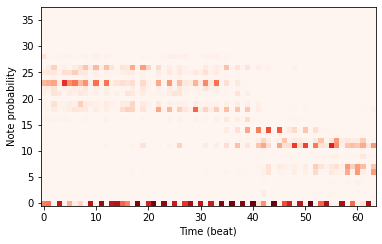

INFO:tensorflow:Priming with note 23
INFO:tensorflow:Generated sequence: [0, 0, 19, 22, 0, 19, 18, 0, 21, 0, 0, 26, 24, 23, 19, 21, 0, 18, 0, 21, 14, 0, 18, 14, 0, 14, 0, 11, 11, 0, 11, 0, 7, 11, 0, 6, 7, 0, 11, 0, 6, 7, 11, 12, 0, 7, 11, 0, 11, 11, 0, 11, 7, 5, 0, 6, 12, 0, 9, 0, 11, 11, 0, 6]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 19, 22, 0, 19, 18, 0, 21, 0, 0, 26, 24, 23, 19, 21, 0, 18, 0, 21, 14, 0, 18, 14, 0, 14, 0, 11, 11, 0, 11, 0, 7, 11, 0, 6, 7, 0, 11, 0, 6, 7, 11, 12, 0, 7, 11, 0, 11, 11, 0, 11, 7, 5, 0, 6, 12, 0, 9, 0, 11, 11, 0, 6]


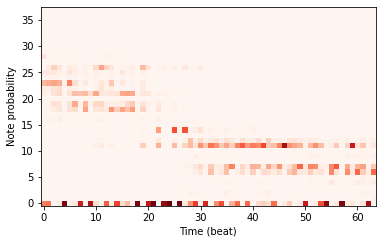

INFO:tensorflow:Priming with note 23
INFO:tensorflow:Generated sequence: [23, 0, 23, 0, 0, 26, 0, 23, 22, 0, 23, 18, 0, 0, 19, 23, 0, 21, 0, 18, 0, 18, 0, 23, 0, 22, 0, 11, 0, 18, 0, 14, 0, 16, 0, 18, 0, 11, 0, 9, 0, 7, 0, 7, 11, 6, 0, 11, 12, 7, 0, 11, 0, 6, 7, 11, 11, 0, 7, 11, 12, 0, 11, 12]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [23, 0, 23, 0, 0, 26, 0, 23, 22, 0, 23, 18, 0, 0, 19, 23, 0, 21, 0, 18, 0, 18, 0, 23, 0, 22, 0, 11, 0, 18, 0, 14, 0, 16, 0, 18, 0, 11, 0, 9, 0, 7, 0, 7, 11, 6, 0, 11, 12, 7, 0, 11, 0, 6, 7, 11, 11, 0, 7, 11, 12, 0, 11, 12]


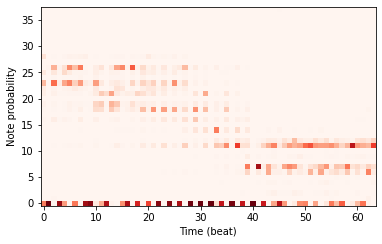

INFO:tensorflow:Priming with note 23
INFO:tensorflow:Generated sequence: [0, 23, 0, 23, 0, 26, 0, 23, 0, 23, 0, 16, 0, 18, 0, 0, 11, 0, 26, 0, 23, 0, 26, 0, 19, 23, 0, 23, 0, 23, 0, 1, 26, 0, 19, 26, 0, 19, 0, 18, 0, 11, 0, 19, 26, 0, 23, 18, 0, 0, 12, 0, 9, 0, 11, 14, 11, 12, 11, 7, 11, 11, 11, 0]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 23, 0, 23, 0, 26, 0, 23, 0, 23, 0, 16, 0, 18, 0, 0, 11, 0, 26, 0, 23, 0, 26, 0, 19, 23, 0, 23, 0, 23, 0, 1, 26, 0, 19, 26, 0, 19, 0, 18, 0, 11, 0, 19, 26, 0, 23, 18, 0, 0, 12, 0, 9, 0, 11, 14, 11, 12, 11, 7, 11, 11, 11, 0]


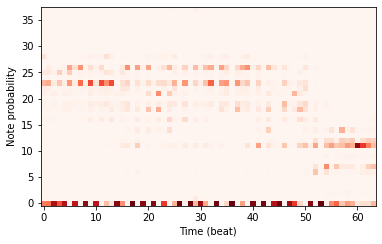

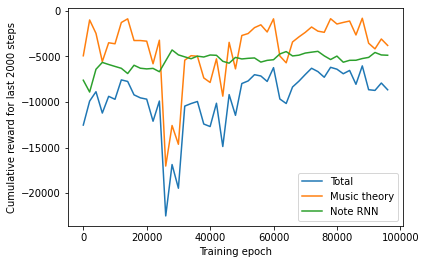

In [ ]:
training_steps = 100000
exploration_steps= 50000

rlt.train(num_steps=training_steps,
            exploration_period=exploration_steps)
for i in range (4):
  rlt.generate_music_sequence(visualize_probs=True, title='muitloco', length=64)
print('')
rlt.plot_rewards()

# Criando nova classe

In [ ]:
#rl_tuner_ops.default_dqn_hparams()

Foram criadas várias classes de interferência no código original e conduzido vários testes, identando classes para entendimento do resultado das interferências uma a uma e combinadas

In [ ]:
import magenta
import numpy as np

class myRLTuner (magenta.models.rl_tuner.rl_tuner.RLTuner):

  def collect_reward(self, obs, action, reward_scores):
    # Gets and saves log p(a|s) as output by reward_rnn.
    note_rnn_reward = self.reward_from_reward_rnn_scores(action, reward_scores)
    self.note_rnn_reward_last_n += note_rnn_reward
    rl_tuner_ops.DEFAULT_QPM = 50.0
    if self.reward_mode == 'tocar_no_tom':
      # Makes the model play within a key, while starting and ending on the
      # tonic note.
      reward = self.reward_key(action)
      reward += self.reward_scale(obs, action)
      reward += self.reward_tonic(action)
      reward += self.reward_preferred_intervals(action)

 
      return reward * self.reward_scaler + note_rnn_reward
    elif self.reward_mode == 'tom_forçado':
      # Makes the model play a scale (defaults to c major).
      reward = self.reward_scale(obs, action)
      reward += self.reward_key(action)
      reward += self.reward_tonic(action)
      #reward += self.reward_key_distribute_prob(action)
      self.music_theory_reward_last_n += reward * self.reward_scaler
      return reward * self.reward_scaler + note_rnn_reward

    elif self.reward_mode == 'edio':
      # Makes the model play a scale (defaults to c major).
      reward = self.reward_scale(obs, action)
      self.music_theory_reward_last_n += reward * self.reward_scaler
      return reward * self.reward_scaler + note_rnn_reward
    elif self.reward_mode=='non-repeating':
      reward = self.reward_not_repeating(obs,action)
      return reward * self.reward_scaler + note_rnn_reward

    else:
      return super().collect_reward(obs, action, reward_scores)

  # def reward_not_repeating(self, obs, action):
  #   obs = np.argmax(obs)
  #   action = np.argmax(action)
  #   if obs==action:
  #       reward=-.5
  #   else:
  #       reward=.5
  #   return reward
  # My_tom
  # def reward_scale(self, obs, action, scale=None):
  #   if scale is None:
  #     scale = rl_tuner_ops.C_MAJOR_SCALE
  #     # scale = [2, 4]
  #   obs = np.argmax(obs)
# exploration_steps= 5000

# rlt.train(num_steps=training_steps,
#             exploration_period=exploration_steps)
    # action = np.argmax(action)
    # reward = 0.5
    # #se a ação  for pausa
    # if action == 1:
    #   reward += .1
    # if obs < action < obs + 3:
    #   reward += .05

    # if action in scale:
    #   reward += .01
    #   if obs in scale:
    #     action_pos = scale.index(action)
    #     obs_pos = scale.index(obs)
    #     if obs_pos == len(scale) - 1 and action_pos == 0:
    #       reward += .8
    #     elif action_pos == obs_pos + 1:
    #       reward += .8

    # return reward

# classe para comparar
Alterando os nomes dos reward_mode podemos escolher os tipos de recompensa

In [ ]:
import magenta
import numpy as np

class myRLTuner (magenta.models.rl_tuner.rl_tuner.RLTuner):

  def collect_reward(self, obs, action, reward_scores):
    # Gets and saves log p(a|s) as output by reward_rnn.
    note_rnn_reward = self.reward_from_reward_rnn_scores(action, reward_scores)
    self.note_rnn_reward_last_n += note_rnn_reward

    if self.reward_mode == 'edio':
      # Makes the model play a scale (defaults to c major).
      reward = self.reward_scale(obs, action)
      self.music_theory_reward_last_n += reward * self.reward_scaler
      return reward * self.reward_scaler + note_rnn_reward
    elif self.reward_mode=='non-repeating':
      reward = self.reward_not_repeating(obs,action)
    elif self.reward_mode == 'meu_key_and_tonic':
      # Makes the model play within a key, while starting and ending on the
      # tonic note.
      reward = self.reward_key(action)
      reward += self.reward_tonic(action)
    else:
      return super().collect_reward(obs, action, reward_scores)

Foram feitos uma série de testes colocando diretamente  no collect_reward, alguns parecem estar corretos ,mas quando comparo com outras formas usando as mesmas funções dá discrepância , essas 3 funções ativas é o mesmo que music_theory_basic',mas qdo roda pelo nome, não funciona ,tentei refazer o reward mode colocando como argumento music_theory_basic tb não deu

obs este colab estou fazendo testes e modificando pode ser que não rode alguns, pq e rodava depois trocava parametros para outras experiências, não refiz do início

#Menor com original testes para o final com 100 mil iterações.As funções podem ser modificvadas e trmos resultados diferentes

In [ ]:
import numpy as np

# rl_tuner_ops.C_MAJOR_SCALE = [2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26]
# rl_tuner_ops.C_MAJOR_KEY = [0, 1, 2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26, 28,29,
#           29, 31, 33, 34, 36]
# rl_tuner_ops.THIRD = 3
# rl_tuner_ops.SEVENTH = 10
# rl_tuner_ops.SIXTH = 8
# rl_tuner_ops.DEFAULT_QPM = 65.0  
C_MAJOR_SCALE = [2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26]
C_MAJOR_KEY = [2, 4, 6, 9, 11, 14, 16, 18, 21, 23, 26, 28,
               30,33, 35]
# midi_primer = '/content/drive/MyDrive/a_TCC/Edio_Tcc_RlTuner/primer_c_minor.mid'
reward_scaler = 1.5

# class ModificaRLTuner(magenta.models.rl_tuner.rl_tuner.RLTuner):
#   def detect_sequential_interval(self, action, key=None):
#     NOTE_OFF = 0
#     NO_EVENT = 1
#     if not self.composition:
#       return 0, None, None

#     prev_note = self.composition[-1]
#     action_note = np.argmax(action)

#     c_major = False
#     if key is None:
#       key = rl_tuner_ops.C_MAJOR_KEY
#       c_notes = [2, 14, 26]
#       g_notes = [9, 21, 33]
#       e_notes = [5, 17, 29]
#       c_major = True
#       tonic_notes = [2, 14, 26]
#       fifth_notes = [9, 21, 33]

#     # get rid of non-notes in prev_note
#     prev_note_index = len(self.composition) - 1   
#     while prev_note in (NO_EVENT, NOTE_OFF) and prev_note_index >= 0:
#       prev_note = self.composition[prev_note_index]
#       prev_note_index -= 1
#     if prev_note in (NOTE_OFF, NO_EVENT):
#       tf.logging.debug('Action_note: %s, prev_note: %s', action_note, prev_note)
#       return 0, action_note, prev_note

#     tf.logging.debug('Action_note: %s, prev_note: %s', action_note, prev_note)

#     # get rid of non-notes in action_note
#     if action_note == NO_EVENT:
#       if prev_note in tonic_notes or prev_note in fifth_notes:
#         return (rl_tuner_ops.HOLD_INTERVAL_AFTER_THIRD_OR_FIFTH,
#                 action_note, prev_note)
#       else:
#         return rl_tuner_ops.HOLD_INTERVAL, action_note, prev_note
#     elif action_note == NOTE_OFF:
#       if prev_note in tonic_notes or prev_note in fifth_notes:
#         return (rl_tuner_ops.REST_INTERVAL_AFTER_THIRD_OR_FIFTH,
#                 action_note, prev_note)
#       else:
#         return rl_tuner_ops.REST_INTERVAL, action_note, prev_note

#     interval = abs(action_note - prev_note)

#     if c_major and interval == rl_tuner_ops.FIFTH and (
#         prev_note in c_notes or prev_note in g_notes):
#       return rl_tuner_ops.IN_KEY_FIFTH, action_note, prev_note
#     if c_major and interval == rl_t30uner_ops.THIRD and (
#         prev_note in c_notes or prev_note in e_notes):
#       return rl_tuner_ops.IN_KEY_THIRD, action_note, prev_note

#     return interval, action_note, prev_note
rlt = RLTuner(output_ckpt_dir,
                         midi_primer='/content/drive/MyDrive/a_TCC/Colab_final/exp_origen.mid',
                         priming_mode= 'single_midi',
                         reward_mode= 'music_theory_all',
                         dqn_hparams=dqn_hparams,
                         reward_scaler=1.0,
                         save_name=output_ckpt,
                         output_every_nth=output_every_nth,
                         note_rnn_checkpoint_dir=note_rnn_checkpoint_dir,
                         note_rnn_checkpoint_file=backup_checkpoint_file,
                         note_rnn_type=note_rnn_type,
                         note_rnn_hparams=hparams,
                         num_notes_in_melody=num_notes_in_melody,
                         exploration_mode=exploration_mode,
                         algorithm=algorithm,
                         training_file_list = training_file_list)
         


INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:[<tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:[<tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'target_q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing 


Successfully initialized internal nets from checkpoint!


INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-0.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-0.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-0.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-0.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 2000
INFO:tensorflow:	Reward for last 2000 steps: -11041.399802225598
INFO:tensorflow:		Music theory reward: -3683.679995792912
INFO:tensorflow:		Note RNN reward: -7357.719806432724


Training iteration 2000
	Reward for last 2000 steps: -11041.399802225598
		Music theory reward: -3683.679995792912
		Note RNN reward: -7357.719806432724


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-2000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-2000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-20000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-2000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-2000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 4000
INFO:tensorflow:	Reward for last 2000 steps: -7046.447288106188
INFO:tensorflow:		Music theory reward: 791.2381693618477
INFO:tensorflow:		Note RNN reward: -7837.685457468033


Training iteration 4000
	Reward for last 2000 steps: -7046.447288106188
		Music theory reward: 791.2381693618477
		Note RNN reward: -7837.685457468033


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-4000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-40000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-4000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-4000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-4000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 6000
INFO:tensorflow:	Reward for last 2000 steps: -4981.680486864778
INFO:tensorflow:		Music theory reward: 495.9465886881489
INFO:tensorflow:		Note RNN reward: -5477.62707555294


Training iteration 6000
	Reward for last 2000 steps: -4981.680486864778
		Music theory reward: 495.9465886881489
		Note RNN reward: -5477.62707555294


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-6000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-6000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-60000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-6000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-6000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 8000
INFO:tensorflow:	Reward for last 2000 steps: -5393.443156270852
INFO:tensorflow:		Music theory reward: 551.9575255824547
INFO:tensorflow:		Note RNN reward: -5945.400681853294


Training iteration 8000
	Reward for last 2000 steps: -5393.443156270852
		Music theory reward: 551.9575255824547
		Note RNN reward: -5945.400681853294


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-8000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-80000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-8000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 10000
INFO:tensorflow:	Reward for last 2000 steps: -6985.694483434213
INFO:tensorflow:		Music theory reward: -641.5149100175161
INFO:tensorflow:		Note RNN reward: -6344.17957341671


Training iteration 10000
	Reward for last 2000 steps: -6985.694483434213
		Music theory reward: -641.5149100175161
		Note RNN reward: -6344.17957341671


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-10000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-10000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-10000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 12000
INFO:tensorflow:	Reward for last 2000 steps: -8705.539085020397
INFO:tensorflow:		Music theory reward: -2499.445370306347
INFO:tensorflow:		Note RNN reward: -6206.09371471405


Training iteration 12000
	Reward for last 2000 steps: -8705.539085020397
		Music theory reward: -2499.445370306347
		Note RNN reward: -6206.09371471405


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-12000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-12000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-12000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-12000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 14000
INFO:tensorflow:	Reward for last 2000 steps: -8449.156690487973
INFO:tensorflow:		Music theory reward: -3655.7467873193
INFO:tensorflow:		Note RNN reward: -4793.409903168678


Training iteration 14000
	Reward for last 2000 steps: -8449.156690487973
		Music theory reward: -3655.7467873193
		Note RNN reward: -4793.409903168678


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-14000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-14000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-14000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-14000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 16000
INFO:tensorflow:	Reward for last 2000 steps: -7699.421319051207
INFO:tensorflow:		Music theory reward: -2742.3085420564867
INFO:tensorflow:		Note RNN reward: -4957.112776994705


Training iteration 16000
	Reward for last 2000 steps: -7699.421319051207
		Music theory reward: -2742.3085420564867
		Note RNN reward: -4957.112776994705


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-16000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-16000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-16000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-16000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 18000
INFO:tensorflow:	Reward for last 2000 steps: -7690.527706225917
INFO:tensorflow:		Music theory reward: -4109.963321527059
INFO:tensorflow:		Note RNN reward: -3580.564384698868


Training iteration 18000
	Reward for last 2000 steps: -7690.527706225917
		Music theory reward: -4109.963321527059
		Note RNN reward: -3580.564384698868


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-18000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-18000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-18000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-18000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-20000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 20000
INFO:tensorflow:	Reward for last 2000 steps: -7901.342767438407
INFO:tensorflow:		Music theory reward: -3538.23846836996
INFO:tensorflow:		Note RNN reward: -4363.104299068451


Training iteration 20000
	Reward for last 2000 steps: -7901.342767438407
		Music theory reward: -3538.23846836996
		Note RNN reward: -4363.104299068451


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-20000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-20000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-20000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-20000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-22000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 22000
INFO:tensorflow:	Reward for last 2000 steps: -4624.973618752719
INFO:tensorflow:		Music theory reward: 153.8784907986963
INFO:tensorflow:		Note RNN reward: -4778.85210955143


Training iteration 22000
	Reward for last 2000 steps: -4624.973618752719
		Music theory reward: 153.8784907986963
		Note RNN reward: -4778.85210955143


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-22000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-22000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-22000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-22000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-24000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 24000
INFO:tensorflow:	Reward for last 2000 steps: -4422.030081187123
INFO:tensorflow:		Music theory reward: 632.7825402871364
INFO:tensorflow:		Note RNN reward: -5054.812621474266


Training iteration 24000
	Reward for last 2000 steps: -4422.030081187123
		Music theory reward: 632.7825402871364
		Note RNN reward: -5054.812621474266


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-24000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-24000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-24000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-24000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-26000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 26000
INFO:tensorflow:	Reward for last 2000 steps: -7373.655806857406
INFO:tensorflow:		Music theory reward: -2936.627856332117
INFO:tensorflow:		Note RNN reward: -4437.027950525284


Training iteration 26000
	Reward for last 2000 steps: -7373.655806857406
		Music theory reward: -2936.627856332117
		Note RNN reward: -4437.027950525284


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-26000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-26000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-26000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-26000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-28000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 28000
INFO:tensorflow:	Reward for last 2000 steps: -7725.100236253198
INFO:tensorflow:		Music theory reward: -3803.2631922525725
INFO:tensorflow:		Note RNN reward: -3921.8370440006256


Training iteration 28000
	Reward for last 2000 steps: -7725.100236253198
		Music theory reward: -3803.2631922525725
		Note RNN reward: -3921.8370440006256


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-28000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-28000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-28000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-28000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-30000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 30000
INFO:tensorflow:	Reward for last 2000 steps: -4771.710067492596
INFO:tensorflow:		Music theory reward: -780.7013387499866
INFO:tensorflow:		Note RNN reward: -3991.0087287425995


Training iteration 30000
	Reward for last 2000 steps: -4771.710067492596
		Music theory reward: -780.7013387499866
		Note RNN reward: -3991.0087287425995


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-30000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-30000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-30000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-30000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-32000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 32000
INFO:tensorflow:	Reward for last 2000 steps: -6340.2943060058315
INFO:tensorflow:		Music theory reward: -2887.7090017455816
INFO:tensorflow:		Note RNN reward: -3452.585304260254


Training iteration 32000
	Reward for last 2000 steps: -6340.2943060058315
		Music theory reward: -2887.7090017455816
		Note RNN reward: -3452.585304260254


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-32000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-32000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-32000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-32000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-34000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 34000
INFO:tensorflow:	Reward for last 2000 steps: -10697.1991500113
INFO:tensorflow:		Music theory reward: -7068.502994582424
INFO:tensorflow:		Note RNN reward: -3628.6961554288864


Training iteration 34000
	Reward for last 2000 steps: -10697.1991500113
		Music theory reward: -7068.502994582424
		Note RNN reward: -3628.6961554288864


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-34000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-34000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-36000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 36000
INFO:tensorflow:	Reward for last 2000 steps: -7706.207242923657
INFO:tensorflow:		Music theory reward: -3876.4864886578644
INFO:tensorflow:		Note RNN reward: -3829.720754265785


Training iteration 36000
	Reward for last 2000 steps: -7706.207242923657
		Music theory reward: -3876.4864886578644
		Note RNN reward: -3829.720754265785


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-36000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-36000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-36000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-36000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-38000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 38000
INFO:tensorflow:	Reward for last 2000 steps: -5091.088915574135
INFO:tensorflow:		Music theory reward: 93.8172184352189
INFO:tensorflow:		Note RNN reward: -5184.906134009361


Training iteration 38000
	Reward for last 2000 steps: -5091.088915574135
		Music theory reward: 93.8172184352189
		Note RNN reward: -5184.906134009361


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-38000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-38000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-38000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-38000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-40000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 40000
INFO:tensorflow:	Reward for last 2000 steps: -5602.619507231434
INFO:tensorflow:		Music theory reward: -854.8990472933968
INFO:tensorflow:		Note RNN reward: -4747.720459938049


Training iteration 40000
	Reward for last 2000 steps: -5602.619507231434
		Music theory reward: -854.8990472933968
		Note RNN reward: -4747.720459938049


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-40000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-40000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-40000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-40000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-42000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 42000
INFO:tensorflow:	Reward for last 2000 steps: -4366.2480118515405
INFO:tensorflow:		Music theory reward: 357.9960620162581
INFO:tensorflow:		Note RNN reward: -4724.244073867798


Training iteration 42000
	Reward for last 2000 steps: -4366.2480118515405
		Music theory reward: 357.9960620162581
		Note RNN reward: -4724.244073867798


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-42000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-42000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-42000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-42000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-44000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 44000
INFO:tensorflow:	Reward for last 2000 steps: -5608.195360555624
INFO:tensorflow:		Music theory reward: -911.0481295728464
INFO:tensorflow:		Note RNN reward: -4697.1472309827805


Training iteration 44000
	Reward for last 2000 steps: -5608.195360555624
		Music theory reward: -911.0481295728464
		Note RNN reward: -4697.1472309827805


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-44000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-44000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-44000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-44000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-46000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 46000
INFO:tensorflow:	Reward for last 2000 steps: -5436.5291628420955
INFO:tensorflow:		Music theory reward: -546.9587705910882
INFO:tensorflow:		Note RNN reward: -4889.570392251015


Training iteration 46000
	Reward for last 2000 steps: -5436.5291628420955
		Music theory reward: -546.9587705910882
		Note RNN reward: -4889.570392251015


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-46000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-46000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-46000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-46000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-48000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 48000
INFO:tensorflow:	Reward for last 2000 steps: -4681.8370814054715
INFO:tensorflow:		Music theory reward: 278.25685932939143
INFO:tensorflow:		Note RNN reward: -4960.093940734863


Training iteration 48000
	Reward for last 2000 steps: -4681.8370814054715
		Music theory reward: 278.25685932939143
		Note RNN reward: -4960.093940734863


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-48000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-48000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-48000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-48000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-50000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 2000 steps: -5608.204597304447
INFO:tensorflow:		Music theory reward: -840.2687009078035
INFO:tensorflow:		Note RNN reward: -4767.935896396637


Training iteration 50000
	Reward for last 2000 steps: -5608.204597304447
		Music theory reward: -840.2687009078035
		Note RNN reward: -4767.935896396637


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-50000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-50000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-50000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-50000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-52000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 52000
INFO:tensorflow:	Reward for last 2000 steps: -5355.646055931722
INFO:tensorflow:		Music theory reward: -736.1541260430156
INFO:tensorflow:		Note RNN reward: -4619.491929888725


Training iteration 52000
	Reward for last 2000 steps: -5355.646055931722
		Music theory reward: -736.1541260430156
		Note RNN reward: -4619.491929888725


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-52000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-52000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-52000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-52000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-54000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 54000
INFO:tensorflow:	Reward for last 2000 steps: -5002.733744843286
INFO:tensorflow:		Music theory reward: -273.79897902753964
INFO:tensorflow:		Note RNN reward: -4728.934765815735


Training iteration 54000
	Reward for last 2000 steps: -5002.733744843286
		Music theory reward: -273.79897902753964
		Note RNN reward: -4728.934765815735


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-54000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-54000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-54000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-54000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-56000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 56000
INFO:tensorflow:	Reward for last 2000 steps: -4682.976007053283
INFO:tensorflow:		Music theory reward: -47.86100752058914
INFO:tensorflow:		Note RNN reward: -4635.1149995327


Training iteration 56000
	Reward for last 2000 steps: -4682.976007053283
		Music theory reward: -47.86100752058914
		Note RNN reward: -4635.1149995327


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-56000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-56000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-56000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-56000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-58000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 58000
INFO:tensorflow:	Reward for last 2000 steps: -4417.146518993671
INFO:tensorflow:		Music theory reward: 370.7194307562745
INFO:tensorflow:		Note RNN reward: -4787.865949749947


Training iteration 58000
	Reward for last 2000 steps: -4417.146518993671
		Music theory reward: 370.7194307562745
		Note RNN reward: -4787.865949749947


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-58000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-58000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-58000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-58000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-60000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 60000
INFO:tensorflow:	Reward for last 2000 steps: -3647.8734714949364
INFO:tensorflow:		Music theory reward: 1389.6747986113828
INFO:tensorflow:		Note RNN reward: -5037.548270106316


Training iteration 60000
	Reward for last 2000 steps: -3647.8734714949364
		Music theory reward: 1389.6747986113828
		Note RNN reward: -5037.548270106316


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-60000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-60000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-60000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-60000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-62000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 62000
INFO:tensorflow:	Reward for last 2000 steps: -5154.694130524769
INFO:tensorflow:		Music theory reward: -405.9297206250585
INFO:tensorflow:		Note RNN reward: -4748.764409899712


Training iteration 62000
	Reward for last 2000 steps: -5154.694130524769
		Music theory reward: -405.9297206250585
		Note RNN reward: -4748.764409899712


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-62000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-62000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-62000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-62000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-64000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 64000
INFO:tensorflow:	Reward for last 2000 steps: -4418.653812107393
INFO:tensorflow:		Music theory reward: 104.92107099598444
INFO:tensorflow:		Note RNN reward: -4523.574883103371


Training iteration 64000
	Reward for last 2000 steps: -4418.653812107393
		Music theory reward: 104.92107099598444
		Note RNN reward: -4523.574883103371


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-64000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-64000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-64000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-64000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-66000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 66000
INFO:tensorflow:	Reward for last 2000 steps: -4902.3578323528145
INFO:tensorflow:		Music theory reward: -207.86534063070013
INFO:tensorflow:		Note RNN reward: -4694.492491722107


Training iteration 66000
	Reward for last 2000 steps: -4902.3578323528145
		Music theory reward: -207.86534063070013
		Note RNN reward: -4694.492491722107


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-66000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-66000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-66000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-66000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-68000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 68000
INFO:tensorflow:	Reward for last 2000 steps: -5015.014200522122
INFO:tensorflow:		Music theory reward: -454.7684796587814
INFO:tensorflow:		Note RNN reward: -4560.245720863342


Training iteration 68000
	Reward for last 2000 steps: -5015.014200522122
		Music theory reward: -454.7684796587814
		Note RNN reward: -4560.245720863342


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-68000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-68000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-68000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-68000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-70000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 70000
INFO:tensorflow:	Reward for last 2000 steps: -5679.993924524886
INFO:tensorflow:		Music theory reward: -1455.299734022724
INFO:tensorflow:		Note RNN reward: -4224.694190502167


Training iteration 70000
	Reward for last 2000 steps: -5679.993924524886
		Music theory reward: -1455.299734022724
		Note RNN reward: -4224.694190502167


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-70000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-70000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-70000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-70000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-72000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 72000
INFO:tensorflow:	Reward for last 2000 steps: -7390.1845283012835
INFO:tensorflow:		Music theory reward: -3222.898738573131
INFO:tensorflow:		Note RNN reward: -4167.285789728165


Training iteration 72000
	Reward for last 2000 steps: -7390.1845283012835
		Music theory reward: -3222.898738573131
		Note RNN reward: -4167.285789728165


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-72000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-72000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-72000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-72000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-74000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 74000
INFO:tensorflow:	Reward for last 2000 steps: -5397.420098874912
INFO:tensorflow:		Music theory reward: -974.7126471737454
INFO:tensorflow:		Note RNN reward: -4422.707451701164


Training iteration 74000
	Reward for last 2000 steps: -5397.420098874912
		Music theory reward: -974.7126471737454
		Note RNN reward: -4422.707451701164


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-74000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-74000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-74000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-74000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-76000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 76000
INFO:tensorflow:	Reward for last 2000 steps: -5469.719843928608
INFO:tensorflow:		Music theory reward: -1001.0963088915681
INFO:tensorflow:		Note RNN reward: -4468.623535037041


Training iteration 76000
	Reward for last 2000 steps: -5469.719843928608
		Music theory reward: -1001.0963088915681
		Note RNN reward: -4468.623535037041


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-76000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-76000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-76000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-76000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-78000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 78000
INFO:tensorflow:	Reward for last 2000 steps: -5172.261010242203
INFO:tensorflow:		Music theory reward: -1048.966368509034
INFO:tensorflow:		Note RNN reward: -4123.29464173317


Training iteration 78000
	Reward for last 2000 steps: -5172.261010242203
		Music theory reward: -1048.966368509034
		Note RNN reward: -4123.29464173317


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-78000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-78000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-78000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-78000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-80000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 80000
INFO:tensorflow:	Reward for last 2000 steps: -5395.168610368801
INFO:tensorflow:		Music theory reward: -1483.9529589758577
INFO:tensorflow:		Note RNN reward: -3911.2156513929367


Training iteration 80000
	Reward for last 2000 steps: -5395.168610368801
		Music theory reward: -1483.9529589758577
		Note RNN reward: -3911.2156513929367


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-80000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-80000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-80000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-80000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-82000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 82000
INFO:tensorflow:	Reward for last 2000 steps: -6270.48327180044
INFO:tensorflow:		Music theory reward: -2416.2261768211742
INFO:tensorflow:		Note RNN reward: -3854.257094979286


Training iteration 82000
	Reward for last 2000 steps: -6270.48327180044
		Music theory reward: -2416.2261768211742
		Note RNN reward: -3854.257094979286


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-82000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-82000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-82000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-82000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-84000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 84000
INFO:tensorflow:	Reward for last 2000 steps: -6336.637292856532
INFO:tensorflow:		Music theory reward: -2271.941606873838
INFO:tensorflow:		Note RNN reward: -4064.695685982704


Training iteration 84000
	Reward for last 2000 steps: -6336.637292856532
		Music theory reward: -2271.941606873838
		Note RNN reward: -4064.695685982704


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-84000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-84000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-84000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-84000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-86000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 86000
INFO:tensorflow:	Reward for last 2000 steps: -5842.916578593728
INFO:tensorflow:		Music theory reward: -1594.356553378575
INFO:tensorflow:		Note RNN reward: -4248.560025215149


Training iteration 86000
	Reward for last 2000 steps: -5842.916578593728
		Music theory reward: -1594.356553378575
		Note RNN reward: -4248.560025215149


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-86000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-86000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-86000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-86000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-88000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 88000
INFO:tensorflow:	Reward for last 2000 steps: -6749.548231333623
INFO:tensorflow:		Music theory reward: -2174.4174776972595
INFO:tensorflow:		Note RNN reward: -4575.13075363636


Training iteration 88000
	Reward for last 2000 steps: -6749.548231333623
		Music theory reward: -2174.4174776972595
		Note RNN reward: -4575.13075363636


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-88000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-88000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-88000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-88000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-90000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 90000
INFO:tensorflow:	Reward for last 2000 steps: -6745.485387647762
INFO:tensorflow:		Music theory reward: -2358.3132389432285
INFO:tensorflow:		Note RNN reward: -4387.172148704529


Training iteration 90000
	Reward for last 2000 steps: -6745.485387647762
		Music theory reward: -2358.3132389432285
		Note RNN reward: -4387.172148704529


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-90000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-90000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-90000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-90000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-92000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 92000
INFO:tensorflow:	Reward for last 2000 steps: -5916.833507065573
INFO:tensorflow:		Music theory reward: -1417.135620360178
INFO:tensorflow:		Note RNN reward: -4499.697886705399


Training iteration 92000
	Reward for last 2000 steps: -5916.833507065573
		Music theory reward: -1417.135620360178
		Note RNN reward: -4499.697886705399


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-92000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-92000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-92000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-92000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-94000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 94000
INFO:tensorflow:	Reward for last 2000 steps: -5300.346403740821
INFO:tensorflow:		Music theory reward: -1387.909842037141
INFO:tensorflow:		Note RNN reward: -3912.436561703682


Training iteration 94000
	Reward for last 2000 steps: -5300.346403740821
		Music theory reward: -1387.909842037141
		Note RNN reward: -3912.436561703682


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-94000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-94000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-94000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-94000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-96000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 96000
INFO:tensorflow:	Reward for last 2000 steps: -8086.765029397918
INFO:tensorflow:		Music theory reward: -4317.988777605017
INFO:tensorflow:		Note RNN reward: -3768.7762517929077


Training iteration 96000
	Reward for last 2000 steps: -8086.765029397918
		Music theory reward: -4317.988777605017
		Note RNN reward: -3768.7762517929077


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-96000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-96000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-96000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-96000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-98000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 98000
INFO:tensorflow:	Reward for last 2000 steps: -7542.36263346638
INFO:tensorflow:		Music theory reward: -3813.603795408862
INFO:tensorflow:		Note RNN reward: -3728.758838057518


Training iteration 98000
	Reward for last 2000 steps: -7542.36263346638
		Music theory reward: -3813.603795408862
		Note RNN reward: -3728.758838057518


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-98000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-98000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-98000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-100000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-100000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-100000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 2000 steps: -10601.47225881542
INFO:tensorflow:		Music theory reward: -6661.164422044386
INFO:tensorflow:		Note RNN reward: -3940.3078367710114


Training iteration 100000
	Reward for last 2000 steps: -10601.47225881542
		Music theory reward: -6661.164422044386
		Note RNN reward: -3940.3078367710114


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-100000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-100000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-100000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-102000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-102000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-102000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 102000
INFO:tensorflow:	Reward for last 2000 steps: -7504.079725103478
INFO:tensorflow:		Music theory reward: -2548.650383668052
INFO:tensorflow:		Note RNN reward: -4955.429341435432


Training iteration 102000
	Reward for last 2000 steps: -7504.079725103478
		Music theory reward: -2548.650383668052
		Note RNN reward: -4955.429341435432


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-102000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-102000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-102000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-104000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-104000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-104000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 104000
INFO:tensorflow:	Reward for last 2000 steps: -10105.668691609928
INFO:tensorflow:		Music theory reward: -5443.7660271869345
INFO:tensorflow:		Note RNN reward: -4661.902664422989


Training iteration 104000
	Reward for last 2000 steps: -10105.668691609928
		Music theory reward: -5443.7660271869345
		Note RNN reward: -4661.902664422989


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-104000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-104000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-104000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-106000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-106000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-106000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 106000
INFO:tensorflow:	Reward for last 2000 steps: -7354.584802226638
INFO:tensorflow:		Music theory reward: -2427.095984415626
INFO:tensorflow:		Note RNN reward: -4927.488817811012


Training iteration 106000
	Reward for last 2000 steps: -7354.584802226638
		Music theory reward: -2427.095984415626
		Note RNN reward: -4927.488817811012


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-106000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-106000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-106000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-108000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-108000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-108000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 108000
INFO:tensorflow:	Reward for last 2000 steps: -7353.5020128361275
INFO:tensorflow:		Music theory reward: -2664.34398733296
INFO:tensorflow:		Note RNN reward: -4689.158025503159


Training iteration 108000
	Reward for last 2000 steps: -7353.5020128361275
		Music theory reward: -2664.34398733296
		Note RNN reward: -4689.158025503159


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-108000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-108000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-108000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-110000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-110000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-110000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 110000
INFO:tensorflow:	Reward for last 2000 steps: -6392.417107815901
INFO:tensorflow:		Music theory reward: -1347.6093734456524
INFO:tensorflow:		Note RNN reward: -5044.807734370232


Training iteration 110000
	Reward for last 2000 steps: -6392.417107815901
		Music theory reward: -1347.6093734456524
		Note RNN reward: -5044.807734370232


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-110000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-110000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-110000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-112000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-112000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-112000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 112000
INFO:tensorflow:	Reward for last 2000 steps: -5956.842016492685
INFO:tensorflow:		Music theory reward: -160.77102366526248
INFO:tensorflow:		Note RNN reward: -5796.0709928274155


Training iteration 112000
	Reward for last 2000 steps: -5956.842016492685
		Music theory reward: -160.77102366526248
		Note RNN reward: -5796.0709928274155


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-112000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-112000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-112000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-114000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-114000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-114000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 114000
INFO:tensorflow:	Reward for last 2000 steps: -5134.31654965229
INFO:tensorflow:		Music theory reward: 702.2133390968199
INFO:tensorflow:		Note RNN reward: -5836.529888749123


Training iteration 114000
	Reward for last 2000 steps: -5134.31654965229
		Music theory reward: 702.2133390968199
		Note RNN reward: -5836.529888749123


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-114000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-114000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-114000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-116000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-116000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-116000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 116000
INFO:tensorflow:	Reward for last 2000 steps: -5268.520388181755
INFO:tensorflow:		Music theory reward: 152.6257045907279
INFO:tensorflow:		Note RNN reward: -5421.146092772484


Training iteration 116000
	Reward for last 2000 steps: -5268.520388181755
		Music theory reward: 152.6257045907279
		Note RNN reward: -5421.146092772484


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-116000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-116000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-116000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-118000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-118000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-118000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 118000
INFO:tensorflow:	Reward for last 2000 steps: -7068.222942200649
INFO:tensorflow:		Music theory reward: -1934.7998575840106
INFO:tensorflow:		Note RNN reward: -5133.423084616661


Training iteration 118000
	Reward for last 2000 steps: -7068.222942200649
		Music theory reward: -1934.7998575840106
		Note RNN reward: -5133.423084616661


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-118000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-118000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-118000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-120000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-120000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-120000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 120000
INFO:tensorflow:	Reward for last 2000 steps: -5408.005592349168
INFO:tensorflow:		Music theory reward: -528.1163774758589
INFO:tensorflow:		Note RNN reward: -4879.889214873314


Training iteration 120000
	Reward for last 2000 steps: -5408.005592349168
		Music theory reward: -528.1163774758589
		Note RNN reward: -4879.889214873314


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-120000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-120000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-120000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-122000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-122000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-122000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 122000
INFO:tensorflow:	Reward for last 2000 steps: -6635.6528744291
INFO:tensorflow:		Music theory reward: -1356.3500741313749
INFO:tensorflow:		Note RNN reward: -5279.302800297737


Training iteration 122000
	Reward for last 2000 steps: -6635.6528744291
		Music theory reward: -1356.3500741313749
		Note RNN reward: -5279.302800297737


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-122000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-122000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-122000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-124000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-124000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-124000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 124000
INFO:tensorflow:	Reward for last 2000 steps: -6359.661760463863
INFO:tensorflow:		Music theory reward: -1358.61626400009
INFO:tensorflow:		Note RNN reward: -5001.045496463776


Training iteration 124000
	Reward for last 2000 steps: -6359.661760463863
		Music theory reward: -1358.61626400009
		Note RNN reward: -5001.045496463776


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-124000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-124000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-124000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-126000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-126000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-126000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 126000
INFO:tensorflow:	Reward for last 2000 steps: -6279.9595594079465
INFO:tensorflow:		Music theory reward: -582.1732252509605
INFO:tensorflow:		Note RNN reward: -5697.78633415699


Training iteration 126000
	Reward for last 2000 steps: -6279.9595594079465
		Music theory reward: -582.1732252509605
		Note RNN reward: -5697.78633415699


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-126000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-126000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-126000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-128000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-128000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-128000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 128000
INFO:tensorflow:	Reward for last 2000 steps: -6545.756385451433
INFO:tensorflow:		Music theory reward: -1862.4401185570953
INFO:tensorflow:		Note RNN reward: -4683.3162668943405


Training iteration 128000
	Reward for last 2000 steps: -6545.756385451433
		Music theory reward: -1862.4401185570953
		Note RNN reward: -4683.3162668943405


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-128000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-128000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-128000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-130000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-130000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-130000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 130000
INFO:tensorflow:	Reward for last 2000 steps: -5653.6503995221055
INFO:tensorflow:		Music theory reward: -201.85975928716306
INFO:tensorflow:		Note RNN reward: -5451.790640234947


Training iteration 130000
	Reward for last 2000 steps: -5653.6503995221055
		Music theory reward: -201.85975928716306
		Note RNN reward: -5451.790640234947


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-130000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-130000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-130000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-132000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-132000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-132000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 132000
INFO:tensorflow:	Reward for last 2000 steps: -7469.950561736797
INFO:tensorflow:		Music theory reward: -2347.1902265298263
INFO:tensorflow:		Note RNN reward: -5122.7603352069855


Training iteration 132000
	Reward for last 2000 steps: -7469.950561736797
		Music theory reward: -2347.1902265298263
		Note RNN reward: -5122.7603352069855


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-132000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-132000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-132000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-134000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-134000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-134000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 134000
INFO:tensorflow:	Reward for last 2000 steps: -8163.2962679415705
INFO:tensorflow:		Music theory reward: -3088.9009868651433
INFO:tensorflow:		Note RNN reward: -5074.395281076431


Training iteration 134000
	Reward for last 2000 steps: -8163.2962679415705
		Music theory reward: -3088.9009868651433
		Note RNN reward: -5074.395281076431


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-134000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-134000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-134000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-136000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-136000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-136000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 136000
INFO:tensorflow:	Reward for last 2000 steps: -10194.930489582714
INFO:tensorflow:		Music theory reward: -5045.040563745179
INFO:tensorflow:		Note RNN reward: -5149.889925837517


Training iteration 136000
	Reward for last 2000 steps: -10194.930489582714
		Music theory reward: -5045.040563745179
		Note RNN reward: -5149.889925837517


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-136000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-136000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-136000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-138000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-138000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-138000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 138000
INFO:tensorflow:	Reward for last 2000 steps: -9530.06338287925
INFO:tensorflow:		Music theory reward: -3968.641366497038
INFO:tensorflow:		Note RNN reward: -5561.422016382217


Training iteration 138000
	Reward for last 2000 steps: -9530.06338287925
		Music theory reward: -3968.641366497038
		Note RNN reward: -5561.422016382217


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-138000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-138000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-138000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-140000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-140000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-140000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 140000
INFO:tensorflow:	Reward for last 2000 steps: -8249.299260723992
INFO:tensorflow:		Music theory reward: -2702.4592149142595
INFO:tensorflow:		Note RNN reward: -5546.840045809746


Training iteration 140000
	Reward for last 2000 steps: -8249.299260723992
		Music theory reward: -2702.4592149142595
		Note RNN reward: -5546.840045809746


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-140000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-140000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-140000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-142000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-142000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-142000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 142000
INFO:tensorflow:	Reward for last 2000 steps: -6756.573002642182
INFO:tensorflow:		Music theory reward: -1353.4273286519242
INFO:tensorflow:		Note RNN reward: -5403.14567399025


Training iteration 142000
	Reward for last 2000 steps: -6756.573002642182
		Music theory reward: -1353.4273286519242
		Note RNN reward: -5403.14567399025


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-142000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-142000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-142000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-144000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-144000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-144000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 144000
INFO:tensorflow:	Reward for last 2000 steps: -7882.261695732196
INFO:tensorflow:		Music theory reward: -2608.1005728140804
INFO:tensorflow:		Note RNN reward: -5274.161122918129


Training iteration 144000
	Reward for last 2000 steps: -7882.261695732196
		Music theory reward: -2608.1005728140804
		Note RNN reward: -5274.161122918129


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-144000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-144000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-144000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-146000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-146000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-146000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 146000
INFO:tensorflow:	Reward for last 2000 steps: -13728.24583344249
INFO:tensorflow:		Music theory reward: -8773.668384597571
INFO:tensorflow:		Note RNN reward: -4954.57744884491


Training iteration 146000
	Reward for last 2000 steps: -13728.24583344249
		Music theory reward: -8773.668384597571
		Note RNN reward: -4954.57744884491


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-146000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-146000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-146000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-148000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-148000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-148000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 148000
INFO:tensorflow:	Reward for last 2000 steps: -8901.043548826818
INFO:tensorflow:		Music theory reward: -3759.456121091487
INFO:tensorflow:		Note RNN reward: -5141.587427735329


Training iteration 148000
	Reward for last 2000 steps: -8901.043548826818
		Music theory reward: -3759.456121091487
		Note RNN reward: -5141.587427735329


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-148000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-148000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-148000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-150000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-150000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-150000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 150000
INFO:tensorflow:	Reward for last 2000 steps: -6923.432862494018
INFO:tensorflow:		Music theory reward: -1685.5119455790966
INFO:tensorflow:		Note RNN reward: -5237.92091691494


Training iteration 150000
	Reward for last 2000 steps: -6923.432862494018
		Music theory reward: -1685.5119455790966
		Note RNN reward: -5237.92091691494


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-150000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-150000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-150000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-152000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-152000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-152000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 152000
INFO:tensorflow:	Reward for last 2000 steps: -7617.526286522306
INFO:tensorflow:		Music theory reward: -2089.121052543072
INFO:tensorflow:		Note RNN reward: -5528.405233979225


Training iteration 152000
	Reward for last 2000 steps: -7617.526286522306
		Music theory reward: -2089.121052543072
		Note RNN reward: -5528.405233979225


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-152000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-152000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-152000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-154000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-154000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-154000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 154000
INFO:tensorflow:	Reward for last 2000 steps: -6488.727177356052
INFO:tensorflow:		Music theory reward: -1008.7665071232964
INFO:tensorflow:		Note RNN reward: -5479.960670232773


Training iteration 154000
	Reward for last 2000 steps: -6488.727177356052
		Music theory reward: -1008.7665071232964
		Note RNN reward: -5479.960670232773


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-154000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-154000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-154000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-156000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-156000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-156000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 156000
INFO:tensorflow:	Reward for last 2000 steps: -5439.8981998314275
INFO:tensorflow:		Music theory reward: 210.88078388075368
INFO:tensorflow:		Note RNN reward: -5650.778983712196


Training iteration 156000
	Reward for last 2000 steps: -5439.8981998314275
		Music theory reward: 210.88078388075368
		Note RNN reward: -5650.778983712196


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-156000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-156000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-156000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-158000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-158000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-158000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 158000
INFO:tensorflow:	Reward for last 2000 steps: -7017.277632901823
INFO:tensorflow:		Music theory reward: -1011.9236957527773
INFO:tensorflow:		Note RNN reward: -6005.353937149048


Training iteration 158000
	Reward for last 2000 steps: -7017.277632901823
		Music theory reward: -1011.9236957527773
		Note RNN reward: -6005.353937149048


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-158000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-158000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-158000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-160000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-160000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-160000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 160000
INFO:tensorflow:	Reward for last 2000 steps: -6538.548755990543
INFO:tensorflow:		Music theory reward: -645.8886779418418
INFO:tensorflow:		Note RNN reward: -5892.660078048706


Training iteration 160000
	Reward for last 2000 steps: -6538.548755990543
		Music theory reward: -645.8886779418418
		Note RNN reward: -5892.660078048706


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-160000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-160000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-160000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-162000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-162000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-162000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 162000
INFO:tensorflow:	Reward for last 2000 steps: -4456.340968132141
INFO:tensorflow:		Music theory reward: 1104.6552135942923
INFO:tensorflow:		Note RNN reward: -5560.996181726456


Training iteration 162000
	Reward for last 2000 steps: -4456.340968132141
		Music theory reward: 1104.6552135942923
		Note RNN reward: -5560.996181726456


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-162000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-162000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-162000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-164000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-164000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-164000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 164000
INFO:tensorflow:	Reward for last 2000 steps: -4449.585460694505
INFO:tensorflow:		Music theory reward: 363.4069020431547
INFO:tensorflow:		Note RNN reward: -4812.992362737656


Training iteration 164000
	Reward for last 2000 steps: -4449.585460694505
		Music theory reward: 363.4069020431547
		Note RNN reward: -4812.992362737656


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-164000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-164000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-164000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-166000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-166000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-166000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 166000
INFO:tensorflow:	Reward for last 2000 steps: -1555.8617478117449
INFO:tensorflow:		Music theory reward: 3454.8909671798338
INFO:tensorflow:		Note RNN reward: -5010.7527149915695


Training iteration 166000
	Reward for last 2000 steps: -1555.8617478117449
		Music theory reward: 3454.8909671798338
		Note RNN reward: -5010.7527149915695


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-166000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-166000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-166000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-168000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-168000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-168000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 168000
INFO:tensorflow:	Reward for last 2000 steps: -2675.5430546723296
INFO:tensorflow:		Music theory reward: 2615.188185838616
INFO:tensorflow:		Note RNN reward: -5290.731240510941


Training iteration 168000
	Reward for last 2000 steps: -2675.5430546723296
		Music theory reward: 2615.188185838616
		Note RNN reward: -5290.731240510941


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-168000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-168000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-168000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-170000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-170000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-170000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 170000
INFO:tensorflow:	Reward for last 2000 steps: -5674.027305929009
INFO:tensorflow:		Music theory reward: -74.34241947347581
INFO:tensorflow:		Note RNN reward: -5599.684886455536


Training iteration 170000
	Reward for last 2000 steps: -5674.027305929009
		Music theory reward: -74.34241947347581
		Note RNN reward: -5599.684886455536


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-170000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-170000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-170000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-172000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-172000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-172000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 172000
INFO:tensorflow:	Reward for last 2000 steps: -2111.6621460539104
INFO:tensorflow:		Music theory reward: 3301.4731573241957
INFO:tensorflow:		Note RNN reward: -5413.135303378105


Training iteration 172000
	Reward for last 2000 steps: -2111.6621460539104
		Music theory reward: 3301.4731573241957
		Note RNN reward: -5413.135303378105


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-172000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-172000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-172000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-174000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-174000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-174000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 174000
INFO:tensorflow:	Reward for last 2000 steps: -3136.0255780021535
INFO:tensorflow:		Music theory reward: 2516.098614474121
INFO:tensorflow:		Note RNN reward: -5652.124192476273


Training iteration 174000
	Reward for last 2000 steps: -3136.0255780021535
		Music theory reward: 2516.098614474121
		Note RNN reward: -5652.124192476273


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-174000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-174000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-174000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-176000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-176000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-176000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 176000
INFO:tensorflow:	Reward for last 2000 steps: -5398.33361523945
INFO:tensorflow:		Music theory reward: 219.27737027804412
INFO:tensorflow:		Note RNN reward: -5617.610985517502


Training iteration 176000
	Reward for last 2000 steps: -5398.33361523945
		Music theory reward: 219.27737027804412
		Note RNN reward: -5617.610985517502


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-176000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-176000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-176000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-178000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-178000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-178000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 178000
INFO:tensorflow:	Reward for last 2000 steps: -2521.0043271021495
INFO:tensorflow:		Music theory reward: 2756.6787354512567
INFO:tensorflow:		Note RNN reward: -5277.683062553406


Training iteration 178000
	Reward for last 2000 steps: -2521.0043271021495
		Music theory reward: 2756.6787354512567
		Note RNN reward: -5277.683062553406


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-178000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-178000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-178000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-180000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-180000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-180000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 180000
INFO:tensorflow:	Reward for last 2000 steps: -3601.8846830868265
INFO:tensorflow:		Music theory reward: 1856.8227694488019
INFO:tensorflow:		Note RNN reward: -5458.707452535629


Training iteration 180000
	Reward for last 2000 steps: -3601.8846830868265
		Music theory reward: 1856.8227694488019
		Note RNN reward: -5458.707452535629


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-180000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-180000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-180000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-182000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-182000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-182000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 182000
INFO:tensorflow:	Reward for last 2000 steps: -5106.041248443572
INFO:tensorflow:		Music theory reward: 985.6178576917875
INFO:tensorflow:		Note RNN reward: -6091.659106135368


Training iteration 182000
	Reward for last 2000 steps: -5106.041248443572
		Music theory reward: 985.6178576917875
		Note RNN reward: -6091.659106135368


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-182000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-182000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-182000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-184000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-184000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-184000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 184000
INFO:tensorflow:	Reward for last 2000 steps: -6110.100554381014
INFO:tensorflow:		Music theory reward: -428.67631009638416
INFO:tensorflow:		Note RNN reward: -5681.42424428463


Training iteration 184000
	Reward for last 2000 steps: -6110.100554381014
		Music theory reward: -428.67631009638416
		Note RNN reward: -5681.42424428463


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-184000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-184000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-184000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-186000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-186000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-186000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 186000
INFO:tensorflow:	Reward for last 2000 steps: -3683.223063116397
INFO:tensorflow:		Music theory reward: 1549.5257884213047
INFO:tensorflow:		Note RNN reward: -5232.7488515377045


Training iteration 186000
	Reward for last 2000 steps: -3683.223063116397
		Music theory reward: 1549.5257884213047
		Note RNN reward: -5232.7488515377045


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-186000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-186000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-186000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-188000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-188000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-188000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 188000
INFO:tensorflow:	Reward for last 2000 steps: -7157.333425368416
INFO:tensorflow:		Music theory reward: -1770.309168304548
INFO:tensorflow:		Note RNN reward: -5387.024257063866


Training iteration 188000
	Reward for last 2000 steps: -7157.333425368416
		Music theory reward: -1770.309168304548
		Note RNN reward: -5387.024257063866


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-188000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-188000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-188000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-190000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-190000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-190000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 190000
INFO:tensorflow:	Reward for last 2000 steps: -2568.7217269304606
INFO:tensorflow:		Music theory reward: 2819.370205962345
INFO:tensorflow:		Note RNN reward: -5388.091932892799


Training iteration 190000
	Reward for last 2000 steps: -2568.7217269304606
		Music theory reward: 2819.370205962345
		Note RNN reward: -5388.091932892799


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-190000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-190000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-190000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-192000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-192000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-192000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 192000
INFO:tensorflow:	Reward for last 2000 steps: -4298.644127424875
INFO:tensorflow:		Music theory reward: 1002.938013616887
INFO:tensorflow:		Note RNN reward: -5301.582141041756


Training iteration 192000
	Reward for last 2000 steps: -4298.644127424875
		Music theory reward: 1002.938013616887
		Note RNN reward: -5301.582141041756


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-192000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-192000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-192000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-194000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-194000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-194000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 194000
INFO:tensorflow:	Reward for last 2000 steps: -4344.2806570615785
INFO:tensorflow:		Music theory reward: 1099.1455353412623
INFO:tensorflow:		Note RNN reward: -5443.42619240284


Training iteration 194000
	Reward for last 2000 steps: -4344.2806570615785
		Music theory reward: 1099.1455353412623
		Note RNN reward: -5443.42619240284


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-194000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-194000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-194000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-196000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-196000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-196000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 196000
INFO:tensorflow:	Reward for last 2000 steps: -5273.581886694871
INFO:tensorflow:		Music theory reward: -14.876484797443062
INFO:tensorflow:		Note RNN reward: -5258.70540189743


Training iteration 196000
	Reward for last 2000 steps: -5273.581886694871
		Music theory reward: -14.876484797443062
		Note RNN reward: -5258.70540189743


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-196000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-196000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-196000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-198000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-198000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-198000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 198000
INFO:tensorflow:	Reward for last 2000 steps: -4125.409194504439
INFO:tensorflow:		Music theory reward: 1407.210969413099
INFO:tensorflow:		Note RNN reward: -5532.6201639175415


Training iteration 198000
	Reward for last 2000 steps: -4125.409194504439
		Music theory reward: 1407.210969413099
		Note RNN reward: -5532.6201639175415


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-198000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-198000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-198000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-200000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-200000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-200000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 200000
INFO:tensorflow:	Reward for last 2000 steps: -5684.73958941321
INFO:tensorflow:		Music theory reward: -484.5763640008407
INFO:tensorflow:		Note RNN reward: -5200.163225412369


Training iteration 200000
	Reward for last 2000 steps: -5684.73958941321
		Music theory reward: -484.5763640008407
		Note RNN reward: -5200.163225412369


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-200000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-200000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-200000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-202000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-202000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-202000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 202000
INFO:tensorflow:	Reward for last 2000 steps: -5317.754978450143
INFO:tensorflow:		Music theory reward: 446.3263932148454
INFO:tensorflow:		Note RNN reward: -5764.081371665001


Training iteration 202000
	Reward for last 2000 steps: -5317.754978450143
		Music theory reward: 446.3263932148454
		Note RNN reward: -5764.081371665001


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-202000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-202000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-202000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-204000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-204000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-204000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 204000
INFO:tensorflow:	Reward for last 2000 steps: -3257.7161501105334
INFO:tensorflow:		Music theory reward: 2332.896116787622
INFO:tensorflow:		Note RNN reward: -5590.612266898155


Training iteration 204000
	Reward for last 2000 steps: -3257.7161501105334
		Music theory reward: 2332.896116787622
		Note RNN reward: -5590.612266898155


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-204000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-204000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-204000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-206000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-206000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-206000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 206000
INFO:tensorflow:	Reward for last 2000 steps: -3278.368643962583
INFO:tensorflow:		Music theory reward: 2551.686918891231
INFO:tensorflow:		Note RNN reward: -5830.055562853813


Training iteration 206000
	Reward for last 2000 steps: -3278.368643962583
		Music theory reward: 2551.686918891231
		Note RNN reward: -5830.055562853813


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-206000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-206000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-206000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-208000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-208000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-208000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 208000
INFO:tensorflow:	Reward for last 2000 steps: -2255.76461477621
INFO:tensorflow:		Music theory reward: 3192.0962607111196
INFO:tensorflow:		Note RNN reward: -5447.860875487328


Training iteration 208000
	Reward for last 2000 steps: -2255.76461477621
		Music theory reward: 3192.0962607111196
		Note RNN reward: -5447.860875487328


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-208000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-208000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-208000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-210000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-210000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-210000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 210000
INFO:tensorflow:	Reward for last 2000 steps: -1369.863630945222
INFO:tensorflow:		Music theory reward: 4094.4734956674492
INFO:tensorflow:		Note RNN reward: -5464.337126612663


Training iteration 210000
	Reward for last 2000 steps: -1369.863630945222
		Music theory reward: 4094.4734956674492
		Note RNN reward: -5464.337126612663


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-210000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-210000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-210000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-212000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-212000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-212000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 212000
INFO:tensorflow:	Reward for last 2000 steps: -2985.4151719908587
INFO:tensorflow:		Music theory reward: 2617.768514265549
INFO:tensorflow:		Note RNN reward: -5603.183686256409


Training iteration 212000
	Reward for last 2000 steps: -2985.4151719908587
		Music theory reward: 2617.768514265549
		Note RNN reward: -5603.183686256409


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-212000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-212000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-212000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-214000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-214000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-214000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 214000
INFO:tensorflow:	Reward for last 2000 steps: -4006.239624920547
INFO:tensorflow:		Music theory reward: 1644.7481213181582
INFO:tensorflow:		Note RNN reward: -5650.9877462387085


Training iteration 214000
	Reward for last 2000 steps: -4006.239624920547
		Music theory reward: 1644.7481213181582
		Note RNN reward: -5650.9877462387085


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-214000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-214000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-214000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-216000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-216000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-216000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 216000
INFO:tensorflow:	Reward for last 2000 steps: -2961.456330670282
INFO:tensorflow:		Music theory reward: 2493.073215471345
INFO:tensorflow:		Note RNN reward: -5454.529546141624


Training iteration 216000
	Reward for last 2000 steps: -2961.456330670282
		Music theory reward: 2493.073215471345
		Note RNN reward: -5454.529546141624


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-216000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-216000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-216000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-218000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-218000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-218000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 218000
INFO:tensorflow:	Reward for last 2000 steps: -2687.708701873043
INFO:tensorflow:		Music theory reward: 3306.1051873920146
INFO:tensorflow:		Note RNN reward: -5993.81388926506


Training iteration 218000
	Reward for last 2000 steps: -2687.708701873043
		Music theory reward: 3306.1051873920146
		Note RNN reward: -5993.81388926506


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-218000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-218000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-218000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-220000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-220000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-220000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 220000
INFO:tensorflow:	Reward for last 2000 steps: -1861.5908575507403
INFO:tensorflow:		Music theory reward: 3694.7585035113116
INFO:tensorflow:		Note RNN reward: -5556.34936106205


Training iteration 220000
	Reward for last 2000 steps: -1861.5908575507403
		Music theory reward: 3694.7585035113116
		Note RNN reward: -5556.34936106205


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-220000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-220000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-220000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-222000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-222000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-222000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 222000
INFO:tensorflow:	Reward for last 2000 steps: -1449.8504874528985
INFO:tensorflow:		Music theory reward: 3705.1597888646925
INFO:tensorflow:		Note RNN reward: -5155.010276317596


Training iteration 222000
	Reward for last 2000 steps: -1449.8504874528985
		Music theory reward: 3705.1597888646925
		Note RNN reward: -5155.010276317596


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-222000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-222000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-222000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-224000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-224000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-224000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 224000
INFO:tensorflow:	Reward for last 2000 steps: -3535.531011355174
INFO:tensorflow:		Music theory reward: 2430.4288323995925
INFO:tensorflow:		Note RNN reward: -5965.959843754768


Training iteration 224000
	Reward for last 2000 steps: -3535.531011355174
		Music theory reward: 2430.4288323995925
		Note RNN reward: -5965.959843754768


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-224000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-224000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-224000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-226000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-226000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-226000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 226000
INFO:tensorflow:	Reward for last 2000 steps: -6007.544510299202
INFO:tensorflow:		Music theory reward: -313.1452298703139
INFO:tensorflow:		Note RNN reward: -5694.399280428886


Training iteration 226000
	Reward for last 2000 steps: -6007.544510299202
		Music theory reward: -313.1452298703139
		Note RNN reward: -5694.399280428886


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-226000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-226000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-226000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-228000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-228000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-228000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 228000
INFO:tensorflow:	Reward for last 2000 steps: -6283.564126880612
INFO:tensorflow:		Music theory reward: -248.8671900348447
INFO:tensorflow:		Note RNN reward: -6034.696936845779


Training iteration 228000
	Reward for last 2000 steps: -6283.564126880612
		Music theory reward: -248.8671900348447
		Note RNN reward: -6034.696936845779


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-228000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-228000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-228000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-230000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-230000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-230000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 230000
INFO:tensorflow:	Reward for last 2000 steps: -5908.670397202683
INFO:tensorflow:		Music theory reward: -55.86770908089401
INFO:tensorflow:		Note RNN reward: -5852.802688121796


Training iteration 230000
	Reward for last 2000 steps: -5908.670397202683
		Music theory reward: -55.86770908089401
		Note RNN reward: -5852.802688121796


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-230000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-230000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-230000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-232000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-232000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-232000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 232000
INFO:tensorflow:	Reward for last 2000 steps: -6711.0754523115975
INFO:tensorflow:		Music theory reward: -757.2836956816468
INFO:tensorflow:		Note RNN reward: -5953.791756629944


Training iteration 232000
	Reward for last 2000 steps: -6711.0754523115975
		Music theory reward: -757.2836956816468
		Note RNN reward: -5953.791756629944


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-232000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-232000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-232000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-234000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-234000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-234000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 234000
INFO:tensorflow:	Reward for last 2000 steps: -6356.356598065966
INFO:tensorflow:		Music theory reward: -97.45160190927186
INFO:tensorflow:		Note RNN reward: -6258.9049961566925


Training iteration 234000
	Reward for last 2000 steps: -6356.356598065966
		Music theory reward: -97.45160190927186
		Note RNN reward: -6258.9049961566925


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-234000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-234000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-234000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-236000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-236000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-236000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 236000
INFO:tensorflow:	Reward for last 2000 steps: -7625.4601587727675
INFO:tensorflow:		Music theory reward: -1508.7113668397078
INFO:tensorflow:		Note RNN reward: -6116.74879193306


Training iteration 236000
	Reward for last 2000 steps: -7625.4601587727675
		Music theory reward: -1508.7113668397078
		Note RNN reward: -6116.74879193306


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-236000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-236000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-236000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-238000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-238000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-238000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 238000
INFO:tensorflow:	Reward for last 2000 steps: -7267.458119941607
INFO:tensorflow:		Music theory reward: -1560.974730325595
INFO:tensorflow:		Note RNN reward: -5706.483389616013


Training iteration 238000
	Reward for last 2000 steps: -7267.458119941607
		Music theory reward: -1560.974730325595
		Note RNN reward: -5706.483389616013


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-238000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-238000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-238000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-240000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-240000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-240000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 240000
INFO:tensorflow:	Reward for last 2000 steps: -5916.919431275887
INFO:tensorflow:		Music theory reward: -561.0007072158343
INFO:tensorflow:		Note RNN reward: -5355.918724060059


Training iteration 240000
	Reward for last 2000 steps: -5916.919431275887
		Music theory reward: -561.0007072158343
		Note RNN reward: -5355.918724060059


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-240000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-240000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-240000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-242000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-242000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-242000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 242000
INFO:tensorflow:	Reward for last 2000 steps: -5999.1235189262725
INFO:tensorflow:		Music theory reward: 247.06593157612238
INFO:tensorflow:		Note RNN reward: -6246.189450502396


Training iteration 242000
	Reward for last 2000 steps: -5999.1235189262725
		Music theory reward: 247.06593157612238
		Note RNN reward: -6246.189450502396


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-242000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-242000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-242000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-244000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-244000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-244000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 244000
INFO:tensorflow:	Reward for last 2000 steps: -6308.764590351183
INFO:tensorflow:		Music theory reward: 395.0047023610308
INFO:tensorflow:		Note RNN reward: -6703.769292712212


Training iteration 244000
	Reward for last 2000 steps: -6308.764590351183
		Music theory reward: 395.0047023610308
		Note RNN reward: -6703.769292712212


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-244000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-244000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-244000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-246000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-246000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-246000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 246000
INFO:tensorflow:	Reward for last 2000 steps: -5961.740746120602
INFO:tensorflow:		Music theory reward: 297.33606257042385
INFO:tensorflow:		Note RNN reward: -6259.076808691025


Training iteration 246000
	Reward for last 2000 steps: -5961.740746120602
		Music theory reward: 297.33606257042385
		Note RNN reward: -6259.076808691025


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-246000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-246000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-246000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-248000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-248000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-248000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 248000
INFO:tensorflow:	Reward for last 2000 steps: -4841.335886238965
INFO:tensorflow:		Music theory reward: 1484.456146002845
INFO:tensorflow:		Note RNN reward: -6325.792032241821


Training iteration 248000
	Reward for last 2000 steps: -4841.335886238965
		Music theory reward: 1484.456146002845
		Note RNN reward: -6325.792032241821


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-248000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-248000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-248000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-250000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-250000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-250000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 250000
INFO:tensorflow:	Reward for last 2000 steps: -5066.06713089655
INFO:tensorflow:		Music theory reward: 688.9945470361774
INFO:tensorflow:		Note RNN reward: -5755.061677932739


Training iteration 250000
	Reward for last 2000 steps: -5066.06713089655
		Music theory reward: 688.9945470361774
		Note RNN reward: -5755.061677932739


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-250000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-250000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-250000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-252000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-252000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-252000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 252000
INFO:tensorflow:	Reward for last 2000 steps: -2346.644254427642
INFO:tensorflow:		Music theory reward: 3155.538940209663
INFO:tensorflow:		Note RNN reward: -5502.183194637299


Training iteration 252000
	Reward for last 2000 steps: -2346.644254427642
		Music theory reward: 3155.538940209663
		Note RNN reward: -5502.183194637299


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-252000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-252000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-252000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-254000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-254000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-254000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 254000
INFO:tensorflow:	Reward for last 2000 steps: -2052.8200340736416
INFO:tensorflow:		Music theory reward: 3214.3256816398557
INFO:tensorflow:		Note RNN reward: -5267.145715713501


Training iteration 254000
	Reward for last 2000 steps: -2052.8200340736416
		Music theory reward: 3214.3256816398557
		Note RNN reward: -5267.145715713501


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-254000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-254000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-254000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-256000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-256000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-256000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 256000
INFO:tensorflow:	Reward for last 2000 steps: -4095.334902259985
INFO:tensorflow:		Music theory reward: 1127.3708232906642
INFO:tensorflow:		Note RNN reward: -5222.705725550652


Training iteration 256000
	Reward for last 2000 steps: -4095.334902259985
		Music theory reward: 1127.3708232906642
		Note RNN reward: -5222.705725550652


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-256000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-256000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-256000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-258000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-258000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-258000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 258000
INFO:tensorflow:	Reward for last 2000 steps: -3324.302117341099
INFO:tensorflow:		Music theory reward: 1833.6476469106024
INFO:tensorflow:		Note RNN reward: -5157.949764251709


Training iteration 258000
	Reward for last 2000 steps: -3324.302117341099
		Music theory reward: 1833.6476469106024
		Note RNN reward: -5157.949764251709


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-258000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-258000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-258000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-260000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-260000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-260000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 260000
INFO:tensorflow:	Reward for last 2000 steps: -2138.9391851632254
INFO:tensorflow:		Music theory reward: 3119.539033749854
INFO:tensorflow:		Note RNN reward: -5258.478218913078


Training iteration 260000
	Reward for last 2000 steps: -2138.9391851632254
		Music theory reward: 3119.539033749854
		Note RNN reward: -5258.478218913078


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-260000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-260000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-260000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-262000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-262000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-262000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 262000
INFO:tensorflow:	Reward for last 2000 steps: -2339.4389203147557
INFO:tensorflow:		Music theory reward: 3121.903668586764
INFO:tensorflow:		Note RNN reward: -5461.34258890152


Training iteration 262000
	Reward for last 2000 steps: -2339.4389203147557
		Music theory reward: 3121.903668586764
		Note RNN reward: -5461.34258890152


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-262000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-262000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-262000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-264000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-264000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-264000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 264000
INFO:tensorflow:	Reward for last 2000 steps: -2792.6923187346174
INFO:tensorflow:		Music theory reward: 2503.856071534662
INFO:tensorflow:		Note RNN reward: -5296.5483902692795


Training iteration 264000
	Reward for last 2000 steps: -2792.6923187346174
		Music theory reward: 2503.856071534662
		Note RNN reward: -5296.5483902692795


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-264000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-264000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-264000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-266000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-266000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-266000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 266000
INFO:tensorflow:	Reward for last 2000 steps: -3790.1884908408747
INFO:tensorflow:		Music theory reward: 1623.3643099337041
INFO:tensorflow:		Note RNN reward: -5413.552800774574


Training iteration 266000
	Reward for last 2000 steps: -3790.1884908408747
		Music theory reward: 1623.3643099337041
		Note RNN reward: -5413.552800774574


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-266000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-266000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-266000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-268000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-268000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-268000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 268000
INFO:tensorflow:	Reward for last 2000 steps: -4723.106704710405
INFO:tensorflow:		Music theory reward: 154.4283387675999
INFO:tensorflow:		Note RNN reward: -4877.535043478012


Training iteration 268000
	Reward for last 2000 steps: -4723.106704710405
		Music theory reward: 154.4283387675999
		Note RNN reward: -4877.535043478012


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-268000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-268000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-268000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-270000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-270000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-270000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 270000
INFO:tensorflow:	Reward for last 2000 steps: -4357.235883364521
INFO:tensorflow:		Music theory reward: 662.4742517377466
INFO:tensorflow:		Note RNN reward: -5019.710135102272


Training iteration 270000
	Reward for last 2000 steps: -4357.235883364521
		Music theory reward: 662.4742517377466
		Note RNN reward: -5019.710135102272


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-270000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-270000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-270000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-272000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-272000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-272000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 272000
INFO:tensorflow:	Reward for last 2000 steps: -5268.194158465585
INFO:tensorflow:		Music theory reward: -208.85941973420657
INFO:tensorflow:		Note RNN reward: -5059.334738731384


Training iteration 272000
	Reward for last 2000 steps: -5268.194158465585
		Music theory reward: -208.85941973420657
		Note RNN reward: -5059.334738731384


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-272000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-272000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-272000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-274000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-274000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-274000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 274000
INFO:tensorflow:	Reward for last 2000 steps: -5486.522393954928
INFO:tensorflow:		Music theory reward: -748.2437251936717
INFO:tensorflow:		Note RNN reward: -4738.278668761253


Training iteration 274000
	Reward for last 2000 steps: -5486.522393954928
		Music theory reward: -748.2437251936717
		Note RNN reward: -4738.278668761253


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-274000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-274000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-274000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-276000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-276000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-276000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 276000
INFO:tensorflow:	Reward for last 2000 steps: -5503.432658663598
INFO:tensorflow:		Music theory reward: -485.62185203156423
INFO:tensorflow:		Note RNN reward: -5017.810806632042


Training iteration 276000
	Reward for last 2000 steps: -5503.432658663598
		Music theory reward: -485.62185203156423
		Note RNN reward: -5017.810806632042


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-276000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-276000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-276000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-278000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-278000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-278000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 278000
INFO:tensorflow:	Reward for last 2000 steps: -5121.108244630414
INFO:tensorflow:		Music theory reward: 158.0861916812976
INFO:tensorflow:		Note RNN reward: -5279.194436311722


Training iteration 278000
	Reward for last 2000 steps: -5121.108244630414
		Music theory reward: 158.0861916812976
		Note RNN reward: -5279.194436311722


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-278000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-278000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-278000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-280000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-280000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-280000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 280000
INFO:tensorflow:	Reward for last 2000 steps: -4999.649320886842
INFO:tensorflow:		Music theory reward: -12.17697517705385
INFO:tensorflow:		Note RNN reward: -4987.472345709801


Training iteration 280000
	Reward for last 2000 steps: -4999.649320886842
		Music theory reward: -12.17697517705385
		Note RNN reward: -4987.472345709801


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-280000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-280000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-280000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-282000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-282000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-282000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 282000
INFO:tensorflow:	Reward for last 2000 steps: -4838.429465125335
INFO:tensorflow:		Music theory reward: 645.5153569476421
INFO:tensorflow:		Note RNN reward: -5483.944822072983


Training iteration 282000
	Reward for last 2000 steps: -4838.429465125335
		Music theory reward: 645.5153569476421
		Note RNN reward: -5483.944822072983


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-282000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-282000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-282000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-284000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-284000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-284000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 284000
INFO:tensorflow:	Reward for last 2000 steps: -4090.6359797960145
INFO:tensorflow:		Music theory reward: 1316.2174205536057
INFO:tensorflow:		Note RNN reward: -5406.853400349617


Training iteration 284000
	Reward for last 2000 steps: -4090.6359797960145
		Music theory reward: 1316.2174205536057
		Note RNN reward: -5406.853400349617


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-284000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-284000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-284000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-286000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-286000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-286000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 286000
INFO:tensorflow:	Reward for last 2000 steps: -4155.170692604981
INFO:tensorflow:		Music theory reward: 957.554616170919
INFO:tensorflow:		Note RNN reward: -5112.725308775902


Training iteration 286000
	Reward for last 2000 steps: -4155.170692604981
		Music theory reward: 957.554616170919
		Note RNN reward: -5112.725308775902


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-286000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-286000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-286000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-288000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-288000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-288000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 288000
INFO:tensorflow:	Reward for last 2000 steps: -4098.916404962977
INFO:tensorflow:		Music theory reward: 1111.1251891847035
INFO:tensorflow:		Note RNN reward: -5210.041594147682


Training iteration 288000
	Reward for last 2000 steps: -4098.916404962977
		Music theory reward: 1111.1251891847035
		Note RNN reward: -5210.041594147682


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-288000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-288000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-288000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-290000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-290000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-290000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 290000
INFO:tensorflow:	Reward for last 2000 steps: -3279.4991669807755
INFO:tensorflow:		Music theory reward: 2129.030779704059
INFO:tensorflow:		Note RNN reward: -5408.529946684837


Training iteration 290000
	Reward for last 2000 steps: -3279.4991669807755
		Music theory reward: 2129.030779704059
		Note RNN reward: -5408.529946684837


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-290000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-290000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-290000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-292000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-292000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-292000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 292000
INFO:tensorflow:	Reward for last 2000 steps: -3212.2477798600507
INFO:tensorflow:		Music theory reward: 2267.4921319346067
INFO:tensorflow:		Note RNN reward: -5479.7399117946625


Training iteration 292000
	Reward for last 2000 steps: -3212.2477798600507
		Music theory reward: 2267.4921319346067
		Note RNN reward: -5479.7399117946625


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-292000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-292000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-292000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-294000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-294000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-294000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 294000
INFO:tensorflow:	Reward for last 2000 steps: -3946.590658759085
INFO:tensorflow:		Music theory reward: 1582.9044239769314
INFO:tensorflow:		Note RNN reward: -5529.495082736015


Training iteration 294000
	Reward for last 2000 steps: -3946.590658759085
		Music theory reward: 1582.9044239769314
		Note RNN reward: -5529.495082736015


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-294000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-294000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-294000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-296000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-296000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-296000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 296000
INFO:tensorflow:	Reward for last 2000 steps: -3720.7078048172543
INFO:tensorflow:		Music theory reward: 2008.7383315381485
INFO:tensorflow:		Note RNN reward: -5729.4461363554


Training iteration 296000
	Reward for last 2000 steps: -3720.7078048172543
		Music theory reward: 2008.7383315381485
		Note RNN reward: -5729.4461363554


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-296000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-296000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-296000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-298000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-298000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-298000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 298000
INFO:tensorflow:	Reward for last 2000 steps: -3772.608627376658
INFO:tensorflow:		Music theory reward: 1775.6966910981107
INFO:tensorflow:		Note RNN reward: -5548.30531847477


Training iteration 298000
	Reward for last 2000 steps: -3772.608627376658
		Music theory reward: 1775.6966910981107
		Note RNN reward: -5548.30531847477


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-298000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-298000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-298000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-300000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-300000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-300000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 300000
INFO:tensorflow:	Reward for last 2000 steps: -2786.710001101446
INFO:tensorflow:		Music theory reward: 2777.6391947365246
INFO:tensorflow:		Note RNN reward: -5564.349195837975


Training iteration 300000
	Reward for last 2000 steps: -2786.710001101446
		Music theory reward: 2777.6391947365246
		Note RNN reward: -5564.349195837975


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-300000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-300000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-300000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-302000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-302000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-302000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 302000
INFO:tensorflow:	Reward for last 2000 steps: -2334.6822400935807
INFO:tensorflow:		Music theory reward: 3142.6339440695083
INFO:tensorflow:		Note RNN reward: -5477.316184163094


Training iteration 302000
	Reward for last 2000 steps: -2334.6822400935807
		Music theory reward: 3142.6339440695083
		Note RNN reward: -5477.316184163094


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-302000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-302000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-302000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-304000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-304000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-304000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 304000
INFO:tensorflow:	Reward for last 2000 steps: -3336.5449686321053
INFO:tensorflow:		Music theory reward: 2194.7674869028297
INFO:tensorflow:		Note RNN reward: -5531.312455534935


Training iteration 304000
	Reward for last 2000 steps: -3336.5449686321053
		Music theory reward: 2194.7674869028297
		Note RNN reward: -5531.312455534935


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-304000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-304000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-304000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-306000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-306000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-306000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 306000
INFO:tensorflow:	Reward for last 2000 steps: -2528.665745819743
INFO:tensorflow:		Music theory reward: 2945.231295858686
INFO:tensorflow:		Note RNN reward: -5473.897041678429


Training iteration 306000
	Reward for last 2000 steps: -2528.665745819743
		Music theory reward: 2945.231295858686
		Note RNN reward: -5473.897041678429


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-306000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-306000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-306000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-308000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-308000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-308000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 308000
INFO:tensorflow:	Reward for last 2000 steps: -2807.053546455201
INFO:tensorflow:		Music theory reward: 2565.3212179872376
INFO:tensorflow:		Note RNN reward: -5372.374764442444


Training iteration 308000
	Reward for last 2000 steps: -2807.053546455201
		Music theory reward: 2565.3212179872376
		Note RNN reward: -5372.374764442444


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-308000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-308000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-308000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-310000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-310000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-310000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 310000
INFO:tensorflow:	Reward for last 2000 steps: -2194.0416368607594
INFO:tensorflow:		Music theory reward: 3218.5270658370055
INFO:tensorflow:		Note RNN reward: -5412.568702697754


Training iteration 310000
	Reward for last 2000 steps: -2194.0416368607594
		Music theory reward: 3218.5270658370055
		Note RNN reward: -5412.568702697754


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-310000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-310000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-310000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-312000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-312000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-312000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 312000
INFO:tensorflow:	Reward for last 2000 steps: -1733.6246613953483
INFO:tensorflow:		Music theory reward: 3631.307738592835
INFO:tensorflow:		Note RNN reward: -5364.932399988174


Training iteration 312000
	Reward for last 2000 steps: -1733.6246613953483
		Music theory reward: 3631.307738592835
		Note RNN reward: -5364.932399988174


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-312000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-312000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-312000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-314000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-314000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-314000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 314000
INFO:tensorflow:	Reward for last 2000 steps: -1962.5553828395389
INFO:tensorflow:		Music theory reward: 3080.7093671642797
INFO:tensorflow:		Note RNN reward: -5043.264750003815


Training iteration 314000
	Reward for last 2000 steps: -1962.5553828395389
		Music theory reward: 3080.7093671642797
		Note RNN reward: -5043.264750003815


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-314000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-314000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-314000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-316000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-316000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-316000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 316000
INFO:tensorflow:	Reward for last 2000 steps: -1200.0039244940822
INFO:tensorflow:		Music theory reward: 3630.1073211380885
INFO:tensorflow:		Note RNN reward: -4830.111245632172


Training iteration 316000
	Reward for last 2000 steps: -1200.0039244940822
		Music theory reward: 3630.1073211380885
		Note RNN reward: -4830.111245632172


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-316000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-316000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-316000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-318000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-318000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-318000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 318000
INFO:tensorflow:	Reward for last 2000 steps: -3186.3449235426806
INFO:tensorflow:		Music theory reward: 1872.4506437314167
INFO:tensorflow:		Note RNN reward: -5058.795567274094


Training iteration 318000
	Reward for last 2000 steps: -3186.3449235426806
		Music theory reward: 1872.4506437314167
		Note RNN reward: -5058.795567274094


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-318000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-318000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-318000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-320000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-320000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-320000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 320000
INFO:tensorflow:	Reward for last 2000 steps: -2913.047485318003
INFO:tensorflow:		Music theory reward: 2463.2335299589054
INFO:tensorflow:		Note RNN reward: -5376.281015276909


Training iteration 320000
	Reward for last 2000 steps: -2913.047485318003
		Music theory reward: 2463.2335299589054
		Note RNN reward: -5376.281015276909


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-320000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-320000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-320000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-322000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-322000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-322000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 322000
INFO:tensorflow:	Reward for last 2000 steps: -2331.8304788921073
INFO:tensorflow:		Music theory reward: 3146.6523444797826
INFO:tensorflow:		Note RNN reward: -5478.482823371887


Training iteration 322000
	Reward for last 2000 steps: -2331.8304788921073
		Music theory reward: 3146.6523444797826
		Note RNN reward: -5478.482823371887


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-322000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-322000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-322000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-324000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-324000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-324000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 324000
INFO:tensorflow:	Reward for last 2000 steps: -1384.4772643150231
INFO:tensorflow:		Music theory reward: 3736.6273301540423
INFO:tensorflow:		Note RNN reward: -5121.10459446907


Training iteration 324000
	Reward for last 2000 steps: -1384.4772643150231
		Music theory reward: 3736.6273301540423
		Note RNN reward: -5121.10459446907


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-324000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-324000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-324000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-326000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-326000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-326000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 326000
INFO:tensorflow:	Reward for last 2000 steps: -1688.9108554633526
INFO:tensorflow:		Music theory reward: 3433.389276096024
INFO:tensorflow:		Note RNN reward: -5122.300131559372


Training iteration 326000
	Reward for last 2000 steps: -1688.9108554633526
		Music theory reward: 3433.389276096024
		Note RNN reward: -5122.300131559372


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-326000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-326000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-326000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-328000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-328000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-328000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 328000
INFO:tensorflow:	Reward for last 2000 steps: -1178.6104431815456
INFO:tensorflow:		Music theory reward: 3954.932779841865
INFO:tensorflow:		Note RNN reward: -5133.543223023415


Training iteration 328000
	Reward for last 2000 steps: -1178.6104431815456
		Music theory reward: 3954.932779841865
		Note RNN reward: -5133.543223023415


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-328000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-328000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-328000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-330000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-330000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-330000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 330000
INFO:tensorflow:	Reward for last 2000 steps: -1556.903368424408
INFO:tensorflow:		Music theory reward: 3617.6536188611994
INFO:tensorflow:		Note RNN reward: -5174.556987285614


Training iteration 330000
	Reward for last 2000 steps: -1556.903368424408
		Music theory reward: 3617.6536188611994
		Note RNN reward: -5174.556987285614


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-330000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-330000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-330000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-332000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-332000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-332000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 332000
INFO:tensorflow:	Reward for last 2000 steps: -2799.375826683854
INFO:tensorflow:		Music theory reward: 2792.8792853681116
INFO:tensorflow:		Note RNN reward: -5592.255112051964


Training iteration 332000
	Reward for last 2000 steps: -2799.375826683854
		Music theory reward: 2792.8792853681116
		Note RNN reward: -5592.255112051964


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-332000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-332000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-332000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-334000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-334000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-334000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 334000
INFO:tensorflow:	Reward for last 2000 steps: -4224.693536553737
INFO:tensorflow:		Music theory reward: 1357.00001021826
INFO:tensorflow:		Note RNN reward: -5581.693546772003


Training iteration 334000
	Reward for last 2000 steps: -4224.693536553737
		Music theory reward: 1357.00001021826
		Note RNN reward: -5581.693546772003


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-334000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-334000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-334000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-336000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-336000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-336000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 336000
INFO:tensorflow:	Reward for last 2000 steps: -4369.853512983607
INFO:tensorflow:		Music theory reward: 1243.5818270632763
INFO:tensorflow:		Note RNN reward: -5613.435340046883


Training iteration 336000
	Reward for last 2000 steps: -4369.853512983607
		Music theory reward: 1243.5818270632763
		Note RNN reward: -5613.435340046883


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-336000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-336000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-336000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-338000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-338000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-338000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 338000
INFO:tensorflow:	Reward for last 2000 steps: -3426.5741864163265
INFO:tensorflow:		Music theory reward: 1998.5445447247675
INFO:tensorflow:		Note RNN reward: -5425.11873114109


Training iteration 338000
	Reward for last 2000 steps: -3426.5741864163265
		Music theory reward: 1998.5445447247675
		Note RNN reward: -5425.11873114109


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-338000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-338000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-338000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-340000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-340000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-340000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 340000
INFO:tensorflow:	Reward for last 2000 steps: -1876.9289319571935
INFO:tensorflow:		Music theory reward: 3369.9937138500704
INFO:tensorflow:		Note RNN reward: -5246.922645807266


Training iteration 340000
	Reward for last 2000 steps: -1876.9289319571935
		Music theory reward: 3369.9937138500704
		Note RNN reward: -5246.922645807266


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-340000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-340000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-340000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-342000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-342000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-342000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 342000
INFO:tensorflow:	Reward for last 2000 steps: -2906.3992259688052
INFO:tensorflow:		Music theory reward: 2765.7524180226637
INFO:tensorflow:		Note RNN reward: -5672.15164399147


Training iteration 342000
	Reward for last 2000 steps: -2906.3992259688052
		Music theory reward: 2765.7524180226637
		Note RNN reward: -5672.15164399147


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-342000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-342000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-342000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-344000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-344000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-344000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 344000
INFO:tensorflow:	Reward for last 2000 steps: -3305.23502799156
INFO:tensorflow:		Music theory reward: 2315.9689790379743
INFO:tensorflow:		Note RNN reward: -5621.204007029533


Training iteration 344000
	Reward for last 2000 steps: -3305.23502799156
		Music theory reward: 2315.9689790379743
		Note RNN reward: -5621.204007029533


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-344000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-344000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-344000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-346000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-346000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-346000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 346000
INFO:tensorflow:	Reward for last 2000 steps: -3628.094149882051
INFO:tensorflow:		Music theory reward: 2167.4632938559334
INFO:tensorflow:		Note RNN reward: -5795.557443737984


Training iteration 346000
	Reward for last 2000 steps: -3628.094149882051
		Music theory reward: 2167.4632938559334
		Note RNN reward: -5795.557443737984


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-346000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-346000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-346000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-348000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-348000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-348000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 348000
INFO:tensorflow:	Reward for last 2000 steps: -2820.978537415675
INFO:tensorflow:		Music theory reward: 2718.6373740680856
INFO:tensorflow:		Note RNN reward: -5539.615911483765


Training iteration 348000
	Reward for last 2000 steps: -2820.978537415675
		Music theory reward: 2718.6373740680856
		Note RNN reward: -5539.615911483765


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-348000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-348000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-348000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-350000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-350000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-350000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 350000
INFO:tensorflow:	Reward for last 2000 steps: -2844.6667825193617
INFO:tensorflow:		Music theory reward: 2545.1978618888656
INFO:tensorflow:		Note RNN reward: -5389.864644408226


Training iteration 350000
	Reward for last 2000 steps: -2844.6667825193617
		Music theory reward: 2545.1978618888656
		Note RNN reward: -5389.864644408226


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-350000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-350000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-350000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-352000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-352000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-352000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 352000
INFO:tensorflow:	Reward for last 2000 steps: -3012.948436051695
INFO:tensorflow:		Music theory reward: 2544.770943850187
INFO:tensorflow:		Note RNN reward: -5557.719379901886


Training iteration 352000
	Reward for last 2000 steps: -3012.948436051695
		Music theory reward: 2544.770943850187
		Note RNN reward: -5557.719379901886


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-352000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-352000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-352000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-354000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-354000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-354000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 354000
INFO:tensorflow:	Reward for last 2000 steps: -4431.903145217565
INFO:tensorflow:		Music theory reward: 1930.9142775300504
INFO:tensorflow:		Note RNN reward: -6362.817422747612


Training iteration 354000
	Reward for last 2000 steps: -4431.903145217565
		Music theory reward: 1930.9142775300504
		Note RNN reward: -6362.817422747612


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-354000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-354000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-354000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-356000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-356000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-356000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 356000
INFO:tensorflow:	Reward for last 2000 steps: -3091.4512212183795
INFO:tensorflow:		Music theory reward: 2430.9977991673645
INFO:tensorflow:		Note RNN reward: -5522.449020385742


Training iteration 356000
	Reward for last 2000 steps: -3091.4512212183795
		Music theory reward: 2430.9977991673645
		Note RNN reward: -5522.449020385742


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-356000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-356000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-356000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-358000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-358000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-358000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 358000
INFO:tensorflow:	Reward for last 2000 steps: -2732.5948810257896
INFO:tensorflow:		Music theory reward: 2702.600615652565
INFO:tensorflow:		Note RNN reward: -5435.195496678352


Training iteration 358000
	Reward for last 2000 steps: -2732.5948810257896
		Music theory reward: 2702.600615652565
		Note RNN reward: -5435.195496678352


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-358000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-358000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-358000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-360000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-360000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-360000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 360000
INFO:tensorflow:	Reward for last 2000 steps: -1942.3672809702525
INFO:tensorflow:		Music theory reward: 3221.8528110879342
INFO:tensorflow:		Note RNN reward: -5164.220092058182


Training iteration 360000
	Reward for last 2000 steps: -1942.3672809702525
		Music theory reward: 3221.8528110879342
		Note RNN reward: -5164.220092058182


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-360000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-360000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-360000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-362000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-362000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-362000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 362000
INFO:tensorflow:	Reward for last 2000 steps: -1679.2819165025878
INFO:tensorflow:		Music theory reward: 3584.695361014727
INFO:tensorflow:		Note RNN reward: -5263.977277517319


Training iteration 362000
	Reward for last 2000 steps: -1679.2819165025878
		Music theory reward: 3584.695361014727
		Note RNN reward: -5263.977277517319


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-362000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-362000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-362000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-364000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-364000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-364000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 364000
INFO:tensorflow:	Reward for last 2000 steps: -3221.2132025971177
INFO:tensorflow:		Music theory reward: 2209.0725667462607
INFO:tensorflow:		Note RNN reward: -5430.285769343376


Training iteration 364000
	Reward for last 2000 steps: -3221.2132025971177
		Music theory reward: 2209.0725667462607
		Note RNN reward: -5430.285769343376


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-364000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-364000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-364000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-366000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-366000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-366000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 366000
INFO:tensorflow:	Reward for last 2000 steps: -2801.2867340245793
INFO:tensorflow:		Music theory reward: 2649.8957416614912
INFO:tensorflow:		Note RNN reward: -5451.182475686073


Training iteration 366000
	Reward for last 2000 steps: -2801.2867340245793
		Music theory reward: 2649.8957416614912
		Note RNN reward: -5451.182475686073


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-366000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-366000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-366000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-368000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-368000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-368000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 368000
INFO:tensorflow:	Reward for last 2000 steps: -1854.3952291746318
INFO:tensorflow:		Music theory reward: 3169.52426605032
INFO:tensorflow:		Note RNN reward: -5023.919495224953


Training iteration 368000
	Reward for last 2000 steps: -1854.3952291746318
		Music theory reward: 3169.52426605032
		Note RNN reward: -5023.919495224953


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-368000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-368000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-368000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-370000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-370000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-370000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 370000
INFO:tensorflow:	Reward for last 2000 steps: -1881.3855710743626
INFO:tensorflow:		Music theory reward: 3308.2374662638913
INFO:tensorflow:		Note RNN reward: -5189.623037338257


Training iteration 370000
	Reward for last 2000 steps: -1881.3855710743626
		Music theory reward: 3308.2374662638913
		Note RNN reward: -5189.623037338257


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-370000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-370000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-370000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-372000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-372000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-372000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 372000
INFO:tensorflow:	Reward for last 2000 steps: -2011.7868294113675
INFO:tensorflow:		Music theory reward: 3150.288081706183
INFO:tensorflow:		Note RNN reward: -5162.074911117554


Training iteration 372000
	Reward for last 2000 steps: -2011.7868294113675
		Music theory reward: 3150.288081706183
		Note RNN reward: -5162.074911117554


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-372000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-372000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-372000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-374000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-374000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-374000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 374000
INFO:tensorflow:	Reward for last 2000 steps: -1967.7504686522493
INFO:tensorflow:		Music theory reward: 3234.674155790809
INFO:tensorflow:		Note RNN reward: -5202.424624443054


Training iteration 374000
	Reward for last 2000 steps: -1967.7504686522493
		Music theory reward: 3234.674155790809
		Note RNN reward: -5202.424624443054


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-374000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-374000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-374000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-376000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-376000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-376000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 376000
INFO:tensorflow:	Reward for last 2000 steps: -2765.0404914495266
INFO:tensorflow:		Music theory reward: 2530.03487910063
INFO:tensorflow:		Note RNN reward: -5295.075370550156


Training iteration 376000
	Reward for last 2000 steps: -2765.0404914495266
		Music theory reward: 2530.03487910063
		Note RNN reward: -5295.075370550156


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-376000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-376000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-376000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-378000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-378000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-378000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 378000
INFO:tensorflow:	Reward for last 2000 steps: -3665.024297672517
INFO:tensorflow:		Music theory reward: 2018.8188430488044
INFO:tensorflow:		Note RNN reward: -5683.843140721321


Training iteration 378000
	Reward for last 2000 steps: -3665.024297672517
		Music theory reward: 2018.8188430488044
		Note RNN reward: -5683.843140721321


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-378000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-378000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-378000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-380000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-380000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-380000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 380000
INFO:tensorflow:	Reward for last 2000 steps: -3146.4980968404375
INFO:tensorflow:		Music theory reward: 2315.9733450245308
INFO:tensorflow:		Note RNN reward: -5462.471441864967


Training iteration 380000
	Reward for last 2000 steps: -3146.4980968404375
		Music theory reward: 2315.9733450245308
		Note RNN reward: -5462.471441864967


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-380000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-380000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-380000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-382000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-382000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-382000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 382000
INFO:tensorflow:	Reward for last 2000 steps: -4120.9088725309175
INFO:tensorflow:		Music theory reward: 1422.4305339594055
INFO:tensorflow:		Note RNN reward: -5543.339406490326


Training iteration 382000
	Reward for last 2000 steps: -4120.9088725309175
		Music theory reward: 1422.4305339594055
		Note RNN reward: -5543.339406490326


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-382000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-382000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-382000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-384000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-384000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-384000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 384000
INFO:tensorflow:	Reward for last 2000 steps: -3295.173417121142
INFO:tensorflow:		Music theory reward: 2003.3181708753373
INFO:tensorflow:		Note RNN reward: -5298.491587996483


Training iteration 384000
	Reward for last 2000 steps: -3295.173417121142
		Music theory reward: 2003.3181708753373
		Note RNN reward: -5298.491587996483


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-384000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-384000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-384000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-386000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-386000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-386000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 386000
INFO:tensorflow:	Reward for last 2000 steps: -1875.5165288506205
INFO:tensorflow:		Music theory reward: 3400.219472640938
INFO:tensorflow:		Note RNN reward: -5275.736001491547


Training iteration 386000
	Reward for last 2000 steps: -1875.5165288506205
		Music theory reward: 3400.219472640938
		Note RNN reward: -5275.736001491547


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-386000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-386000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-386000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-388000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-388000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-388000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 388000
INFO:tensorflow:	Reward for last 2000 steps: -2842.213816505604
INFO:tensorflow:		Music theory reward: 2318.5085045278743
INFO:tensorflow:		Note RNN reward: -5160.722321033478


Training iteration 388000
	Reward for last 2000 steps: -2842.213816505604
		Music theory reward: 2318.5085045278743
		Note RNN reward: -5160.722321033478


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-388000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-388000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-388000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-390000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-390000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-390000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 390000
INFO:tensorflow:	Reward for last 2000 steps: -2948.4083730916686
INFO:tensorflow:		Music theory reward: 2535.3956028480775
INFO:tensorflow:		Note RNN reward: -5483.803975939751


Training iteration 390000
	Reward for last 2000 steps: -2948.4083730916686
		Music theory reward: 2535.3956028480775
		Note RNN reward: -5483.803975939751


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-390000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-390000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-390000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-392000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-392000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-392000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 392000
INFO:tensorflow:	Reward for last 2000 steps: -2765.765329975972
INFO:tensorflow:		Music theory reward: 2598.1279846240227
INFO:tensorflow:		Note RNN reward: -5363.893314599991


Training iteration 392000
	Reward for last 2000 steps: -2765.765329975972
		Music theory reward: 2598.1279846240227
		Note RNN reward: -5363.893314599991


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-392000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-392000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-392000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-394000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-394000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-394000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 394000
INFO:tensorflow:	Reward for last 2000 steps: -2795.18686545396
INFO:tensorflow:		Music theory reward: 2477.70644211268
INFO:tensorflow:		Note RNN reward: -5272.893307566643


Training iteration 394000
	Reward for last 2000 steps: -2795.18686545396
		Music theory reward: 2477.70644211268
		Note RNN reward: -5272.893307566643


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-394000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-394000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-394000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-396000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-396000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-396000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 396000
INFO:tensorflow:	Reward for last 2000 steps: -3303.950288621199
INFO:tensorflow:		Music theory reward: 1846.1914904439366
INFO:tensorflow:		Note RNN reward: -5150.141779065132


Training iteration 396000
	Reward for last 2000 steps: -3303.950288621199
		Music theory reward: 1846.1914904439366
		Note RNN reward: -5150.141779065132


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-396000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-396000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-396000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-398000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-398000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-398000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 398000
INFO:tensorflow:	Reward for last 2000 steps: -3058.5333637634308
INFO:tensorflow:		Music theory reward: 2420.7285093626
INFO:tensorflow:		Note RNN reward: -5479.26187312603


Training iteration 398000
	Reward for last 2000 steps: -3058.5333637634308
		Music theory reward: 2420.7285093626
		Note RNN reward: -5479.26187312603


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-398000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-398000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-398000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-400000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-400000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-400000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 400000
INFO:tensorflow:	Reward for last 2000 steps: -3239.473181694849
INFO:tensorflow:		Music theory reward: 1904.5090402661685
INFO:tensorflow:		Note RNN reward: -5143.982221961021


Training iteration 400000
	Reward for last 2000 steps: -3239.473181694849
		Music theory reward: 1904.5090402661685
		Note RNN reward: -5143.982221961021


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-400000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-400000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-400000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-402000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-402000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-402000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 402000
INFO:tensorflow:	Reward for last 2000 steps: -4270.964813935012
INFO:tensorflow:		Music theory reward: 1017.7036821968827
INFO:tensorflow:		Note RNN reward: -5288.668496131897


Training iteration 402000
	Reward for last 2000 steps: -4270.964813935012
		Music theory reward: 1017.7036821968827
		Note RNN reward: -5288.668496131897


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-402000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-402000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-402000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-404000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-404000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-404000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 404000
INFO:tensorflow:	Reward for last 2000 steps: -3252.374687560996
INFO:tensorflow:		Music theory reward: 2107.082259646456
INFO:tensorflow:		Note RNN reward: -5359.456947207451


Training iteration 404000
	Reward for last 2000 steps: -3252.374687560996
		Music theory reward: 2107.082259646456
		Note RNN reward: -5359.456947207451


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-404000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-404000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-404000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-406000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-406000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-406000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 406000
INFO:tensorflow:	Reward for last 2000 steps: -2790.0472805324375
INFO:tensorflow:		Music theory reward: 2508.062345999162
INFO:tensorflow:		Note RNN reward: -5298.109626531601


Training iteration 406000
	Reward for last 2000 steps: -2790.0472805324375
		Music theory reward: 2508.062345999162
		Note RNN reward: -5298.109626531601


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-406000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-406000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-406000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-408000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-408000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-408000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 408000
INFO:tensorflow:	Reward for last 2000 steps: -2117.284104953542
INFO:tensorflow:		Music theory reward: 3207.550941933863
INFO:tensorflow:		Note RNN reward: -5324.835046887398


Training iteration 408000
	Reward for last 2000 steps: -2117.284104953542
		Music theory reward: 3207.550941933863
		Note RNN reward: -5324.835046887398


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-408000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-408000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-408000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-410000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-410000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-410000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 410000
INFO:tensorflow:	Reward for last 2000 steps: -1932.0771329014506
INFO:tensorflow:		Music theory reward: 3287.137696424225
INFO:tensorflow:		Note RNN reward: -5219.214829325676


Training iteration 410000
	Reward for last 2000 steps: -1932.0771329014506
		Music theory reward: 3287.137696424225
		Note RNN reward: -5219.214829325676


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-410000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-410000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-410000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-412000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-412000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-412000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 412000
INFO:tensorflow:	Reward for last 2000 steps: -1252.3393251596992
INFO:tensorflow:		Music theory reward: 3841.976700335831
INFO:tensorflow:		Note RNN reward: -5094.316025495529


Training iteration 412000
	Reward for last 2000 steps: -1252.3393251596992
		Music theory reward: 3841.976700335831
		Note RNN reward: -5094.316025495529


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-412000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-412000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-412000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-414000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-414000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-414000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 414000
INFO:tensorflow:	Reward for last 2000 steps: -1607.3581809376187
INFO:tensorflow:		Music theory reward: 3500.2994281674983
INFO:tensorflow:		Note RNN reward: -5107.65760910511


Training iteration 414000
	Reward for last 2000 steps: -1607.3581809376187
		Music theory reward: 3500.2994281674983
		Note RNN reward: -5107.65760910511


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-414000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-414000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-414000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-416000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-416000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-416000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 416000
INFO:tensorflow:	Reward for last 2000 steps: -2160.636910988494
INFO:tensorflow:		Music theory reward: 2996.123283432326
INFO:tensorflow:		Note RNN reward: -5156.7601944208145


Training iteration 416000
	Reward for last 2000 steps: -2160.636910988494
		Music theory reward: 2996.123283432326
		Note RNN reward: -5156.7601944208145


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-416000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-416000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-416000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-418000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-418000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-418000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 418000
INFO:tensorflow:	Reward for last 2000 steps: -3366.5912563723296
INFO:tensorflow:		Music theory reward: 2239.7518103200196
INFO:tensorflow:		Note RNN reward: -5606.343066692352


Training iteration 418000
	Reward for last 2000 steps: -3366.5912563723296
		Music theory reward: 2239.7518103200196
		Note RNN reward: -5606.343066692352


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-418000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-418000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-418000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-420000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-420000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-420000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 420000
INFO:tensorflow:	Reward for last 2000 steps: -2246.6461774487893
INFO:tensorflow:		Music theory reward: 3189.943575582942
INFO:tensorflow:		Note RNN reward: -5436.589753031731


Training iteration 420000
	Reward for last 2000 steps: -2246.6461774487893
		Music theory reward: 3189.943575582942
		Note RNN reward: -5436.589753031731


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-420000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-420000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-420000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-422000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-422000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-422000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 422000
INFO:tensorflow:	Reward for last 2000 steps: -1387.587609269557
INFO:tensorflow:		Music theory reward: 3822.9407947278683
INFO:tensorflow:		Note RNN reward: -5210.528403997421


Training iteration 422000
	Reward for last 2000 steps: -1387.587609269557
		Music theory reward: 3822.9407947278683
		Note RNN reward: -5210.528403997421


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-422000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-422000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-422000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-424000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-424000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-424000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 424000
INFO:tensorflow:	Reward for last 2000 steps: -1390.6442374695544
INFO:tensorflow:		Music theory reward: 3747.216730762599
INFO:tensorflow:		Note RNN reward: -5137.860968232155


Training iteration 424000
	Reward for last 2000 steps: -1390.6442374695544
		Music theory reward: 3747.216730762599
		Note RNN reward: -5137.860968232155


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-424000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-424000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-424000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-426000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-426000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-426000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 426000
INFO:tensorflow:	Reward for last 2000 steps: -879.0224985237786
INFO:tensorflow:		Music theory reward: 4146.390339339195
INFO:tensorflow:		Note RNN reward: -5025.412837862968


Training iteration 426000
	Reward for last 2000 steps: -879.0224985237786
		Music theory reward: 4146.390339339195
		Note RNN reward: -5025.412837862968


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-426000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-426000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-426000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-428000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-428000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-428000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 428000
INFO:tensorflow:	Reward for last 2000 steps: -1128.9003528528542
INFO:tensorflow:		Music theory reward: 4098.959485990496
INFO:tensorflow:		Note RNN reward: -5227.859838843346


Training iteration 428000
	Reward for last 2000 steps: -1128.9003528528542
		Music theory reward: 4098.959485990496
		Note RNN reward: -5227.859838843346


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-428000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-428000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-428000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-430000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-430000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-430000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 430000
INFO:tensorflow:	Reward for last 2000 steps: -1628.198733345229
INFO:tensorflow:		Music theory reward: 3359.2992744291228
INFO:tensorflow:		Note RNN reward: -4987.498007774353


Training iteration 430000
	Reward for last 2000 steps: -1628.198733345229
		Music theory reward: 3359.2992744291228
		Note RNN reward: -4987.498007774353


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-430000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-430000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-430000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-432000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-432000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-432000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 432000
INFO:tensorflow:	Reward for last 2000 steps: -962.5460888705868
INFO:tensorflow:		Music theory reward: 4091.910567704614
INFO:tensorflow:		Note RNN reward: -5054.456656575203


Training iteration 432000
	Reward for last 2000 steps: -962.5460888705868
		Music theory reward: 4091.910567704614
		Note RNN reward: -5054.456656575203


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-432000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-432000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-432000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-434000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-434000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-434000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 434000
INFO:tensorflow:	Reward for last 2000 steps: -962.3365252035868
INFO:tensorflow:		Music theory reward: 3997.4921082240357
INFO:tensorflow:		Note RNN reward: -4959.82863342762


Training iteration 434000
	Reward for last 2000 steps: -962.3365252035868
		Music theory reward: 3997.4921082240357
		Note RNN reward: -4959.82863342762


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-434000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-434000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-434000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-436000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-436000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-436000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 436000
INFO:tensorflow:	Reward for last 2000 steps: -1016.8570099077575
INFO:tensorflow:		Music theory reward: 3957.713775972328
INFO:tensorflow:		Note RNN reward: -4974.570785880089


Training iteration 436000
	Reward for last 2000 steps: -1016.8570099077575
		Music theory reward: 3957.713775972328
		Note RNN reward: -4974.570785880089


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-436000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-436000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-436000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-438000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-438000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-438000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 438000
INFO:tensorflow:	Reward for last 2000 steps: -1664.5376904158013
INFO:tensorflow:		Music theory reward: 3392.2530289741035
INFO:tensorflow:		Note RNN reward: -5056.7907193899155


Training iteration 438000
	Reward for last 2000 steps: -1664.5376904158013
		Music theory reward: 3392.2530289741035
		Note RNN reward: -5056.7907193899155


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-438000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-438000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-438000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-440000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-440000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-440000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 440000
INFO:tensorflow:	Reward for last 2000 steps: -1387.2958091570722
INFO:tensorflow:		Music theory reward: 3598.9313427136562
INFO:tensorflow:		Note RNN reward: -4986.2271518707275


Training iteration 440000
	Reward for last 2000 steps: -1387.2958091570722
		Music theory reward: 3598.9313427136562
		Note RNN reward: -4986.2271518707275


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-440000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-440000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-440000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-442000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-442000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-442000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 442000
INFO:tensorflow:	Reward for last 2000 steps: -1156.1657436803357
INFO:tensorflow:		Music theory reward: 3791.830587176943
INFO:tensorflow:		Note RNN reward: -4947.996330857277


Training iteration 442000
	Reward for last 2000 steps: -1156.1657436803357
		Music theory reward: 3791.830587176943
		Note RNN reward: -4947.996330857277


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-442000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-442000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-442000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-444000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-444000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-444000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 444000
INFO:tensorflow:	Reward for last 2000 steps: -1623.8774021102963
INFO:tensorflow:		Music theory reward: 3532.811610655598
INFO:tensorflow:		Note RNN reward: -5156.689012765884


Training iteration 444000
	Reward for last 2000 steps: -1623.8774021102963
		Music theory reward: 3532.811610655598
		Note RNN reward: -5156.689012765884


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-444000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-444000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-444000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-446000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-446000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-446000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 446000
INFO:tensorflow:	Reward for last 2000 steps: -315.13209369147364
INFO:tensorflow:		Music theory reward: 4409.216456628197
INFO:tensorflow:		Note RNN reward: -4724.348550319672


Training iteration 446000
	Reward for last 2000 steps: -315.13209369147364
		Music theory reward: 4409.216456628197
		Note RNN reward: -4724.348550319672


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-446000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-446000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-446000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-448000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-448000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-448000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 448000
INFO:tensorflow:	Reward for last 2000 steps: -201.35343633941812
INFO:tensorflow:		Music theory reward: 4507.420691978414
INFO:tensorflow:		Note RNN reward: -4708.774128317833


Training iteration 448000
	Reward for last 2000 steps: -201.35343633941812
		Music theory reward: 4507.420691978414
		Note RNN reward: -4708.774128317833


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-448000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-448000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-448000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-450000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-450000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-450000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 450000
INFO:tensorflow:	Reward for last 2000 steps: -634.6319363691971
INFO:tensorflow:		Music theory reward: 4119.278257550936
INFO:tensorflow:		Note RNN reward: -4753.9101939201355


Training iteration 450000
	Reward for last 2000 steps: -634.6319363691971
		Music theory reward: 4119.278257550936
		Note RNN reward: -4753.9101939201355


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-450000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-450000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-450000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-452000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-452000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-452000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 452000
INFO:tensorflow:	Reward for last 2000 steps: -551.5921081275461
INFO:tensorflow:		Music theory reward: 4203.924992445036
INFO:tensorflow:		Note RNN reward: -4755.517100572586


Training iteration 452000
	Reward for last 2000 steps: -551.5921081275461
		Music theory reward: 4203.924992445036
		Note RNN reward: -4755.517100572586


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-452000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-452000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-452000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-454000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-454000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-454000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 454000
INFO:tensorflow:	Reward for last 2000 steps: -566.3814547276427
INFO:tensorflow:		Music theory reward: 4190.153977253447
INFO:tensorflow:		Note RNN reward: -4756.535431981087


Training iteration 454000
	Reward for last 2000 steps: -566.3814547276427
		Music theory reward: 4190.153977253447
		Note RNN reward: -4756.535431981087


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-454000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-454000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-454000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-456000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-456000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-456000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 456000
INFO:tensorflow:	Reward for last 2000 steps: -1327.3336775575447
INFO:tensorflow:		Music theory reward: 3546.8903437580275
INFO:tensorflow:		Note RNN reward: -4874.224021315575


Training iteration 456000
	Reward for last 2000 steps: -1327.3336775575447
		Music theory reward: 3546.8903437580275
		Note RNN reward: -4874.224021315575


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-456000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-456000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-456000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-458000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-458000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-458000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 458000
INFO:tensorflow:	Reward for last 2000 steps: -655.3103165903179
INFO:tensorflow:		Music theory reward: 4111.544941636068
INFO:tensorflow:		Note RNN reward: -4766.855258226395


Training iteration 458000
	Reward for last 2000 steps: -655.3103165903179
		Music theory reward: 4111.544941636068
		Note RNN reward: -4766.855258226395


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-458000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-458000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-458000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-460000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-460000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-460000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 460000
INFO:tensorflow:	Reward for last 2000 steps: -466.0529587258401
INFO:tensorflow:		Music theory reward: 4202.105197549912
INFO:tensorflow:		Note RNN reward: -4668.158156275749


Training iteration 460000
	Reward for last 2000 steps: -466.0529587258401
		Music theory reward: 4202.105197549912
		Note RNN reward: -4668.158156275749


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-460000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-460000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-460000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-462000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-462000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-462000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 462000
INFO:tensorflow:	Reward for last 2000 steps: -961.1524948878451
INFO:tensorflow:		Music theory reward: 3890.0888200001637
INFO:tensorflow:		Note RNN reward: -4851.2413148880005


Training iteration 462000
	Reward for last 2000 steps: -961.1524948878451
		Music theory reward: 3890.0888200001637
		Note RNN reward: -4851.2413148880005


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-462000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-462000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-462000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-464000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-464000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-464000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 464000
INFO:tensorflow:	Reward for last 2000 steps: -775.97021318247
INFO:tensorflow:		Music theory reward: 4215.512481085758
INFO:tensorflow:		Note RNN reward: -4991.482694268227


Training iteration 464000
	Reward for last 2000 steps: -775.97021318247
		Music theory reward: 4215.512481085758
		Note RNN reward: -4991.482694268227


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-464000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-464000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-464000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-466000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-466000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-466000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 466000
INFO:tensorflow:	Reward for last 2000 steps: -1363.346523304996
INFO:tensorflow:		Music theory reward: 3668.9608593978346
INFO:tensorflow:		Note RNN reward: -5032.307382702827


Training iteration 466000
	Reward for last 2000 steps: -1363.346523304996
		Music theory reward: 3668.9608593978346
		Note RNN reward: -5032.307382702827


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-466000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-466000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-466000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-468000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-468000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-468000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 468000
INFO:tensorflow:	Reward for last 2000 steps: -1620.62509749087
INFO:tensorflow:		Music theory reward: 3279.712353371056
INFO:tensorflow:		Note RNN reward: -4900.337450861931


Training iteration 468000
	Reward for last 2000 steps: -1620.62509749087
		Music theory reward: 3279.712353371056
		Note RNN reward: -4900.337450861931


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-468000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-468000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-468000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-470000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-470000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-470000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 470000
INFO:tensorflow:	Reward for last 2000 steps: -551.8273927689236
INFO:tensorflow:		Music theory reward: 4251.17262356276
INFO:tensorflow:		Note RNN reward: -4803.000016331673


Training iteration 470000
	Reward for last 2000 steps: -551.8273927689236
		Music theory reward: 4251.17262356276
		Note RNN reward: -4803.000016331673


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-470000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-470000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-470000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-472000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-472000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-472000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 472000
INFO:tensorflow:	Reward for last 2000 steps: -709.1602700646881
INFO:tensorflow:		Music theory reward: 4100.681878954553
INFO:tensorflow:		Note RNN reward: -4809.842149019241


Training iteration 472000
	Reward for last 2000 steps: -709.1602700646881
		Music theory reward: 4100.681878954553
		Note RNN reward: -4809.842149019241


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-472000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-472000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-472000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-474000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-474000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-474000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 474000
INFO:tensorflow:	Reward for last 2000 steps: -641.9269396121443
INFO:tensorflow:		Music theory reward: 4148.519122714288
INFO:tensorflow:		Note RNN reward: -4790.446062326431


Training iteration 474000
	Reward for last 2000 steps: -641.9269396121443
		Music theory reward: 4148.519122714288
		Note RNN reward: -4790.446062326431


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-474000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-474000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-474000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-476000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-476000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-476000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 476000
INFO:tensorflow:	Reward for last 2000 steps: -13.961466371333664
INFO:tensorflow:		Music theory reward: 4615.3723080761065
INFO:tensorflow:		Note RNN reward: -4629.333774447441


Training iteration 476000
	Reward for last 2000 steps: -13.961466371333664
		Music theory reward: 4615.3723080761065
		Note RNN reward: -4629.333774447441


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-476000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-476000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-476000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-478000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-478000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-478000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 478000
INFO:tensorflow:	Reward for last 2000 steps: -424.7907282820898
INFO:tensorflow:		Music theory reward: 4320.377683211214
INFO:tensorflow:		Note RNN reward: -4745.168411493301


Training iteration 478000
	Reward for last 2000 steps: -424.7907282820898
		Music theory reward: 4320.377683211214
		Note RNN reward: -4745.168411493301


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-478000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-478000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-478000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-480000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-480000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-480000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 480000
INFO:tensorflow:	Reward for last 2000 steps: -840.5816042811224
INFO:tensorflow:		Music theory reward: 4037.6416282265845
INFO:tensorflow:		Note RNN reward: -4878.223232507706


Training iteration 480000
	Reward for last 2000 steps: -840.5816042811224
		Music theory reward: 4037.6416282265845
		Note RNN reward: -4878.223232507706


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-480000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-480000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-480000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-482000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-482000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-482000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 482000
INFO:tensorflow:	Reward for last 2000 steps: -556.318478760327
INFO:tensorflow:		Music theory reward: 4251.277675095004
INFO:tensorflow:		Note RNN reward: -4807.596153855324


Training iteration 482000
	Reward for last 2000 steps: -556.318478760327
		Music theory reward: 4251.277675095004
		Note RNN reward: -4807.596153855324


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-482000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-482000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-482000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-484000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-484000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-484000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 484000
INFO:tensorflow:	Reward for last 2000 steps: -393.2059719684543
INFO:tensorflow:		Music theory reward: 4365.433645236216
INFO:tensorflow:		Note RNN reward: -4758.639617204666


Training iteration 484000
	Reward for last 2000 steps: -393.2059719684543
		Music theory reward: 4365.433645236216
		Note RNN reward: -4758.639617204666


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-484000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-484000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-484000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-486000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-486000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-486000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 486000
INFO:tensorflow:	Reward for last 2000 steps: -390.681920378263
INFO:tensorflow:		Music theory reward: 4385.248617799225
INFO:tensorflow:		Note RNN reward: -4775.93053817749


Training iteration 486000
	Reward for last 2000 steps: -390.681920378263
		Music theory reward: 4385.248617799225
		Note RNN reward: -4775.93053817749


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-486000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-486000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-486000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-488000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-488000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-488000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 488000
INFO:tensorflow:	Reward for last 2000 steps: -1097.8147405514178
INFO:tensorflow:		Music theory reward: 3883.8094929328513
INFO:tensorflow:		Note RNN reward: -4981.624233484268


Training iteration 488000
	Reward for last 2000 steps: -1097.8147405514178
		Music theory reward: 3883.8094929328513
		Note RNN reward: -4981.624233484268


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-488000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-488000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-488000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-490000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-490000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-490000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 490000
INFO:tensorflow:	Reward for last 2000 steps: -728.1350665009464
INFO:tensorflow:		Music theory reward: 4243.082811125484
INFO:tensorflow:		Note RNN reward: -4971.217877626419


Training iteration 490000
	Reward for last 2000 steps: -728.1350665009464
		Music theory reward: 4243.082811125484
		Note RNN reward: -4971.217877626419


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-490000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-490000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-490000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-492000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-492000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-492000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 492000
INFO:tensorflow:	Reward for last 2000 steps: -900.0950381646905
INFO:tensorflow:		Music theory reward: 3984.9084731449316
INFO:tensorflow:		Note RNN reward: -4885.003511309624


Training iteration 492000
	Reward for last 2000 steps: -900.0950381646905
		Music theory reward: 3984.9084731449316
		Note RNN reward: -4885.003511309624


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-492000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-492000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-492000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-494000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-494000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-494000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 494000
INFO:tensorflow:	Reward for last 2000 steps: -1172.5833263446357
INFO:tensorflow:		Music theory reward: 3841.2836086700845
INFO:tensorflow:		Note RNN reward: -5013.866935014725


Training iteration 494000
	Reward for last 2000 steps: -1172.5833263446357
		Music theory reward: 3841.2836086700845
		Note RNN reward: -5013.866935014725


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-494000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-494000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-494000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-496000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-496000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-496000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 496000
INFO:tensorflow:	Reward for last 2000 steps: -1006.9657389868674
INFO:tensorflow:		Music theory reward: 3889.904753352271
INFO:tensorflow:		Note RNN reward: -4896.870492339134


Training iteration 496000
	Reward for last 2000 steps: -1006.9657389868674
		Music theory reward: 3889.904753352271
		Note RNN reward: -4896.870492339134


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-496000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-496000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-496000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-498000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-498000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-498000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 498000
INFO:tensorflow:	Reward for last 2000 steps: -843.7674366513587
INFO:tensorflow:		Music theory reward: 3958.818038555017
INFO:tensorflow:		Note RNN reward: -4802.585475206375


Training iteration 498000
	Reward for last 2000 steps: -843.7674366513587
		Music theory reward: 3958.818038555017
		Note RNN reward: -4802.585475206375


INFO:tensorflow:Priming with note 16
INFO:tensorflow:Generated sequence: [0, 0, 14, 0, 21, 23, 23, 26, 26, 26, 23, 19, 21, 26, 21, 26, 25, 19, 23, 21, 25, 26, 21, 23, 21, 19, 18, 21, 28, 25, 25, 26, 25, 26, 23, 26, 25, 25, 25, 23, 23, 25, 23, 25, 26, 23, 21, 18, 25, 28, 26, 28, 25, 28, 28, 23, 28, 23, 26, 26, 28, 26, 28, 18]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 14, 0, 21, 23, 23, 26, 26, 26, 23, 19, 21, 26, 21, 26, 25, 19, 23, 21, 25, 26, 21, 23, 21, 19, 18, 21, 28, 25, 25, 26, 25, 26, 23, 26, 25, 25, 25, 23, 23, 25, 23, 25, 26, 23, 21, 18, 25, 28, 26, 28, 25, 28, 28, 23, 28, 23, 26, 26, 28, 26, 28, 18]


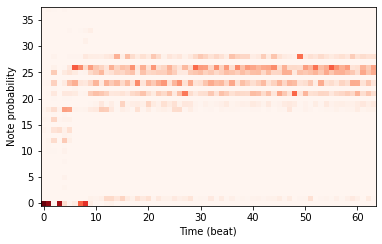

INFO:tensorflow:Priming with note 16
INFO:tensorflow:Generated sequence: [0, 0, 10, 0, 18, 23, 23, 33, 26, 26, 23, 18, 25, 26, 21, 25, 26, 28, 28, 23, 25, 21, 25, 28, 21, 19, 21, 1, 18, 21, 26, 21, 23, 26, 25, 26, 25, 21, 23, 19, 21, 23, 23, 25, 25, 26, 28, 26, 26, 19, 23, 26, 23, 26, 23, 21, 23, 26, 25, 21, 21, 18, 21, 23]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 10, 0, 18, 23, 23, 33, 26, 26, 23, 18, 25, 26, 21, 25, 26, 28, 28, 23, 25, 21, 25, 28, 21, 19, 21, 1, 18, 21, 26, 21, 23, 26, 25, 26, 25, 21, 23, 19, 21, 23, 23, 25, 25, 26, 28, 26, 26, 19, 23, 26, 23, 26, 23, 21, 23, 26, 25, 21, 21, 18, 21, 23]


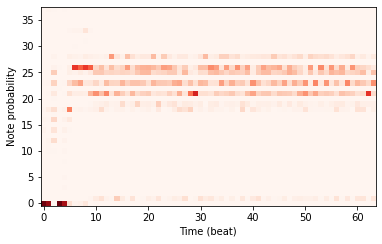

INFO:tensorflow:Priming with note 16
INFO:tensorflow:Generated sequence: [0, 0, 25, 0, 0, 21, 0, 21, 26, 0, 21, 28, 26, 28, 23, 26, 23, 25, 26, 25, 21, 26, 23, 25, 23, 21, 26, 23, 25, 23, 23, 26, 25, 26, 25, 26, 26, 25, 26, 26, 23, 21, 23, 25, 26, 26, 21, 26, 28, 25, 23, 26, 21, 28, 28, 25, 28, 26, 25, 26, 23, 26, 23, 21]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 25, 0, 0, 21, 0, 21, 26, 0, 21, 28, 26, 28, 23, 26, 23, 25, 26, 25, 21, 26, 23, 25, 23, 21, 26, 23, 25, 23, 23, 26, 25, 26, 25, 26, 26, 25, 26, 26, 23, 21, 23, 25, 26, 26, 21, 26, 28, 25, 23, 26, 21, 28, 28, 25, 28, 26, 25, 26, 23, 26, 23, 21]


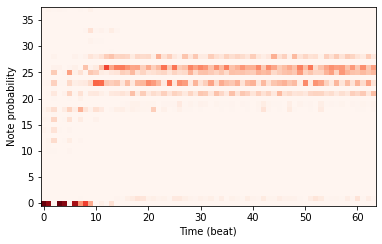

INFO:tensorflow:Priming with note 16
INFO:tensorflow:Generated sequence: [0, 0, 23, 0, 0, 23, 0, 0, 25, 26, 0, 16, 0, 23, 21, 0, 23, 21, 1, 28, 28, 25, 0, 25, 23, 21, 21, 18, 23, 25, 28, 28, 21, 28, 26, 25, 1, 19, 1, 23, 21, 26, 26, 26, 23, 23, 21, 23, 23, 26, 23, 28, 19, 28, 21, 25, 23, 19, 23, 26, 23, 26, 23, 28]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 23, 0, 0, 23, 0, 0, 25, 26, 0, 16, 0, 23, 21, 0, 23, 21, 1, 28, 28, 25, 0, 25, 23, 21, 21, 18, 23, 25, 28, 28, 21, 28, 26, 25, 1, 19, 1, 23, 21, 26, 26, 26, 23, 23, 21, 23, 23, 26, 23, 28, 19, 28, 21, 25, 23, 19, 23, 26, 23, 26, 23, 28]


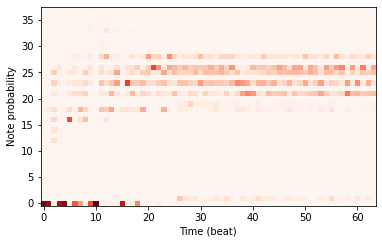

INFO:tensorflow:Priming with note 16
INFO:tensorflow:Generated sequence: [0, 0, 18, 0, 0, 12, 0, 5, 8, 0, 0, 18, 0, 0, 25, 0, 18, 28, 26, 26, 23, 23, 26, 28, 26, 21, 28, 26, 23, 25, 25, 25, 23, 21, 25, 25, 25, 28, 25, 25, 26, 26, 25, 28, 26, 25, 21, 25, 26, 21, 25, 28, 25, 25, 1, 21, 26, 25, 21, 21, 23, 21, 19, 23]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 0, 18, 0, 0, 12, 0, 5, 8, 0, 0, 18, 0, 0, 25, 0, 18, 28, 26, 26, 23, 23, 26, 28, 26, 21, 28, 26, 23, 25, 25, 25, 23, 21, 25, 25, 25, 28, 25, 25, 26, 26, 25, 28, 26, 25, 21, 25, 26, 21, 25, 28, 25, 25, 1, 21, 26, 25, 21, 21, 23, 21, 19, 23]


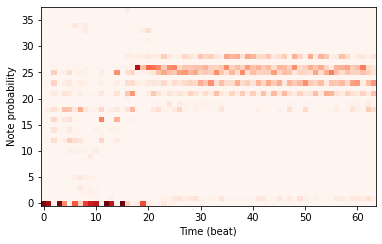

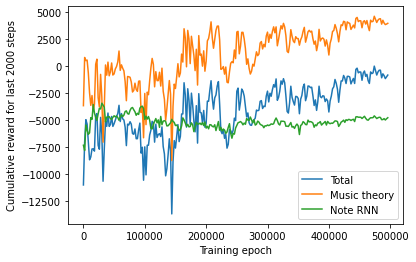

In [ ]:
training_steps = 500000
exploration_steps= 250000
10
rlt.train(num_steps=training_steps,
            exploration_period=exploration_steps)
for i in range (5):
  rlt.generate_music_sequence(visualize_probs=True, title='pentameiomi', length=64)

rlt.plot_rewards()

In [ ]:
print(rl_tuner_ops.C_MAJOR_SCALE)

[2, 4, 5, 7, 9, 10, 12, 14, 16, 17, 19, 21, 22, 24, 26]


INFO:tensorflow:Priming with note 14
INFO:tensorflow:Generated sequence: [0, 16, 14, 19, 14, 13, 13, 12, 15, 10, 1, 24, 33, 24, 31, 24, 28, 28, 21, 19, 20, 19, 14, 14, 23, 13, 15, 1, 3, 19, 25, 23, 25, 26, 19, 19, 20, 20, 20, 14, 23, 18, 20, 14, 21, 18, 14, 1, 26, 25, 23, 17, 13, 1, 20, 20, 24, 22, 20, 22, 19, 14, 1, 19]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 16, 14, 19, 14, 13, 13, 12, 15, 10, 1, 24, 33, 24, 31, 24, 28, 28, 21, 19, 20, 19, 14, 14, 23, 13, 15, 1, 3, 19, 25, 23, 25, 26, 19, 19, 20, 20, 20, 14, 23, 18, 20, 14, 21, 18, 14, 1, 26, 25, 23, 17, 13, 1, 20, 20, 24, 22, 20, 22, 19, 14, 1, 19]


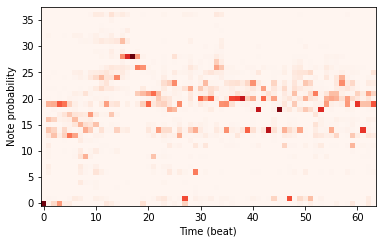

INFO:tensorflow:Priming with note 14
INFO:tensorflow:Generated sequence: [0, 10, 14, 19, 16, 13, 19, 15, 21, 1, 23, 23, 21, 17, 11, 16, 14, 18, 11, 11, 1, 16, 6, 3, 6, 6, 18, 11, 11, 1, 23, 1, 22, 23, 0, 23, 18, 28, 18, 18, 15, 18, 18, 15, 16, 14, 19, 19, 9, 0, 14, 10, 13, 16, 0, 14, 18, 16, 16, 16, 21, 16, 14, 21]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 10, 14, 19, 16, 13, 19, 15, 21, 1, 23, 23, 21, 17, 11, 16, 14, 18, 11, 11, 1, 16, 6, 3, 6, 6, 18, 11, 11, 1, 23, 1, 22, 23, 0, 23, 18, 28, 18, 18, 15, 18, 18, 15, 16, 14, 19, 19, 9, 0, 14, 10, 13, 16, 0, 14, 18, 16, 16, 16, 21, 16, 14, 21]


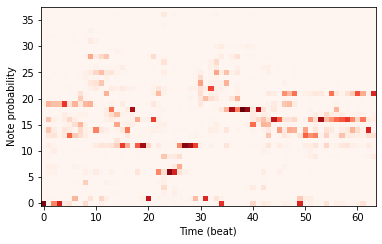

INFO:tensorflow:Priming with note 14
INFO:tensorflow:Generated sequence: [0, 16, 19, 19, 10, 32, 24, 19, 14, 0, 17, 6, 9, 10, 1, 14, 13, 11, 11, 13, 18, 14, 4, 8, 6, 21, 19, 17, 17, 20, 21, 16, 14, 1, 22, 14, 14, 18, 11, 15, 18, 14, 1, 15, 1, 21, 1, 14, 15, 18, 13, 16, 10, 26, 24, 24, 24, 24, 24, 24, 0, 21, 13, 0]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 16, 19, 19, 10, 32, 24, 19, 14, 0, 17, 6, 9, 10, 1, 14, 13, 11, 11, 13, 18, 14, 4, 8, 6, 21, 19, 17, 17, 20, 21, 16, 14, 1, 22, 14, 14, 18, 11, 15, 18, 14, 1, 15, 1, 21, 1, 14, 15, 18, 13, 16, 10, 26, 24, 24, 24, 24, 24, 24, 0, 21, 13, 0]


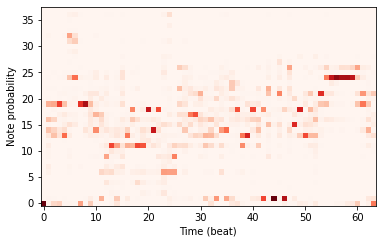

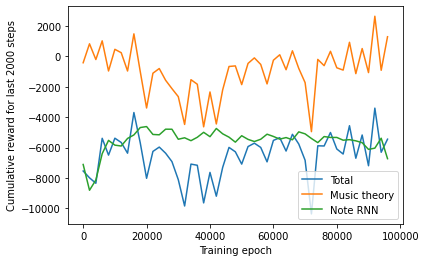

In [ ]:
for i in range (3):
  rlt.generate_music_sequence(visualize_probs=True, title='menor_all50', length=64)

rlt.plot_rewards()

In [ ]:
class JRLTuner(magenta.models.rl_tuner.rl_tuner.RLTuner):
  def collect_reward(self, obs, action, reward_scores):
     #novo modo, coloca aqui as regras que vc quer colocar
    if self.reward_mode=="teste1":
       note_rnn_reward = self.reward_from_reward_rnn_scores(action, reward_scores)

       penalize_repeating_reward = self.reward_penalize_repeating(action)
       tonic_reward = 7*self.reward_tonic(action)
       key_reward = self.reward_key(action)
       
       music_theory_reward = penalize_repeating_reward + tonic_reward + key_reward

       return music_theory_reward * self.reward_scaler + note_rnn_reward

      #os modos antigos vão ser invocados na classe original
    else:
       return super().collect_reward(obs,action,reward_scores)

    

# Classe triste retirada do colab.ufba
esse seria pra a escala menor, tentei de varias formas inclusive mudei a escala mantendoo esmo nome tb não deu

--> tava sempre retornando 0

In [ ]:
class Triste(magenta.models.rl_tuner.rl_tuner.RLTuner):
  def collect_reward(self, obs, action, reward_scores): 
    if self.reward_mode=='teste2':
      rl_tuner_ops.C_MINOR_SCALE = [2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26]
      rl_tuner_ops.C_MINOR_KEY = [0, 1, 2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26, 28,
               29, 31, 33, 35, 37]
      rl_tuner_ops.DEFAULT_QPM = 60.0  

      note_rnn_reward = self.reward_from_reward_rnn_scores(action, reward_scores)

      
      tonic_reward = 2 * self.reward_tonic(action)
      key_reward = self.reward_key(action)
      penalize_repeating_reward = self.reward_penalize_repeating(action)
      reward_prefer = self.reward_preferred_intervals( action, scaler=5.0)
      #interval_reward = self.reward_preferred_intervals(action)

      music_theory_reward = penalize_repeating_reward + tonic_reward + key_reward + penalize_repeating_reward + reward_prefer


      self.music_theory_reward_last_n += music_theory_reward * self.reward_scaler
      self.note_rnn_reward_last_n += note_rnn_reward

      return music_theory_reward * self.reward_scaler 
  #   return 0
    else:
      return super().collect_reward(obs,action,reward_scores)

  def reward_key_distribute_prob(self, action, key=None):
    if key is None:
      key = rl_tuner_ops.C_MINOR_KEY
    reward = 0

    # print(penalize_repeating_reward)



  def reward_preferred_intervals(self, action, scaler=5.0, key=None):

    interval, _, _ = self.detect_sequential_interval(action, key)
    tf.logging.debug('Interval:', interval)

    if interval == 0:  # either no interval or involving uninteresting rests
      tf.logging.debug('No interval or uninteresting.')
      return 0.0

    reward = 0.0

    # rests can be good
    if interval == rl_tuner_ops.REST_INTERVAL:
      reward = 0.05
      tf.logging.debug('Rest interval.')
    if interval == rl_tuner_ops.HOLD_INTERVAL:
      reward = 0.75
    if interval == rl_tuner_ops.REST_INTERVAL_AFTER_THIRD_OR_FIFTH:
      reward = 0.15
      tf.logging.debug('Rest interval after 1st or 5th.')
    if interval == rl_tuner_ops.HOLD_INTERVAL_AFTER_THIRD_OR_FIFTH:
      reward = 0.3

    # large leaps and awkward intervals bad
    if interval == rl_tuner_ops.SEVENTH:
      reward = -0.3
      tf.logging.debug('7th')
    if interval > rl_tuner_ops.OCTAVE:
      reward = -1.0
      tf.logging.debug('More than octave.')

    # common major intervals are good
    if interval == rl_tuner_ops.IN_KEY_FIFTH:
      reward = 0.1
      tf.logging.debug('In key 5th')
    if interval == rl_tuner_ops.IN_KEY_THIRD:
      reward = 0.15
      tf.logging.debug('In key 3rd')

    # smaller steps are generally preferred
    if interval == rl_tuner_ops.THIRD:
      reward = 0.09
      tf.logging.debug('3rd')
    if interval == rl_tuner_ops.SECOND:
      reward = 0.08
      tf.logging.debug('2nd')
    if interval == rl_tuner_ops.FOURTH:
      reward = 0.07
      tf.logging.debug('4th')

    # larger leaps not as good, especially if not in key
    if interval == rl_tuner_ops.SIXTH:
      reward = 0.05
      tf.logging.debug('6th')
    if interval == rl_tuner_ops.FIFTH:
      reward = 0.02
      tf.logging.debug('5th')

    tf.logging.debug('Interval reward', reward * scaler)
    return reward * scaler

In [ ]:
class Triste(magenta.models.rl_tuner.rl_tuner.RLTuner):
  def collect_reward(self, obs, action, reward_scores): 
    if self.reward_mode=='teste2':
      rl_tuner_ops.C_MINOR_SCALE = [2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26]
      rl_tuner_ops.C_MINOR_KEY = [0, 1, 2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26, 28,
               29, 31, 33, 35, 37]
      rl_tuner_ops.DEFAULT_QPM = 60.0  

      note_rnn_reward = self.reward_from_reward_rnn_scores(action, reward_scores)

      
      tonic_reward = 2 * self.reward_tonic(action)
      key_reward = self.reward_key(action)
      penalize_repeating_reward = self.reward_penalize_repeating(action)
      reward_prefer = self.reward_preferred_intervals( action, scaler=5.0)
      #interval_reward = self.reward_preferred_intervals(action)

      music_theory_reward = penalize_repeating_reward + tonic_reward + key_reward + penalize_repeating_reward + reward_prefer


      self.music_theory_reward_last_n += music_theory_reward * self.reward_scaler
      self.note_rnn_reward_last_n += note_rnn_reward

      return music_theory_reward * self.reward_scaler 
  #   return 0
    else:
      return super().collect_reward(obs,action,reward_scores)


  def reward_tonic(self, action, tonic_note=rl_tuner_ops.C_MAJOR_TONIC,
                    reward_amount=6.0):
      NOTE_OFF = 0
      NO_EVENT = 1
      action_note = np.argmax(action)
      first_note_of_final_bar = self.num_notes_in_melody - 4

      if self.beat == 0 or self.beat == first_note_of_final_bar:
        if action_note == tonic_note:
          return reward_amount
      elif self.beat == first_note_of_final_bar + 1:
        if action_note == NO_EVENT:
          return reward_amount
      elif self.beat > first_note_of_final_bar + 1:
        if action_note in (NO_EVENT, NOTE_OFF):
          return reward_amount
      return 0.0

  def reward_key(self, action, penalty_amount=-3.0, key=None):
  
      if key is None:
        key = [0, 1, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 19, 21, 23, 25, 26, 28,
                30, 31, 33, 35, 37]

      reward = 0

      action_note = np.argmax(action)
      if action_note not in key:
        reward = penalty_amount

      return reward


  def reward_key_distribute_prob(self, action, key=None):
      if key is None:
        key = [0, 1, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 19, 21, 23, 25, 26, 28,
                30, 31, 33, 35, 37]

      reward = 0

      action_note = np.argmax(action)
      if action_note in key:
        num_notes_in_key = len(key)
        extra_prob = 3.0 / num_notes_in_key

        reward = extra_prob

      return reward


# Só escalas e tonic .ufba não deu certo não rola a curva total


In [ ]:
class EscTonic(magenta.models.rl_tuner.rl_tuner.RLTuner):

  def collect_reward(self, obs, action, reward_scores): 
    if self.reward_mode=="teste2":
      note_rnn_reward = self.reward_from_reward_rnn_scores(action, reward_scores)
  
      tonic_reward = self.reward_tonic(action)
      key_reward = self.reward_key(action)    
      reward_prefer = self.reward_preferred_intervals( action, scaler=5.0)
      #interval_reward = self.reward_preferred_intervals(action)

      music_theory_reward =  tonic_reward + key_reward  + reward_prefer


      self.music_theory_reward_last_n += music_theory_reward * self.reward_scaler
      self.note_rnn_reward_last_n += note_rnn_reward

      return music_theory_reward * self.reward_scaler 
  #   return 0
    else:
      return super().collect_reward(obs,action,reward_scores) 


  # def reward_tonic(self, action, tonic_note=rl_tuner_ops.C_MAJOR_TONIC,
  #                  reward_amount=6.0):
  #   NOTE_OFF = 0
  #   NO_EVENT = 1
  #   action_note = np.argmax(action)
  #   first_note_of_final_bar = self.num_notes_in_melody - 4

  #   if self.beat == 0 or self.beat == first_note_of_final_bar:
  #     if action_note == tonic_note:
  #       return reward_amount
  #   elif self.beat == first_note_of_final_bar + 1:
  #     if action_note == NO_EVENT:
  #       return reward_amount
  #   elif self.beat > first_note_of_final_bar + 1:
  #     if action_note in (NO_EVENT, NOTE_OFF):
  #       return reward_amount
  #   return 0.0

  # def reward_key(self, action, penalty_amount=-3.0, key=None):
  
  #     if key is None:
  #       key = [0, 1, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 19, 21, 23, 25, 26, 28,
  #               30, 31, 33, 35, 37]

  #     reward = 0

  #     action_note = np.argmax(action)
  #     if action_note not in key:
  #       reward = penalty_amount

  #     return reward


  # def reward_key_distribute_prob(self, action, key=None):
  #     if key is None:
  #       key = [0, 1, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 19, 21, 23, 25, 26, 28,
  #               30, 31, 33, 35, 37]

  #     reward = 0

  #     action_note = np.argmax(action)
  #     if action_note in key:
  #       num_notes_in_key = len(key)
  #       extra_prob = 3.0 / num_notes_in_key

  #       reward = extra_prob

  #     return reward




# menor com alterações

In [ ]:
#essa min está alterada 
class JminRLTuner(magenta.models.rl_tuner.rl_tuner.RLTuner):
  def collect_reward(self, obs, action, reward_scores): 
    if self.reward_mode=='teste2':
      rl_tuner_ops.C_MINOR_SCALE = [2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26]
      rl_tuner_ops.C_MINOR_KEY = [0, 1, 2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26, 28,
               29, 31, 33, 35, 37]
      rl_tuner_ops.DEFAULT_QPM = 60.0  
      note_rnn_reward = self.reward_from_reward_rnn_scores(action, reward_scores)

      penalize_repeating_reward = self.reward_penalize_repeating(action)
      tonic_reward = self.reward_tonic(action)
      key_reward = self.reward_key(action)

      interval_reward = self.reward_preferred_intervals(action)

      music_theory_reward = penalize_repeating_reward + tonic_reward + key_reward 
      self.music_theory_reward_last_n += music_theory_reward * self.reward_scaler
      self.note_rnn_reward_last_n += note_rnn_reward
      return music_theory_reward * self.reward_scaler + note_rnn_reward
  #   return 0
    else:
      return super().collect_reward(obs,action,reward_scores)


  def reward_key_distribute_prob(self, action, key=None):
    rl_tuner_ops.C_MINOR_KEY = [0, 1, 2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26, 28,
          29, 31, 33, 35, 37]
    if key is None:
      key = rl_tuner_ops.C_MINOR_KEY
    reward = 0




# ###################################################################
 
# #DEFINI A ESCALA COMO MENOR no key
  def reward_key(self, action, penalty_amount=-1.0, key=None):
    
    if key is None:
      C_MINOR_KEY = [0, 1, 2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26, 28,
               29, 31, 33, 35, 37]
      key = C_MINOR_KEY
         
      #key = rl_tuner_ops.C_MAJOR_KEY
    reward = 0

    action_note = np.argmax(action)
    if action_note not in key:
      reward = penalty_amount

    return reward



# #detectar os intervalos para usarn na recompensa mudar para menor
#   # def detect_sequential_interval(self, action, key=None):
#   #   if not self.composition:
#   #     return 0, None, None

#   #   prev_note = self.composition[-1]
#   #   action_note = np.argmax(action)

#   #   c_minor = False
#   #   if key is None:
#   #     rl_tuner_ops.C_MINOR_KEY = [0, 1, 2, 4, 5, 7, 9, 11, 13, 14, 16, 17, 19, 21, 23, 25, 26, 28,
#   #              29, 31, 33, 35, 37]
#   #     key = rl_tuner_ops.C_MINOR_KEY 
#   #     c_notes = [2, 14, 26]
#   #     g_notes = [9, 21, 33]
#   #     e_notes = [5, 17, 29]
#   #     c_minor = True
#   #     tonic_notes = [2, 14, 26]
#   #     fifth_notes = [9, 21, 33]


# #AUMENTEI O REWARD_amount PARA 4
#   def reward_tonic(self, action, tonic_note=rl_tuner_ops.C_MAJOR_TONIC,
#                    reward_amount=3.0):
#     reward_amount = 4.0

 



    


# Inicializa rlt

In [ ]:

# escala de desconto da reward 
# reward_scaler = 1000
reward_scaler = 1.0
import numpy as np
rlt = Triste(output_ckpt_dir,
                         #reward_mode='music_theory_all',
                         #reward_mode='Key',
                         #reward_mode='Tonic',Globo
                         #reward_mode= 'My_tom',
                         #reward_mode= 'tom_forçado',
                         #reward_mode='edio',
                         reward_mode='teste2',   
                         midi_primer=midi_primer,
                         dqn_hparams=dqn_hparams,
                         reward_scaler=reward_scaler,
                         save_name=output_ckpt,
                         #output_every_nth=output_every_nth,
                         output_every_nth=2000,
                         note_rnn_checkpoint_dir=note_rnn_checkpoint_dir,
                         note_rnn_checkpoint_file=backup_checkpoint_file,
                         note_rnn_type=note_rnn_type,
                         note_rnn_hparams=hparams,
                         num_notes_in_melody=num_notes_in_melody,
                         exploration_mode=exploration_mode,
                         algorithm=algorithm,
                         training_file_list = training_file_list)

INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:[<tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:[<tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:0' shape=(?, 38) dtype=float32>, <tf.Tensor 'target_q_network/ParseSingleSequenceExample/ParseSequenceExample/ParseSequenceExampleV2:1' shape=(?,) dtype=int64>, <tf.Tensor 'target_q_network/strided_slice:0' shape=() dtype=int32>]
INFO:tensorflow:Initializing 


Successfully initialized internal nets from checkpoint!


In [ ]:
print(rlt.reward_mode)

music_theory_all


INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-0.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-0.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-0.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-0.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-2000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 2000
INFO:tensorflow:	Reward for last 2000 steps: -20596.200000000004
INFO:tensorflow:		Music theory reward: -20596.200000000004
INFO:tensorflow:		Note RNN reward: -6743.197677493095


Training iteration 2000
	Reward for last 2000 steps: -20596.200000000004
		Music theory reward: -20596.200000000004
		Note RNN reward: -6743.197677493095


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-2000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-2000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-2000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-2000.npz
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-4000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 4000
INFO:tensorflow:	Reward for last 2000 steps: -1502.7499999999977
INFO:tensorflow:		Music theory reward: -1502.7499999999977
INFO:tensorflow:		Note RNN reward: -7888.2529554367065


Training iteration 4000
	Reward for last 2000 steps: -1502.7499999999977
		Music theory reward: -1502.7499999999977
		Note RNN reward: -7888.2529554367065


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-4000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-4000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-4000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q-4000.index
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-6000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 6000
INFO:tensorflow:	Reward for last 2000 steps: -2246.550000000004
INFO:tensorflow:		Music theory reward: -2246.550000000004
INFO:tensorflow:		Note RNN reward: -7259.451811790466


Training iteration 6000
	Reward for last 2000 steps: -2246.550000000004
		Music theory reward: -2246.550000000004
		Note RNN reward: -7259.451811790466


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-6000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-6000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-6000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-6000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-8000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 8000
INFO:tensorflow:	Reward for last 2000 steps: 1444.3500000000001
INFO:tensorflow:		Music theory reward: 1444.3500000000001
INFO:tensorflow:		Note RNN reward: -5588.4896503686905


Training iteration 8000
	Reward for last 2000 steps: 1444.3500000000001
		Music theory reward: 1444.3500000000001
		Note RNN reward: -5588.4896503686905


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-8000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-8000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.index
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-8000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-10000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 10000
INFO:tensorflow:	Reward for last 2000 steps: 1923.249999999996
INFO:tensorflow:		Music theory reward: 1923.249999999996
INFO:tensorflow:		Note RNN reward: -4389.6161506175995


Training iteration 10000
	Reward for last 2000 steps: 1923.249999999996
		Music theory reward: 1923.249999999996
		Note RNN reward: -4389.6161506175995


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-10000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.npz
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.index
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-10000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-12000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 12000
INFO:tensorflow:	Reward for last 2000 steps: -50.549999999999834
INFO:tensorflow:		Music theory reward: -50.549999999999834
INFO:tensorflow:		Note RNN reward: -4928.092463731766


Training iteration 12000
	Reward for last 2000 steps: -50.549999999999834
		Music theory reward: -50.549999999999834
		Note RNN reward: -4928.092463731766


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-12000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-12000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-12000.npz
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-12000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-14000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 14000
INFO:tensorflow:	Reward for last 2000 steps: 1722.4499999999948
INFO:tensorflow:		Music theory reward: 1722.4499999999948
INFO:tensorflow:		Note RNN reward: -4495.60013961792


Training iteration 14000
	Reward for last 2000 steps: 1722.4499999999948
		Music theory reward: 1722.4499999999948
		Note RNN reward: -4495.60013961792


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-14000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-14000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-14000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q-14000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.meta
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-16000.index
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 16000
INFO:tensorflow:	Reward for last 2000 steps: 2506.349999999991
INFO:tensorflow:		Music theory reward: 2506.349999999991
INFO:tensorflow:		Note RNN reward: -4602.730152010918


Training iteration 16000
	Reward for last 2000 steps: 2506.349999999991
		Music theory reward: 2506.349999999991
		Note RNN reward: -4602.730152010918


INFO:tensorflow:Evaluating model...
INFO:tensorflow:./rl_tuner/q/q-16000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-16000.npz
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q-16000.meta
INFO:tensorflow:700
INFO:tensorflow:./rl_tuner/q/q-16000.data-00000-of-00001
INFO:tensorflow:1900
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.index
INFO:tensorflow:0
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.data-00000-of-00001
INFO:tensorflow:1200
INFO:tensorflow:./rl_tuner/q/q.ckpt-18000.meta
INFO:tensorflow:1900
INFO:tensorflow:Training iteration 18000
INFO:tensorflow:	Reward for last 2000 steps: 2613.949999999991
INFO:tensorflow:		Music theory reward: 2613.949999999991
INFO:tensorflow:		Note RNN reward: -4403.138241052628


Training iteration 18000
	Reward for last 2000 steps: 2613.949999999991
		Music theory reward: 2613.949999999991
		Note RNN reward: -4403.138241052628


INFO:tensorflow:Priming with note 26
INFO:tensorflow:Generated sequence: [26, 0, 24, 0, 23, 0, 28, 0, 18, 23, 23, 0, 23, 0, 25, 1, 21, 1, 23, 0, 18, 1, 18, 18, 11, 13, 13, 13, 4, 0, 14, 4, 16, 1, 11, 1, 18, 1, 23, 0, 23, 1, 23, 0, 13, 1, 13, 1, 18, 1, 25, 0, 1, 13, 1, 18, 1, 13, 1, 23, 1, 0, 23, 1]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [26, 0, 24, 0, 23, 0, 28, 0, 18, 23, 23, 0, 23, 0, 25, 1, 21, 1, 23, 0, 18, 1, 18, 18, 11, 13, 13, 13, 4, 0, 14, 4, 16, 1, 11, 1, 18, 1, 23, 0, 23, 1, 23, 0, 13, 1, 13, 1, 18, 1, 25, 0, 1, 13, 1, 18, 1, 13, 1, 23, 1, 0, 23, 1]


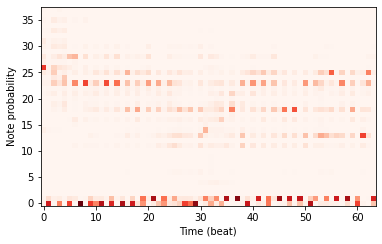

In [ ]:
training_steps =  20000
exploration_steps= 10000

rlt.train(num_steps=training_steps,
            exploration_period=exploration_steps)

rlt.generate_music_sequence(visualize_probs=True, title='EscTonic', length=64)

INFO:tensorflow:Priming with note 3
INFO:tensorflow:Generated sequence: [0, 1, 25, 1, 30, 28, 1, 21, 18, 18, 1, 34, 1, 23, 1, 25, 1, 23, 1, 18, 1, 18, 1, 18, 0, 1, 21, 28, 0, 1, 23, 1, 13, 1, 18, 1, 23, 1, 18, 1, 23, 1, 13, 1, 13, 1, 18, 1, 23, 0, 1, 22, 1, 13, 1, 11, 11, 0, 17, 1, 18, 1, 16, 1]
INFO:tensorflow:Wrote a melody to ./rl_tuner/q
INFO:tensorflow:Visualizing note selection probabilities:


Generated sequence: [0, 1, 25, 1, 30, 28, 1, 21, 18, 18, 1, 34, 1, 23, 1, 25, 1, 23, 1, 18, 1, 18, 1, 18, 0, 1, 21, 28, 0, 1, 23, 1, 13, 1, 18, 1, 23, 1, 18, 1, 23, 1, 13, 1, 13, 1, 18, 1, 23, 0, 1, 22, 1, 13, 1, 11, 11, 0, 17, 1, 18, 1, 16, 1]


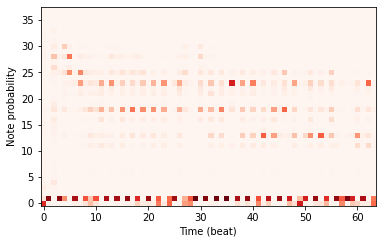

In [ ]:
 rlt.generate_music_sequence(visualize_probs=True, title='EscTonic', length=64)

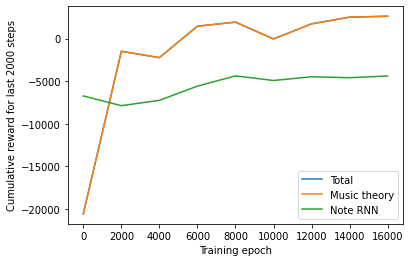

In [ ]:
rlt.plot_rewards()

In [ ]:
stat_dict = rlt.evaluate_music_theory_metrics(num_compositions=100)
stat_dict

INFO:tensorflow:Total compositions: 100.0
Total notes:6400.0
	Compositions starting with tonic: 0.0
	Compositions with unique highest note:66.0
	Compositions with unique lowest note:68.0
	Number of resolved leaps:122.0
	Number of double leaps:96.0
	Notes not in key:260.0
	Notes in motif:5475.0
	Notes in repeated motif:0.0
	Notes excessively repeated:15.0

	Percent compositions starting with tonic:0.0
	Percent compositions with unique highest note:0.66
	Percent compositions with unique lowest note:0.68
	Percent of leaps resolved:0.5596330275229358
	Percent notes not in key:0.040625
	Percent notes in motif:0.85546875
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.00234375

	Average autocorrelation of lag1:0.03399186822354424
	Average autocorrelation of lag2:0.039256614126681084
	Average autocorrelation of lag3:-0.002198396893337064

	Avg. num octave jumps per composition:1.53
	Avg. num sevenths per composition:0.3
	Avg. num fifths per composition:2.12
	Avg. nu

{'autocorrelation1': [0.11797608934639217,
  -0.08020932373341214,
  -0.03354398640903881,
  -0.1848842126097596,
  0.247025800954051,
  -0.22804435259647238,
  0.12867943227887585,
  0.14791170698751768,
  -0.20791319652375778,
  0.24924800840593914,
  -0.025651350388743378,
  0.01681092528236316,
  -0.12376036069936901,
  0.3052095911614637,
  0.0014778290011231122,
  -0.03796250962925993,
  0.07434794034512393,
  0.3821369409769572,
  -0.1435778344041223,
  -0.14477192069857586,
  0.05034945290043076,
  0.00043535735298586004,
  -0.1263459108983538,
  0.04921090956281001,
  0.016151552132080246,
  0.061420317734839185,
  -0.043516965311264554,
  -0.21575376386687797,
  0.28488828765302826,
  -0.10785920293654955,
  -0.0905372850365685,
  0.11233885876981037,
  -0.17526754983507817,
  0.23242817617102066,
  0.40820263814750857,
  0.05600212543953143,
  0.06755708383553222,
  0.02594206610372946,
  0.029071691646398026,
  0.08214676889375684,
  0.07076013513513514,
  0.163173122013308